# Project Overview
In the aftermath of the 2008 Global Financial Crisis, customer confidence in banks was low, impacting the bank's liquidity. Sufficient customer term deposits are crucial for the bank to maintain operations, comply with regulations, and lend money. The bank seeks to identify factors influencing customers' decisions to subscribe to term deposits.

This project focuses on evaluating the effectiveness of a direct marketing campaign for a Portuguese bank using machine learning. The goal is to predict whether a customer subscribed to a term deposit (y) after the campaign. The datast, available on Kaggle, includes over 45,000 rows and 17 attributes.
- Link: https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set

**Project Necessity**: Manual analysis of such a large dataset would be resource-intensive and time-consuming. Machine learning offers an efficient alternative by identifying patterns and predicting customer behaviour based on their attributes. The model developed can also be adapted for similar future scenarios.


------------------------------------------------------------------------------------------------------------------------

## Step by Step Solution
In order to solve a classification problem, the following steps need to be taken:

**Session 1: Extract, Transform and Load dataset**
- Extract data, overview data, preprocessing, EDA, and label encode.

**Session 2: Training, testing and validating data**
- Form the training, testing and validating dataset then resample the data.

**Session 3: Classifier construction**
- Develop classifiers by training machine learning models, solve the target classification problem then evaluate the model using various metrics.

**Session 4: Improve best model (XGBoost)**
- Overview about the the best model first, then create the stacking model, perform hyperparameter tuning, Feature Importance and Feature Removal to improve the model

**Session 5: Final decision**
- Decide the best models to deploy based on different business goals.

------------------------------------------------------------------------------------------------------------------------

## Important processes, findings and results



In **Session 1**, hidden null values was discovered as "unknown" in categorical columns, even though there is no null values across the 17 attributes. The poutcome column was removed due to 82% of its values being "unknown." The target variable was highly imbalanced, with 5,000 "yes" and 40,000 "no" label.  To manage outliers but without removing them, numerical columns were binned based on demographic relevance and their impact on the target variable. Following Exploratory Data Analysis (EDA), key findings were summarized at the start of session 1.3. We then transformed the dataset through one-hot encoding, retaining only month and y as label-encoded variables. After splitting the data in **Session 2**,  SMOTE was applied again to balance the target variable, resulting in 28,000 instances each of "yes" and "no."

**Session 3** involved training and evaluating machine learning models. A total of eight models were tested, with tree-based models like XGBoost and Gradient Boosting outperforming the rest. For non-technical stakeholders, a brief overview on the usage of evaluation metrics was provided at the end.


After initial modeling, **Session 4** focused on improving the XGBoost's performance. First, I have tried to combine different models to leverage their strengths in sesion 4.2. While the models performed well on the resampled testing set, results were less favorable when applied to the original imbalanced test data, particularly for class 1 predictions.

- In session 4.3, hyperparameter tuning was performed on XGBoost with a focus on improving recall for class 1. The result significantly improve, with model 1 capturing 98% of class 1 but with only 23% precision. Subsequent tuning for F1 and precision (Models 3 to 6) did not significantly improve class 1 performance, with F1, precision, and recall ranging between 45%-60%.

- In session 4.4, less important features were removed (<1% importance), and the default parameter did not improve the performance (Model 7 and 8) so hyperparameter tuning was continued, with Models 10 and 11 showing more balanced improvements (precision of 51% and recall of 73%).

- Recognizing the challenge of training on balanced data and testing on imbalanced data, **Session 4.5 involved training without SMOTE**. The eight model was trained and evaluated again, with XGBoost and Naive Bayes emerged as top performers.
  - XGBoost excelling in precision for class 1 and Naive Bayes achieving better recall for class 1. Both models performed well for class 0.
  - In Session 4.5.2, I combined XGBoost and Naive Bayes to optimize both recall and F1. Models 12 to 19 showed incremental improvements, with recall stabilizing at 78% and precision around 52%. Among the final models, the best performance achieved 90% recall and 42% precision, but further model combinations (Sessions 4.5.3 and 4.5.4) yielded no significant improvements.


In **session 5**, I have selected three models based on different objectives, offering a clear comparison of their strengths and trade-offs.:
1. xgb_recall_model1 (highest recall, lowest precision): capture a larger portion of potential subscribers, but result in targeting some customers less likely to subscribe.
2. best_model_23 (balanced recall and precision): strikes a balance between recall and precision, making it a strong choice when it’s important to both capture a good number of subscribers and avoid over-targeting.
3. best_model_16 (highest precision, lowest recall): effectively identifying subscribers most likely to engage, but at the cost of missing some potential subscribers.











## Session 1: Extract, Transform and Load (ETL)

#### Extract data, import packages and extract data

Mount google drive and change the directory (only run the next two lines on Google Colab)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks/A2

/content/gdrive/MyDrive/Colab Notebooks/A2


Import packages

In [3]:
# This section imports tools for handling data (Pandas) and visualizing it (Seaborn, Matplotlib).
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This section includes tools to evaluate model performance, such as accuracy, recall,...
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer, precision_score, f1_score

# Importing Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Tools for selecting important features, splitting dataset and tuning model hyperparameters
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [4]:
# Extract the dataset by reading the .csv file as a pandas dataframe
df = pd.read_csv('bank-full.csv',  sep=';')

### 1.1 Dataset overview and summary statistics

In [5]:
# Print the first five line of the dataset
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

#### About the variables
- **age**: customer age
- **job**: type of job
- **marital**: marital status
- **education**: education level
- **default**: has credit in default?
- **housing**: has housing loan?
- **loan**: has personal loan?
- **contact**: contact communication type
- **day**: last contact day of the week
- **month**: last contact month of year
- **duration**: last contact duration, in seconds
- **campaign**: number of contacts performed during this campaign and for this client
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign
- **previous**: number of contacts performed before this campaign and for this client
- **poutcome**: outcome of the previous marketing campaign
- **y**: has the client subscribed a term deposit?

**Detail about the variables**
https://archive.ics.uci.edu/dataset/222/bank+marketing

Statistics of numerical variables

In [6]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

General Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Null Counts across columns

In [8]:
df.isnull().sum().to_frame().transpose()

age  job  marital  education  default  balance  housing  loan  contact  \
0    0    0        0          0        0        0        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    0      0         0         0      0         0         0  0

The dataset have no null, but there might be hidden null within the object category such as unknown, NA,...

Check the unique value of all columns

In [9]:
df.nunique().to_frame().transpose()

age  job  marital  education  default  balance  housing  loan  contact  \
0   77   12        3          4        2     7168        2     2        3   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   31     12      1573        48    559        41         4  2

#### 1.1.1 Unique value for categorical columns

In [10]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [11]:
for col in object_cols:
  print(f'{col}: {df[col].unique()}')

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


Even though the count of non-null value is zero, there are some hidden null value within the dataset such as 'unknown' value in job, education, contact, poutcome.
- These value will be treated as null and required further cleaning.

 #### 1.1.2 "Unknown" value distribution

In [12]:
# Calculate the count and percentage of 'unknown' values in each column
unknown_count = (df == 'unknown').sum()
unknown_percentage = ((df == 'unknown').mean() * 100).round(2).astype(str) + '%' # change to string

# Combine the count and percentage into a single DataFrame (similar index)
unknown_summary = pd.DataFrame({
    'Count': unknown_count,
    'Percentage': unknown_percentage
})
print("Unknown Distributio Table\n", unknown_summary)

Unknown Distributio Table
            Count Percentage
age            0       0.0%
job          288      0.64%
marital        0       0.0%
education   1857      4.11%
default        0       0.0%
balance        0       0.0%
housing        0       0.0%
loan           0       0.0%
contact    13020      28.8%
day            0       0.0%
month          0       0.0%
duration       0       0.0%
campaign       0       0.0%
pdays          0       0.0%
previous       0       0.0%
poutcome   36959     81.75%
y              0       0.0%


- With 81% of unknown value, the poutcome column should just be deleted to avoid bias, noise and reduce the complexity of training model (step 1.2.1).
- Given that nearly 29% of the 'contact' variable is marked as 'unknown', simply removing these data points could lead to a significant loss of valuable information. Instead, treating 'unknown' as a distinct category within the 'contact' variable. This approach allows the model to potentially learn patterns associated with this specific group, which might represent a particular customer segment or communication preference. By retaining and categorizing the 'unknown' values, we aim to preserve data integrity and enhance the model's ability to capture nuanced relationships within the dataset.

#### 1.1.3 Target Variable



In [13]:
# Count target variable
y_count = df['y'].value_counts()
print(y_count)

y
no     39922
yes     5289
Name: count, dtype: int64


**Problem**: The target is imbalanced toward the "yes" and this could impact the model's ability to predict "yes" category.
- Bias towards Majority Class: Machine learning models tend to be biased towards the majority class, as they try to minimize overall error. This can lead to poor performance in predicting the minority class.
- Misleading Accuracy: Accuracy can be a misleading metric with imbalanced datasets. A model that simply predicts "no" for every instance could achieve high accuracy but would be useless in practice.


**Solution: Resampling Data**
- To address this, we will employ the Synthetic Minority Over-sampling Technique (SMOTE).
- SMOTE is a powerful oversampling method that creates synthetic samples of the minority class ("yes") by interpolating between existing data points. This technique helps
  - balance the dataset
  - mitigating the risk of bias towards the majority class
  - improving the model's ability to accurately predict the "yes" category.
  
By generating synthetic samples, SMOTE effectively increases the representation of the minority class, leading to a more robust and reliable model for predicting term deposit subscriptions.

-------

### 1.2 Data preprocessing

#### 1.2.1 Remove columns

##### 1.2.1.1 poutcome
- 82% missing value

In [14]:
df = df.drop('poutcome', axis=1)

##### 1.2.1.2 Contact
(Consider remove the predictability of the model is impacted)
- 29% missing/ unknown value
- Moreover, the contact communication type, whether it is telephone or cellular is not really important because it would not impact the communication, at least in the context of 2008.
- We will examine if there are any relationship between this variable and the target variable in the EDA process. If there's a clear pattern, it might be worth keeping the feature.
- In this case, we will treat "unknown" as its own category and see if it helps our model to learn potential patterns. The impact of this decision on model performance will be closely monitored

#### 1.2.2 Handling Outliers and Binning

Numerical columns in df

In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


Create Boxplot to examine the distribution and outliers of numerical variables

<Axes: >

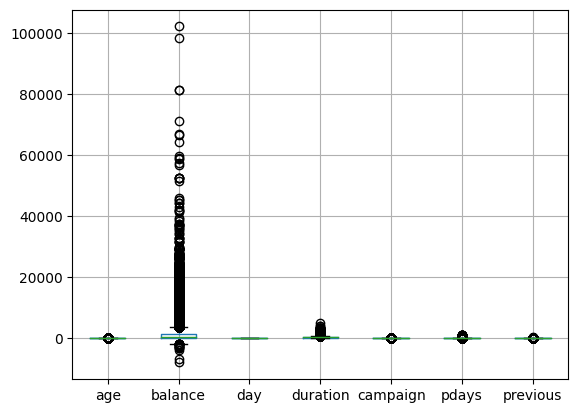

In [16]:
df.boxplot()

This box plot use the same y-axis for all numerical variable. Hence, we will use subplots for different y-axis.

<ipython-input-17-9828a00bafc1>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(kind="box", subplots=True, ax=ax, layout=(1, 7))


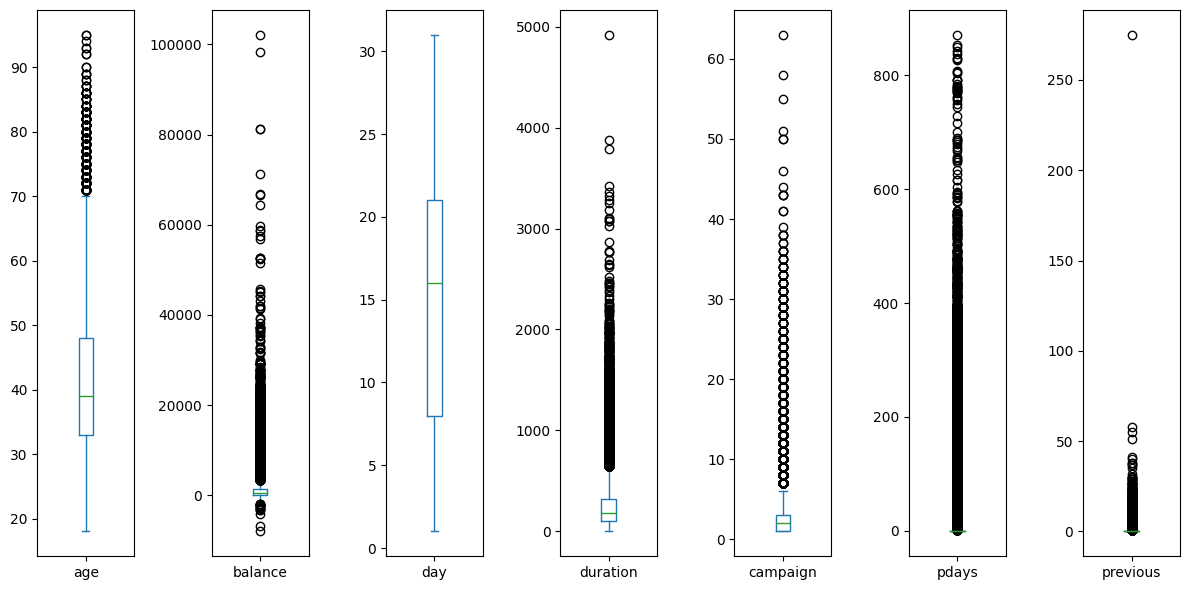

In [17]:
# Create the figure and axis for the boxplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot individual boxplots for each column
df.plot(kind="box", subplots=True, ax=ax, layout=(1, 7))
                  #seperate subplot     #create layout with 1 row and 7 columns

plt.tight_layout() #if not, the lable for y-axis will be on top of each other
plt.show()

Among the seven variables, the **day** variable appears to be the only one without any noticeable outliers. In contrast, other variables, particularly **balance** and **pdays**, exhibit significant outliers. These extreme values may have a substantial impact on the analysis and model performance. Therefore, a detailed examination of these outliers will be conducted to ensure they are handled appropriately.


Visualizing Data Distribution with Histograms
- To better understand the distribution of the numerical variables, we will use histograms. Histograms provide a clear visual representation of how the data is spread across different values, allowing us to identify skewness, the presence of outliers, and the overall shape of the distribution for each variable.

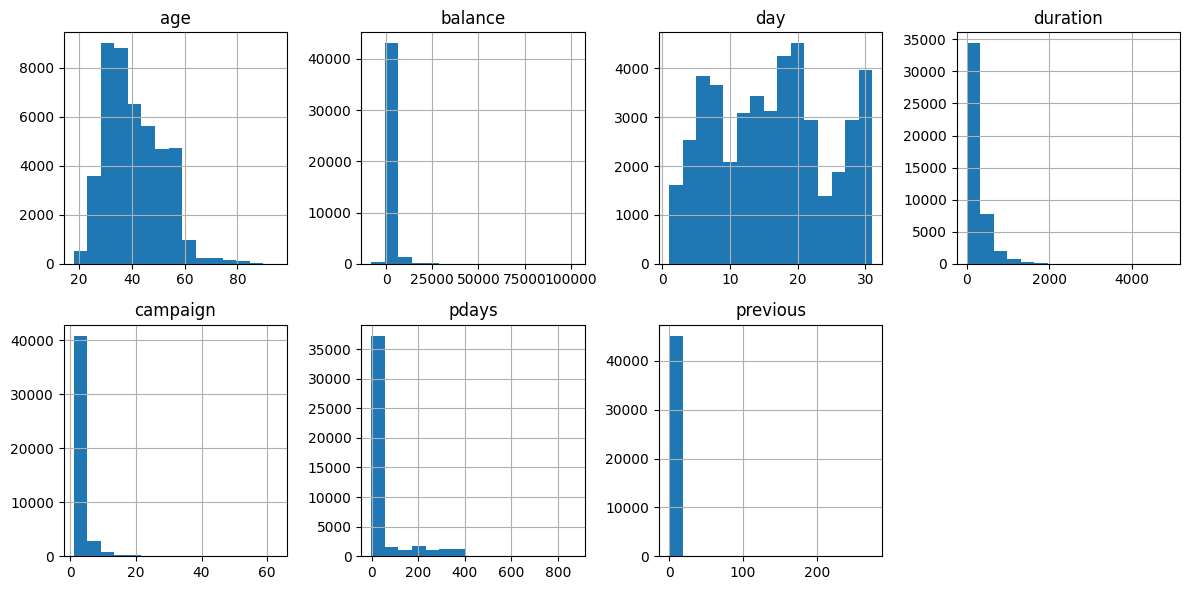

In [18]:
# use histogram to check for data distribution
df.hist(bins=15, figsize=(12, 6), layout=(2, 4))
        # divide into 15 bins,    #2 columns, 4 rows
plt.tight_layout()
plt.show()

From the histograms, we observe that several variables have most of their data concentrated around 0:
- **Balance, Duration, Campaign, Pdays, and Previous** all show a large proportion of values clustered around 0. This suggests that many customers have low balances, short call durations, or minimal engagement in the campaign (few contacts, long time since previous contact, or no prior contacts).
  
This heavy concentration around 0 indicates that we may need to explore potential transformations or handle these variables carefully, especially in the presence of outliers, to avoid skewing model performance.


In [19]:
# Create an integer version of 'y' column or 'y_int' for correlation
df['y_int'] = df['y'].map({'yes': 1, 'no': 0})

Create correlation matrix for numerical variable

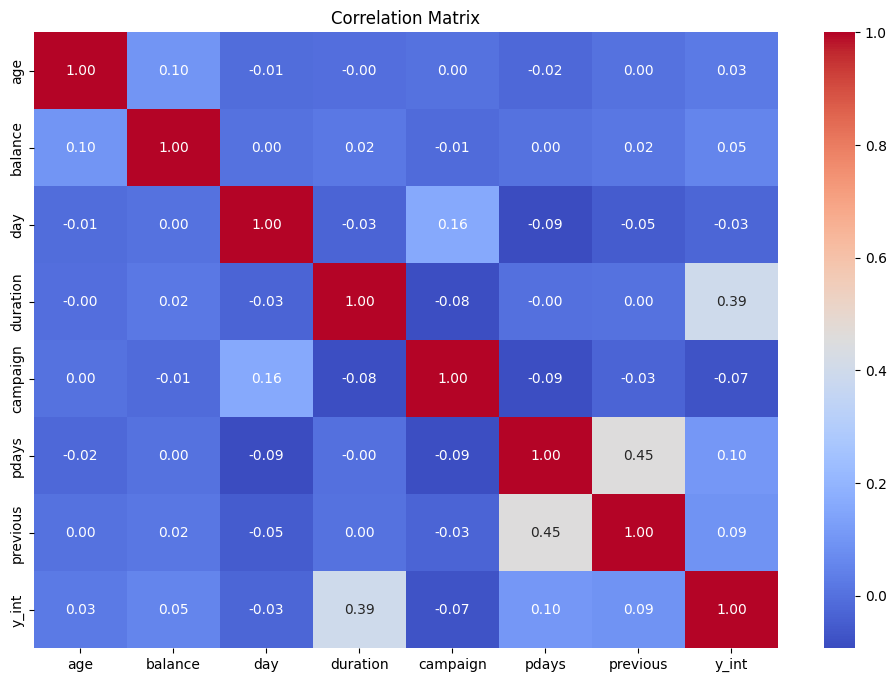

In [20]:
# Calculate the correlation matrix for numerical variables
corr_matrix = df.select_dtypes(include=['number']).corr()
              # select number type column  -> plot correlation

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") #round 2dp
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix Analysis
- Preliminary analysis of the raw data revealed a notable positive correlation between call duration and subscription to a term deposit (r = 0.39).
- This suggests that longer call durations might be associated with higher conversion rates.
- Further investigation will be conducted after data preprocessing to confirm this relationship and assess its strength in the cleaned and prepared dataset.



##### 1.2.2.1 Age

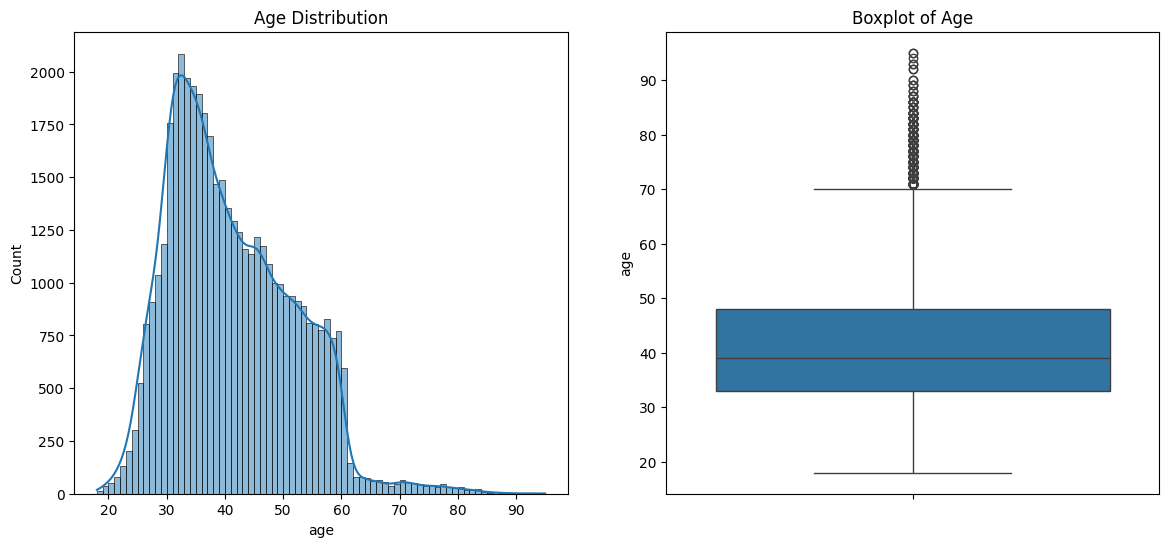


Skewness of age: 0.68


Stat of age



count      mean        std   min   25%   50%   75%   max
age  45211.0  40.93621  10.618762  18.0  33.0  39.0  48.0  95.0

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['age'], kde=True, ax=axes[0], bins = 77)
axes[0].set_title('Age Distribution')

# Boxplot for a clear view of outliers on the second subplot
sns.boxplot(df['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()

# Skewmess
skewness = df['age'].skew()
print(f"\nSkewness of age: {skewness:.2f}\n")

# Stat
print(f"\nStat of age\n")
age_stat = df['age'].describe().to_frame().transpose()
age_stat

The 'age' variable exhibited moderate positive skewness (0.68) and the presence of outliers. To mitigate these issues, a binning approach was employed. This involved categorizing age values into meaningful demographic groups, which effectively addressed skewness and minimized the impact of outliers on the model.
- This strategy was preferred over normalization, as the latter can be sensitive to outliers and may distort the inherent ordinal relationship between age and the target variable.



In [22]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Number of outliers:", len(age_outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
age_outliers.head()
age_outliers

Number of outliers: 487
Lower bound: 10.5
Upper bound: 70.5


age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no   no   
45208   72  retired   married  secondary      no     5715      no   no   

         contact  day month  duration  campaign  pdays  previous    y  y_int  
29158  telephone    2   feb       912         1     -1         0   no      0  
29261   cellular    2   feb       294         1     -1         0   no      0  
29263   cellular    2   feb       149         1     -1         0   no      0  
29322   cellular    2   feb       283         2     -1         0   no      0  
29865   cellular    4   feb       136         3     -1         0  yes      1  
...          ...  ...   ...       ...       ...    ...       ...  ...    ...  
45163   cellular    9   nov       379         2     92         3   no      0  
45191   cellular   16   nov       262         1    183         1  yes      1  
45204   cellular   17   nov       300         1     40         8  yes      1  
45207   cellular   17   nov       456         2     -1         0  yes      1  
45208   cellular   17   nov      1127         5    184         3  yes      1  

[487 rows x 17 columns]

In [23]:
correlation = df['y_int'].corr(df['age'])
print(f"Correlation between y_int and age: {correlation:.2f}")

Correlation between y_int and age: 0.03


In [24]:
# Subscription status where age > 70.5
age_outliers['y'].value_counts()

y
no     269
yes    218
Name: count, dtype: int64

For age values above 70.5, there is a notable occurrence of the minority class ("yes"), with 218 instances compared to 269 for "no." This suggests that these outliers carry important information for detecting the "yes" class. Rather than removing them, I have decided to group them into a separate bin to retain this predictive information in the model.









**Binning based on the demographic of age**

- 18-30 (Young Adults): This represents the lower quartile, capturing younger individuals.
- 31-40 (Early Mid-Life): The interquartile range (IQR) shows that many observations fall between 33 and 39, so this bin captures this cluster.
- 41-50 (Late Mid-Life): This captures the upper quartile and extends to include those in their 40s, where the median lies.
- 51-60 (Early Seniors): As age increases, the number of individuals may taper off.
- 61-70 (Seniors): Continuing to extend, this bin includes those approaching retirement age.
- 71+ (Elderly)

In [25]:
# Define the bin edges and labels
age_bins = [18, 30, 40, 50, 60, 70, 95]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create a new column 'age_group' with the age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous   y  y_int  \
0  unknown    5   may       261         1     -1         0  no      0   
1  unknown    5   may       151         1     -1         0  no      0   
2  unknown    5   may        76         1     -1         0  no      0   
3  unknown    5   may        92         1     -1         0  no      0   
4  unknown    5   may       198         1     -1         0  no      0   

  age_group  
0     51-60  
1     41-50  
2     31-40  
3     41-50  
4     31-40

##### 1.2.2.2 Balance

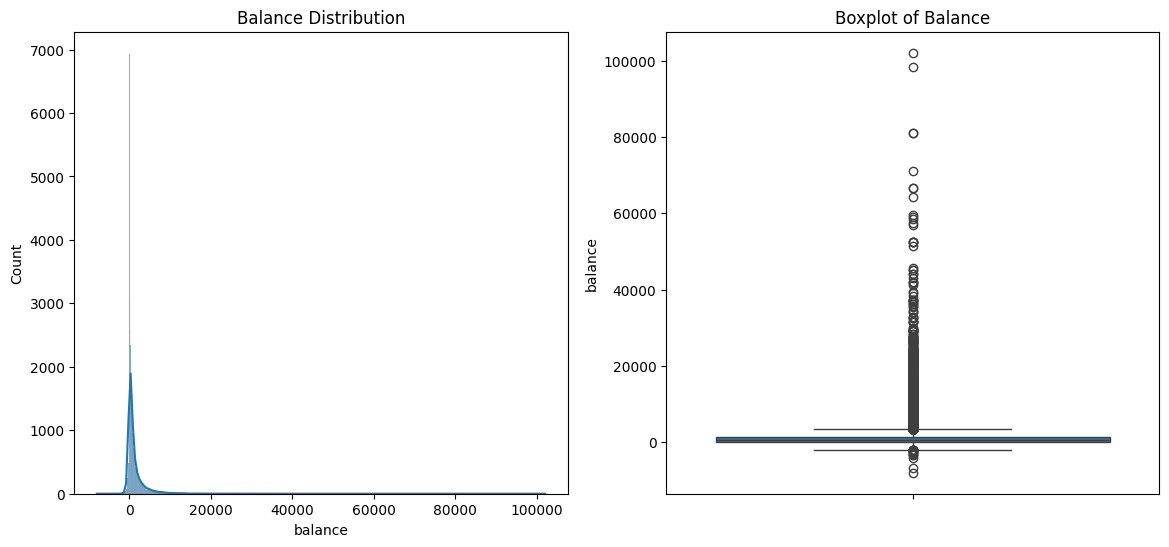


Skewness of balance: 8.36

Stat of balance



count         mean          std     min   25%    50%     75%  \
balance  45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   

              max  
balance  102127.0

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['balance'], kde=True, ax=axes[0])
axes[0].set_title('Balance Distribution')

# Boxplot for a clear view of outliers on the second subplot
sns.boxplot(df['balance'], ax=axes[1])
axes[1].set_title('Boxplot of Balance')

plt.show()

# Skewmess
skewness = df['balance'].skew()
print(f"\nSkewness of balance: {skewness:.2f}\n")

# Stat such as mean, median 25th and 75th percentile,
print(f"Stat of balance\n")
balance_stat = df['balance'].describe().to_frame().transpose()
balance_stat

Extremely positively skewed distribution (8.36).
- The max value of 102127 is drastically higher than the 75th percentile (1428), indicating the presence of extreme outliers with very high balances. These outliers are heavily influencing the mean and skewing the distribution.
- Majority Low Balances: The 25th percentile (72) and median (448) are relatively low, suggesting most customers have modest balances.


In [27]:
# Get 25th and 75th percentile, and IQR which measure the spread of middle 50%
q1 = balance_stat['25%'].quantile(0.25)
q3 = balance_stat['75%'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Identify outliers
balence_outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
print("Number of outliers:", len(balence_outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
balence_outliers.head()

Number of outliers: 4729
Lower bound: -1962.0
Upper bound: 3462.0


age          job   marital  education default  balance housing loan  \
34    51   management   married   tertiary      no    10635     yes   no   
65    51   management   married   tertiary      no     6530     yes   no   
69    35  blue-collar    single  secondary      no    12223     yes  yes   
70    57  blue-collar   married  secondary      no     5935     yes  yes   
186   40     services  divorced    unknown      no     4384     yes   no   

     contact  day month  duration  campaign  pdays  previous   y  y_int  \
34   unknown    5   may       336         1     -1         0  no      0   
65   unknown    5   may        91         1     -1         0  no      0   
69   unknown    5   may       177         1     -1         0  no      0   
70   unknown    5   may       258         1     -1         0  no      0   
186  unknown    5   may       315         1     -1         0  no      0   

    age_group  
34      51-60  
65      51-60  
69      31-40  
70      51-60  
186     31-40

Even with the factor of additional 1.5 factor on the IQR, there are still 4729 customers (10%) of the dataset is filterd out.

The removal of these outlier can improve the predictability of the model, but there is a risk of removing the valuable information about the customers having high account balance.







In [28]:
correlation = df['balance'].corr(df['y_int'])
print(f"Correlation between duration and y: {correlation}")

Correlation between duration and y: 0.05283841028818294


Low positive correlation

###### Initial EDA on balance
- This is to understand a little bit about this variable, and decision on how to bin them.

**Customer Balance Distribution**

In [29]:
# Count customers with balance in specific ranges
print(f"Customers with balance between -1962 and 0: {((df['balance'] >= -1962) & (df['balance'] < 0)).sum()}")
print(f"Customers with balance between 0 and 1500: {((df['balance'] >= 0) & (df['balance'] <= 1500)).sum()}")
print(f"Customers with balance between 1500 and 5000: {((df['balance'] > 1500) & (df['balance'] <= 5000)).sum()}")
print(f"Customers with balance between 5000 and 10000: {((df['balance'] > 5000) & (df['balance'] <= 10000)).sum()}")
print(f"Customers with balance between 10000 and 20000: {((df['balance'] > 10000) & (df['balance'] <= 20000)).sum()}")
print(f"Customers with balance between 20000 and 50000: {((df['balance'] > 20000) & (df['balance'] <= 50000)).sum()}")
print(f"Customers with balance greater than 50000: {(df['balance'] > 50000).sum()}")


Customers with balance between -1962 and 0: 3749
Customers with balance between 0 and 1500: 30550
Customers with balance between 1500 and 5000: 8050
Customers with balance between 5000 and 10000: 2016
Customers with balance between 10000 and 20000: 636
Customers with balance between 20000 and 50000: 175
Customers with balance greater than 50000: 18


The majority have moderate balances, with a small subset possessing significantly higher amounts. Noticably, 3,749 have negative balances which accounted from 8% of the entire dataset. Samall subset of wealthy individuals have more than $50,000 sitting in their bank account.


**Negative Balance**

<ipython-input-30-ef444f81fb6a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_balance_df['balance_group'] = pd.cut(negative_balance_df['balance'], bins=balance_bins, labels=balance_labels, right=False, include_lowest=True)


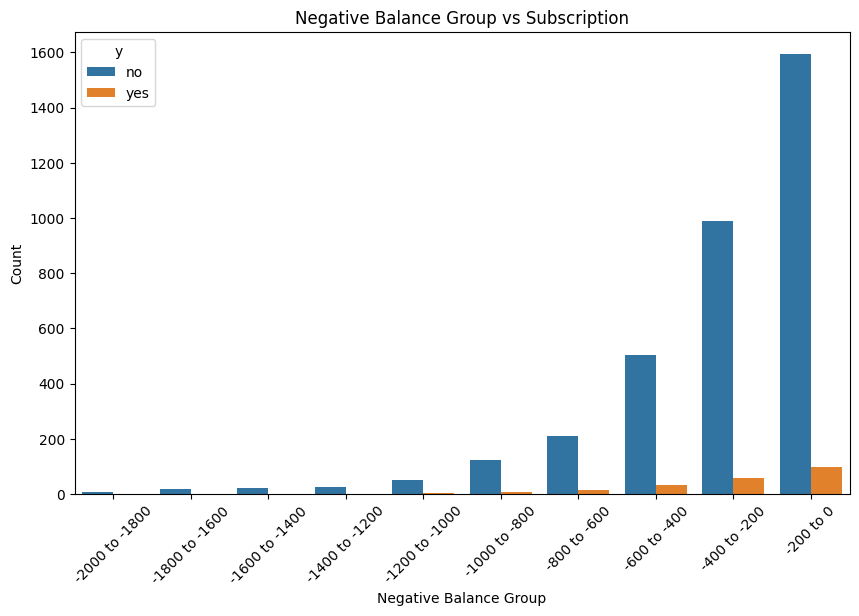

In [30]:
# negative balance and y, seperate by each 200 (0 -to -200, -200 to -400,...,).

# Create a new DataFrame with only negative balances
negative_balance_df = df[df['balance'] < 0]

# Define the bin edges and labels
balance_bins = [-2000, -1800, -1600, -1400, -1200, -1000, -800, -600, -400, -200, 0]
balance_labels = ['-2000 to -1800', '-1800 to -1600', '-1600 to -1400', '-1400 to -1200', '-1200 to -1000',
                  '-1000 to -800', '-800 to -600', '-600 to -400', '-400 to -200', '-200 to 0']

# Create a new column 'balance_group' with the negative balance bins
negative_balance_df['balance_group'] = pd.cut(negative_balance_df['balance'], bins=balance_bins, labels=balance_labels, right=False, include_lowest=True)

# Visualize the relationship between balance_group and y
plt.figure(figsize=(10, 6))
sns.countplot(x='balance_group', hue='y', data=negative_balance_df)
plt.title('Negative Balance Group vs Subscription')
plt.xlabel('Negative Balance Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [31]:
# count balance < -1962 and y
print(f"Customers with balance < -1962 and y = yes: {len(df[(df['balance'] < -1962) & (df['y'] == 'yes')])}")
print(f"Customers with balance < -1962 and y = no: {len(df[(df['balance'] < -1962) & (df['y'] == 'no')])}")

Customers with balance < -1962 and y = yes: 1
Customers with balance < -1962 and y = no: 16


Suprisingly, there is one customer with a negative balance of over 2000 still decided to subcribe to a term deposit. Overall, we can observe that this subscription ratio decrease as the negative balance growth from 0 to over -2000.

**High Balance (>$10,000)**

In [32]:
high_balances = df[df['balance'] > 10000]
print(f"Count: {high_balances.shape[0]}")
high_balances.head()

Count: 829


age          job   marital  education default  balance housing loan  \
34    51   management   married   tertiary      no    10635     yes   no   
69    35  blue-collar    single  secondary      no    12223     yes  yes   
334   45   management  divorced   tertiary      no    24598     yes   no   
446   39   technician    single    unknown      no    45248     yes   no   
920   44       admin.   married  secondary      no    58544     yes   no   

     contact  day month  duration  campaign  pdays  previous    y  y_int  \
34   unknown    5   may       336         1     -1         0   no      0   
69   unknown    5   may       177         1     -1         0   no      0   
334  unknown    5   may       313         3     -1         0   no      0   
446  unknown    6   may      1623         1     -1         0  yes      1   
920  unknown    7   may       144         2     -1         0   no      0   

    age_group  
34      51-60  
69      31-40  
334     41-50  
446     31-40  
920     41-50

**Age vs balance for high balance class**

Average age: 44.0


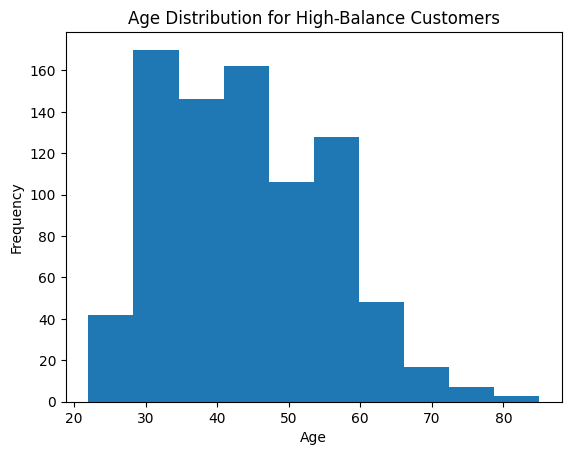

In [33]:
high_balances.describe()
print(f"Average age: {high_balances['age'].mean().round()}")  # Example: Mean age of high-balance customers

plt.hist(high_balances['age'], bins=10)
plt.title('Age Distribution for High-Balance Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Job vs high balance**

In [34]:
high_balances['job'].value_counts()

job
management       286
technician       125
blue-collar      102
admin.            64
retired           55
self-employed     52
entrepreneur      38
services          33
housemaid         28
unemployed        23
student           16
unknown            7
Name: count, dtype: int64

- **Management** dominates with 286 individuals, reflecting higher earning potential.
- **Technicians** (125) and **blue-collar** workers (102) also hold notable high balances.
- **Students** (16) and **unknown** (7) are the smallest groups, likely due to limited earnings.

Management and technical roles are the most likely to hold high balances, while lower-income and student groups are less represented.


**Marital vs balance**

In [35]:
high_balances['marital'].value_counts()

marital
married     543
single      219
divorced     67
Name: count, dtype: int64

Married seems to have higher presentation, possibly due to joint account.

###### Customer Segmentation
- While high-balance customers are undoubtedly important, this analysis focuses on understanding the factors driving term deposit subscriptions for the majority of the bank's customer base. Extreme outliers in the 'balance' variable, representing a small fraction of customers with exceptionally high balances, should be handled separately by specialized teams.
- Binning these outliers allows us to build a more focused model that better captures the patterns and trends relevant to the general customer population. This approach ensures that the model's predictive power is not unduly influenced by a small number of extreme values.
- It is important to acknowledge that this decision might limit the model's ability to generalize to the high-balance segment. However, given the specialized attention these customers receive, a separate analysis tailored to their specific needs is more appropriate.


In [36]:
# Define the bin edges and labels
balance_bins = [-10000, 0, 500, 1500, 5000, 10000, 50000, 105000]
balance_labels = ['Negative', '0-500', '501-1500', '1501-5000', '5001-10000', '10001-50000', '50001+']

# Create a new column 'balance_group' with the balance bins
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, right=True, include_lowest=True)
# df = df.drop(columns = ['balance_bin'] )
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous   y  y_int  \
0  unknown    5   may       261         1     -1         0  no      0   
1  unknown    5   may       151         1     -1         0  no      0   
2  unknown    5   may        76         1     -1         0  no      0   
3  unknown    5   may        92         1     -1         0  no      0   
4  unknown    5   may       198         1     -1         0  no      0   

  age_group balance_group  
0     51-60     1501-5000  
1     41-50         0-500  
2     31-40         0-500  
3     41-50     1501-5000  
4     31-40         0-500

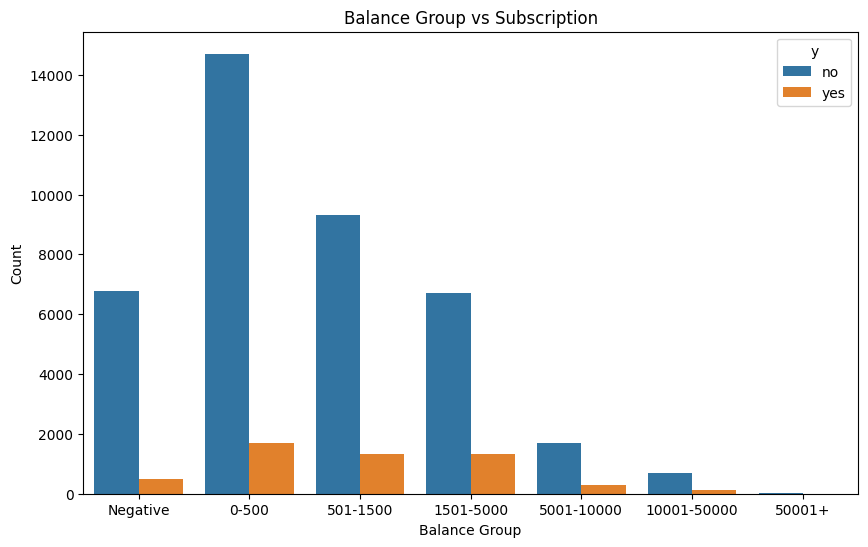

In [37]:
# Visualize the relationship between balance_group and y
plt.figure(figsize=(10, 6))
sns.countplot(x='balance_group', hue='y', data=df)
plt.title('Balance Group vs Subscription')
plt.xlabel('Balance Group')
plt.ylabel('Count')
plt.show()

In [38]:
balance_group_counts = df.groupby(['balance_group', 'y'], observed=False)['y'].count().unstack()
balance_group_counts['yes_percentage'] = (balance_group_counts['yes'] / (balance_group_counts['yes'] + balance_group_counts['no']) * 100).round(2)
print(balance_group_counts)


y                 no   yes  yes_percentage
balance_group                             
Negative        6778   502            6.90
0-500          14705  1680           10.25
501-1500        9322  1329           12.48
1501-5000       6713  1337           16.61
5001-10000      1710   306           15.18
10001-50000      680   131           16.15
50001+            14     4           22.22


The 'balance_group_counts' DataFrame provides a clear overview of how the 'y' (subscription status) is distributed across different balance groups.
- It shows that the proportion of 'yes' (subscriptions) generally increases with higher balance groups.
- This suggests that customers with higher balances are more likely to subscribe to the term deposit.
- However, it's important to note that the overall number of subscriptions is still relatively low even in the higher balance groups.
- This indicates that balance alone might not be the sole determining factor for subscriptions, and other factors like age, job, or marital status could also play a significant role.


##### 1.2.2.3 Day

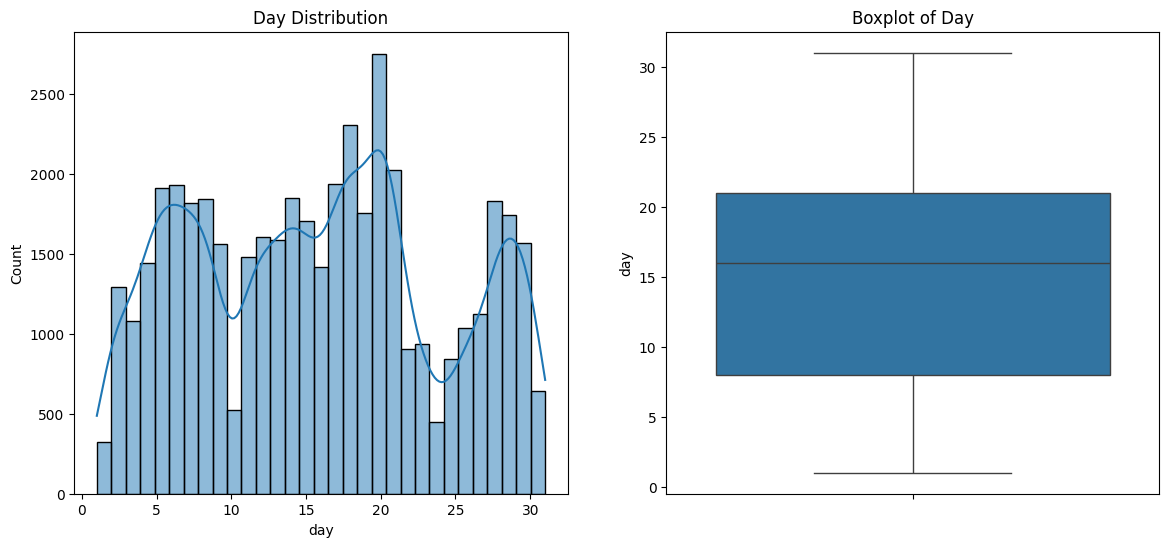


Skewness of day: 0.09



count       mean       std  min  25%   50%   75%   max
day  45211.0  15.806419  8.322476  1.0  8.0  16.0  21.0  31.0

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['day'], kde=True, ax=axes[0], bins = 31)
axes[0].set_title('Day Distribution')

# Boxplot
sns.boxplot(df['day'], ax=axes[1])
axes[1].set_title('Boxplot of Day')

plt.show()

# Skewmess
skewness = df['day'].skew()
print(f"\nSkewness of day: {skewness:.2f}\n")

# Stat such as mean, median 25th and 75th percentile,
day_stat = df['day'].describe().to_frame().transpose()
day_stat

##### 1.2.2.4 Duration

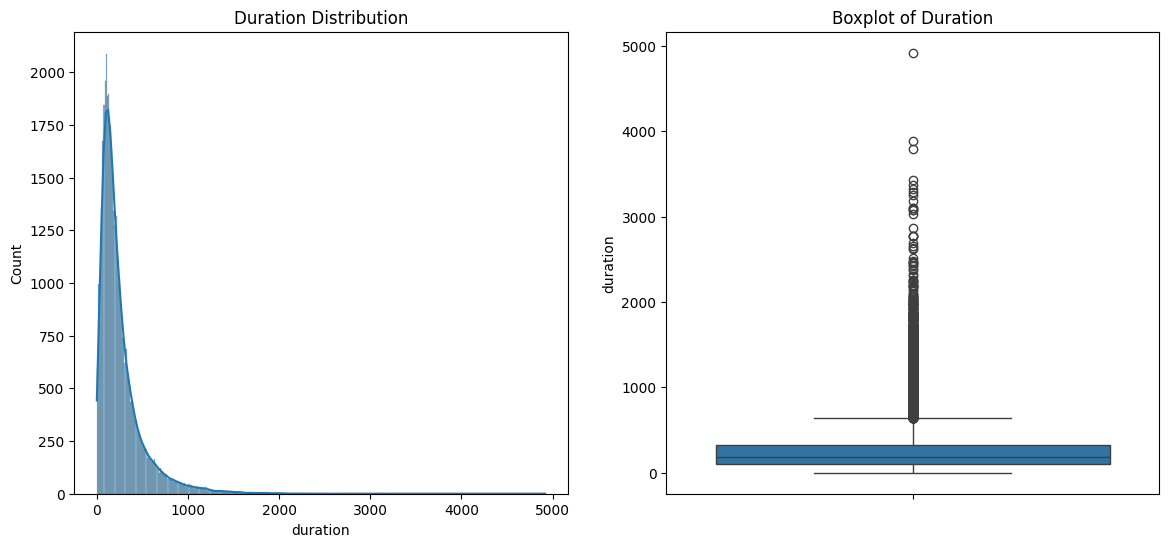


Skewness of duration: 3.14



count       mean         std  min    25%    50%    75%     max
duration  45211.0  258.16308  257.527812  0.0  103.0  180.0  319.0  4918.0

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['duration'], kde=True, ax=axes[0])
axes[0].set_title('Duration Distribution')

# Boxplot
sns.boxplot(df['duration'], ax=axes[1])
axes[1].set_title('Boxplot of Duration')

plt.show()

# Skewmess
skewness = df['duration'].skew()
print(f"\nSkewness of duration: {skewness:.2f}\n")

# Stat such as mean, median 25th and 75th percentile,
duration_stat = df['duration'].describe().to_frame().transpose()
duration_stat

The duration variable has a high skewness of 3.14, indicating a strong positive skew. There are outliers as the maximum value (4918) is significantly higher than the 75th percentile (319).

In [41]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
duration_outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print("Number of outliers:", len(duration_outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
duration_outliers.head()

Number of outliers: 3235
Lower bound: -221.0
Upper bound: 643.0


age         job   marital  education default  balance housing loan  \
37   53  technician   married  secondary      no       -3      no   no   
43   54     retired   married  secondary      no      529     yes   no   
53   42      admin.    single  secondary      no      -76     yes   no   
59   46    services   married    primary      no      179     yes   no   
61   53  technician  divorced  secondary      no      989     yes   no   

    contact  day month  duration  campaign  pdays  previous   y  y_int  \
37  unknown    5   may      1666         1     -1         0  no      0   
43  unknown    5   may      1492         1     -1         0  no      0   
53  unknown    5   may       787         1     -1         0  no      0   
59  unknown    5   may      1778         1     -1         0  no      0   
61  unknown    5   may       812         1     -1         0  no      0   

   age_group balance_group  
37     51-60      Negative  
43     51-60      501-1500  
53     41-50      Negative  
59     41-50         0-500  
61     51-60      501-1500

In [42]:
correlation = df['duration'].corr(df['y_int'])
print(f"Correlation between duration and y: {correlation}")

Correlation between duration and y: 0.39452101589456207


This is the highest correlation so far.

In [43]:
# Count values within specific ranges in the 'duration' column
print(f"Customers with duration 0-300: {(df['duration'] <= 300).sum()}")
print(f"Customers with duration 301-600: {((df['duration'] > 300) & (df['duration'] <= 600)).sum()}")
print(f"Customers with duration 601-900: {((df['duration'] > 600) & (df['duration'] <= 900)).sum()}")
print(f"Customers with duration 901-1200: {((df['duration'] > 900) & (df['duration'] <= 1200)).sum()}")
print(f"Customers with duration 1201-1500: {((df['duration'] > 1200) & (df['duration'] <= 1500)).sum()}")
print(f"Customers with duration 1501-2000: {((df['duration'] > 1500) & (df['duration'] <= 2000)).sum()}")
print(f"Customers with duration 2001-3000: {((df['duration'] > 2000) & (df['duration'] <= 3000)).sum()}")
print(f"Customers with duration 3001-4000: {((df['duration'] > 3000) & (df['duration'] <= 4000)).sum()}")
print(f"Customers with duration 4001-5000: {((df['duration'] > 4000) & (df['duration'] <= 5000)).sum()}")

Customers with duration 0-300: 32937
Customers with duration 301-600: 8484
Customers with duration 601-900: 2372
Customers with duration 901-1200: 858
Customers with duration 1201-1500: 333
Customers with duration 1501-2000: 168
Customers with duration 2001-3000: 45
Customers with duration 3001-4000: 13
Customers with duration 4001-5000: 1


Since **duration** has the highest correlation with the target variable (whether a customer subscribed to a term deposit), we will take extra care in analyzing this variable. To better understand its impact, we will carefully bin and visualize the duration variable to identify patterns and trends that may influence the model's performance.


###### 60-second bins

In [44]:
# Define the bin edges for duration
duration_bins = list(range(0, 1860, 60)) + [float('inf')]  # Include a bin for values above 1800
                              # up to but not include

# Create labels for the bins
duration_labels = [f"{i}-{i+59}" for i in range(0, 1800, 60)] + ['1800+'] #label for last bin

# Bin the duration column
df['duration_group_60'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels, right=False, include_lowest=True)
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous    y  y_int  \
0        unknown    5   may       261         1     -1         0   no      0   
1        unknown    5   may       151         1     -1         0   no      0   
2        unknown    5   may        76         1     -1         0   no      0   
3        unknown    5   may        92         1     -1         0   no      0   
4        unknown    5   may       198         1     -1         0   no      0   
...          ...  ...   ...       ...       ...    ...       ...  ...    ...   
45206   cellular   17   nov       977         3     -1         0  yes      1   
45207   cellular   17   nov       456         2     -1         0  yes      1   
45208   cellular   17   nov      1127         5    184         3  yes      1   
45209  telephone   17   nov       508         4     -1         0   no      0   
45210   cellular   17   nov       361         2    188        11   no      0   

      age_group balance_group duration_group_60  
0         51-60     1501-5000           240-299  
1         41-50         0-500           120-179  
2         31-40         0-500            60-119  
3         41-50     1501-5000            60-119  
4         31-40         0-500           180-239  
...         ...           ...               ...  
45206     51-60      501-1500          960-1019  
45207       71+     1501-5000           420-479  
45208       71+    5001-10000         1080-1139  
45209     51-60      501-1500           480-539  
45210     31-40     1501-5000           360-419  

[45211 rows x 20 columns]

In [45]:
# Count y and duration_group
duration_group_counts = df.groupby(['duration_group_60', 'y'], observed=False )['y'].count().unstack()

# Add subscription rate
duration_group_counts['subscription_rate'] = (duration_group_counts['yes'] / (duration_group_counts['yes'] + duration_group_counts['no']) * 100).round(2)
print(duration_group_counts)


y                    no  yes  subscription_rate
duration_group_60                              
0-59               4650    9               0.19
60-119             9054  195               2.11
120-179            8132  497               5.76
180-239            5477  585               9.65
240-299            3747  536              12.51
300-359            2509  414              14.16
360-419            1748  380              17.86
420-479            1197  302              20.15
480-539             839  283              25.22
540-599             604  251              29.36
600-659             483  257              34.73
660-719             320  242              43.06
720-779             257  183              41.59
780-839             191  159              45.43
840-899             135  155              53.45
900-959             107  134              55.60
960-1019             76  111              59.36
1020-1079            59   96              61.94
1080-1139            59   88            

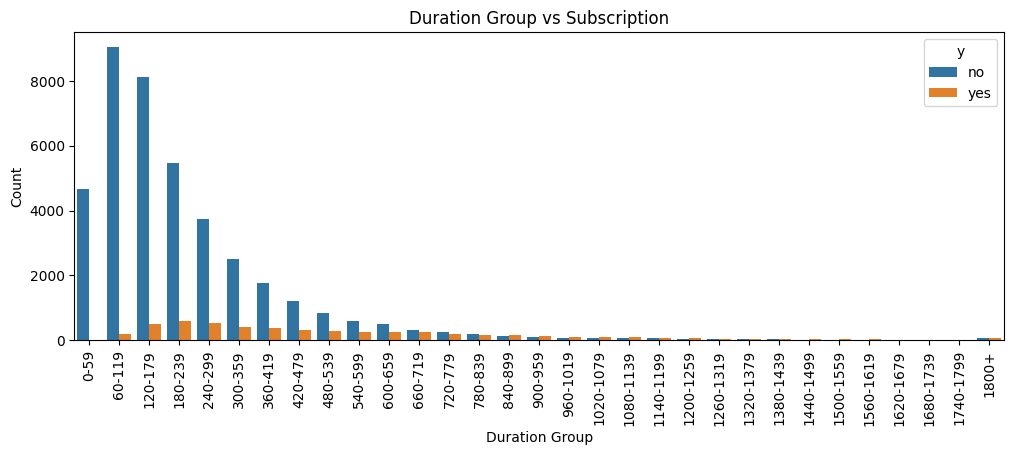

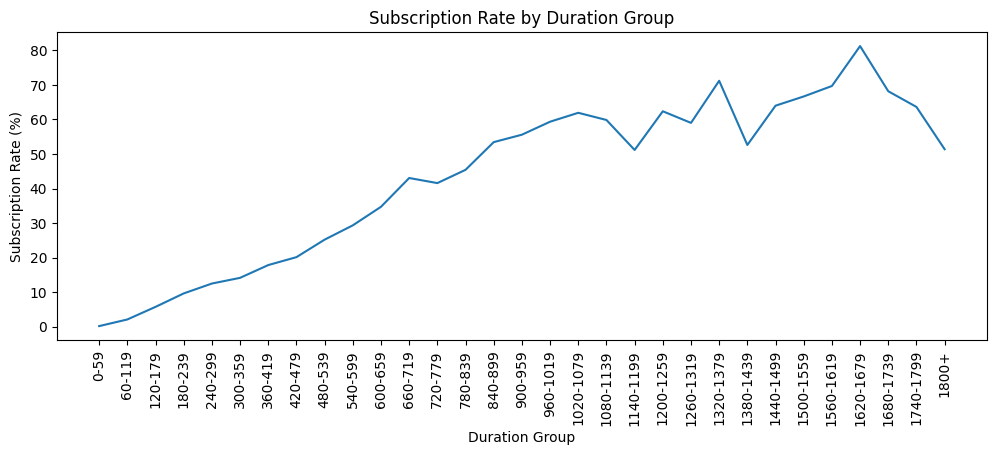

In [46]:
# Visualize the relationship between duration_group and y
plt.figure(figsize=(12, 4))
sns.countplot(x='duration_group_60', hue='y', data=df)
plt.title('Duration Group vs Subscription')
plt.xlabel('Duration Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print("")

# Visualize the subscription rate
plt.figure(figsize=(12, 4))
sns.lineplot(x=duration_group_counts.index, y='subscription_rate', data=duration_group_counts)
plt.title('Subscription Rate by Duration Group')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=90)
plt.show()


While we observe a clear trend between **duration groups** and increasing **subscription rates**, the number of bins used may be excessive. In particular, the trend becomes less consistent for groups with durations over 1000 seconds, which may lead to reduced generalization in the model. As a result, I have  cnsider reducing the number of bins or refining the binning strategy to capture key trends without overfitting or introducing noise from small, irregular groups.


###### 120-second bins

In [47]:
# Define the bin edges for duration
duration_bins = list(range(0, 1860, 120)) + [float('inf')]  # Include a bin for values above 1800

# Create labels for the bins
duration_labels = [f"{i}-{i+119}" for i in range(0, 1800, 120)] + ['1800+'] # Include a bin for values above 1800

# Bin the duration column
df['duration_group_120'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels, right=False, include_lowest=True)

# Display the new DataFrame
# df[df['duration'] <1200]
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... duration  campaign  pdays  previous   y y_int  age_group  \
0  unknown    5  ...      261         1     -1         0  no     0      51-60   
1  unknown    5  ...      151         1     -1         0  no     0      41-50   
2  unknown    5  ...       76         1     -1         0  no     0      31-40   
3  unknown    5  ...       92         1     -1         0  no     0      41-50   
4  unknown    5  ...      198         1     -1         0  no     0      31-40   

  balance_group duration_group_60 duration_group_120  
0     1501-5000           240-299            240-359  
1         0-500           120-179            120-239  
2         0-500            60-119              0-119  
3     1501-5000            60-119              0-119  
4         0-500           180-239            120-239  

[5 rows x 21 columns]

In [48]:
# Count y and duration_group
duration_group_counts_120 = df.groupby(['duration_group_120', 'y'])['y'].count().unstack()

# Add subscription rate
duration_group_counts_120['subscription_rate'] = (duration_group_counts_120['yes'] / (duration_group_counts_120['yes'] + duration_group_counts_120['no']) * 100).round(2)
print(duration_group_counts_120)


y                      no   yes  subscription_rate
duration_group_120                                
0-119               13704   204               1.47
120-239             13609  1082               7.37
240-359              6256   950              13.18
360-479              2945   682              18.80
480-599              1443   534              27.01
600-719               803   499              38.33
720-839               448   342              43.29
840-959               242   289              54.43
960-1079              135   207              60.53
1080-1199             121   153              55.84
1200-1319              63    99              61.11
1320-1439              46    77              62.60
1440-1559              31    58              65.17
1560-1679              13    36              73.47
1680-1799              11    22              66.67
1800+                  52    55              51.40


<ipython-input-48-70714c2fcc67>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_group_counts_120 = df.groupby(['duration_group_120', 'y'])['y'].count().unstack()


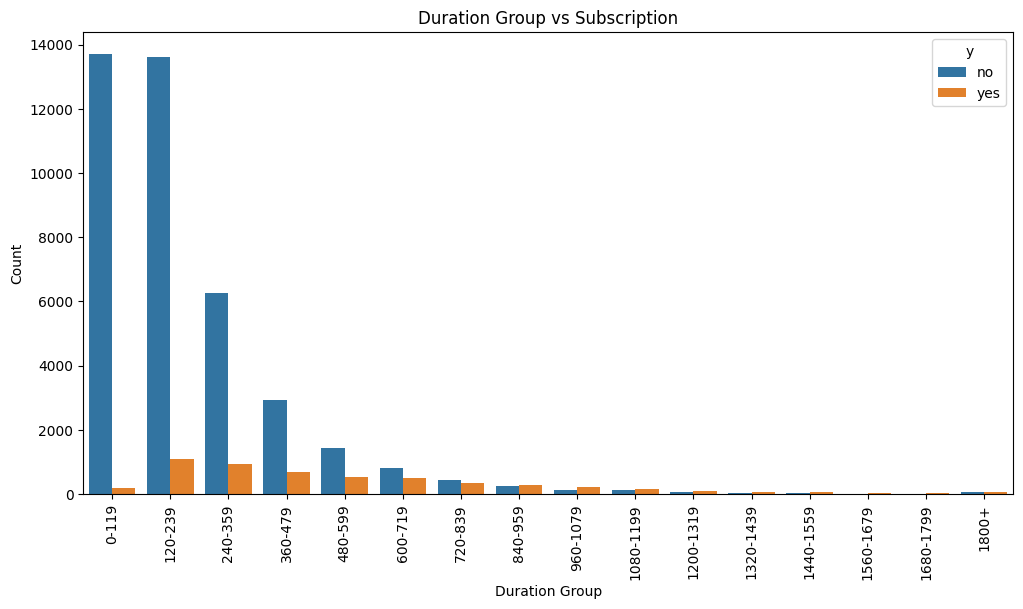

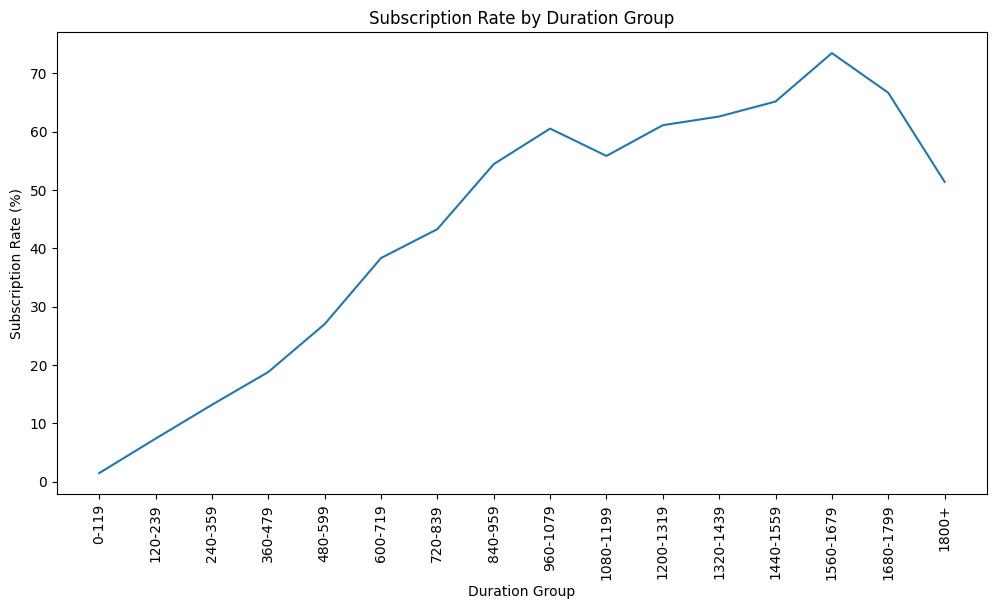

In [49]:
# Visualize the relationship between duration_group and y
plt.figure(figsize=(12, 6))
sns.countplot(x='duration_group_120', hue='y', data=df)
plt.title('Duration Group vs Subscription')
plt.xlabel('Duration Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print("")

# Visualize the subscription rate
plt.figure(figsize=(12, 6))
sns.lineplot(x=duration_group_counts_120.index, y='subscription_rate', data=duration_group_counts_120)
plt.title('Subscription Rate by Duration Group')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=90)
plt.show()


After analyzing the subscription rates with 120-second (2-minute) bins, a clear trend emerges, revealing a clear relationship between call duration and subscription success.
- As call durations increase, subscription rates generally climb, peaking around the 1600-second mark (approximately 27 minutes). This suggests that comprehensive and engaging conversations are crucial for converting potential subscribers.
- However, the data also indicates that excessively long calls may lead to diminishing returns, with subscription rates showing a gradual decline after this peak. This highlights the importance of finding the optimal balance between providing sufficient information and respecting customers' time.



To optimize call handling, focus on the key 26-28 minute window by equipping teams with effective scripts and offering incentives for high conversions. For longer calls exceeding 28 minutes, analyze and streamline conversations to avoid loss of focus or customer resistance. In shorter calls, quickly assess customer needs and emphasize key benefits to drive conversions. Continuously monitor metrics, test strategies, and refine processes based on data insights for ongoing improvement.



Additionally, using fewer bins reduces computational overhead and simplifies data visualization and communication.



Remove the duration_group_60

In [50]:
df = df.drop(columns = ['duration_group_60'])

##### 1.2.2.5 Campaign

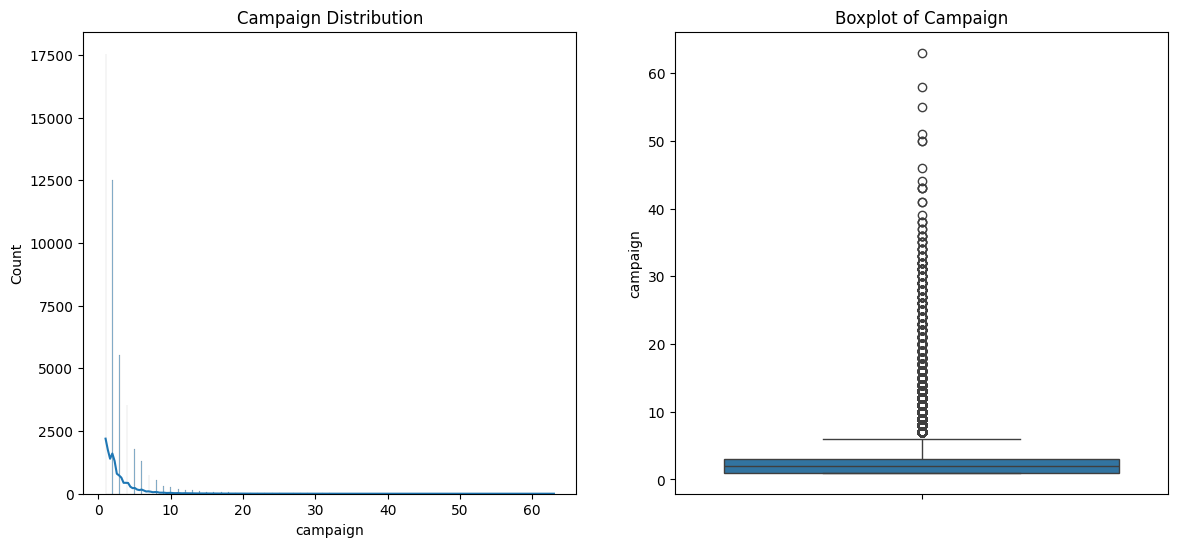


Skewness of Campaign: 4.90



count      mean       std  min  25%  50%  75%   max
campaign  45211.0  2.763841  3.098021  1.0  1.0  2.0  3.0  63.0

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['campaign'], kde=True, ax=axes[0])
axes[0].set_title('Campaign Distribution')

# Boxplot
sns.boxplot(df['campaign'], ax=axes[1])
axes[1].set_title('Boxplot of Campaign')

plt.show()

# Skewmess
skewness = df['campaign'].skew()
print(f"\nSkewness of Campaign: {skewness:.2f}\n")

# Stat
campaign_stat = df['campaign'].describe().to_frame().transpose()
campaign_stat

Most customers were contacted a small number of times (1-3 times) during the campaign, while a few customers were contacted a very high number of times, creating the long tail on the right side of the distribution.


In [52]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)
# Identify outliers
campaign_outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]
campaign_outliers.head()

lower_bound: -2.0
upper_bound: 6.0


age         job  marital  education default  balance housing loan  \
758    59    services  married  secondary      no      307     yes  yes   
780    30      admin.  married  secondary      no        4      no   no   
906    27    services   single  secondary      no        0     yes   no   
1103   52  technician  married    unknown      no      133     yes   no   
1105   43      admin.  married   tertiary      no     1924     yes   no   

      contact  day month  duration  campaign  pdays  previous   y  y_int  \
758   unknown    6   may       250         7     -1         0  no      0   
780   unknown    7   may       172         8     -1         0  no      0   
906   unknown    7   may       388         7     -1         0  no      0   
1103  unknown    7   may       253         8     -1         0  no      0   
1105  unknown    7   may       244         7     -1         0  no      0   

     age_group balance_group duration_group_120  
758      51-60         0-500            240-359  
780      18-30         0-500            120-239  
906      18-30      Negative            360-479  
1103     51-60         0-500            240-359  
1105     41-50     1501-5000            240-359

In [53]:
# correlation etween y_int and campaign
correlation = df['campaign'].corr(df['y_int'])
print(f"Correlation between campaign and y: {correlation}")

Correlation between campaign and y: -0.07317200634586699


In [54]:
# shape of outlier
print(f"Count of Outliers: {campaign_outliers.shape[0]}")

Count of Outliers: 3064


In [55]:
# transform campaign to category in df, then group category by y. Compute subscription rate

# Transform 'campaign' to category
df['campaign_cat'] = df['campaign'].astype('category')

# Group by 'campaign' and 'y' and compute subscription rate
campaign_group_counts = df.groupby(['campaign_cat', 'y'])['y'].count().unstack()
campaign_group_counts['subscription_rate'] = (campaign_group_counts['yes'] / (campaign_group_counts['yes'] + campaign_group_counts['no']) * 100).round(2)

print(campaign_group_counts)


y                no   yes  subscription_rate
campaign_cat                                
1             14983  2561              14.60
2             11104  1401              11.20
3              4903   618              11.19
4              3205   317               9.00
5              1625   139               7.88
6              1199    92               7.13
7               688    47               6.39
8               508    32               5.93
9               306    21               6.42
10              252    14               5.26
11              185    16               7.96
12              151     4               2.58
13              127     6               4.51
14               89     4               4.30
15               80     4               4.76
16               77     2               2.53
17               63     6               8.70
18               51     0               0.00
19               44     0               0.00
20               42     1               2.33
21        

<ipython-input-55-5f0de8bbb86d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_group_counts = df.groupby(['campaign_cat', 'y'])['y'].count().unstack()


Consider the distribution of campaign and subscription rate, the campaign is divided into four groups:
- Group low values separately (1-3 contacts).
- Group moderate values (4-10 contacts).
- Group high values (11-20 contacts).
- Group extreme values (21 and above).

In [56]:
# Define bins and labels
bins = [0, 3, 10, 20, float('inf')]  # float -> Upper bounds for each bin -> ensure 20+ contact include in last bin
labels = ['1-3', '4-10', '11-20', '21+']  # Labels for each bin

# Apply binning
df['campaign_group'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False, include_lowest=True)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... campaign  pdays  previous   y  y_int age_group  \
0  unknown    5  ...        1     -1         0  no      0     51-60   
1  unknown    5  ...        1     -1         0  no      0     41-50   
2  unknown    5  ...        1     -1         0  no      0     31-40   
3  unknown    5  ...        1     -1         0  no      0     41-50   
4  unknown    5  ...        1     -1         0  no      0     31-40   

   balance_group duration_group_120 campaign_cat campaign_group  
0      1501-5000            240-359            1            1-3  
1          0-500            120-239            1            1-3  
2          0-500              0-119            1            1-3  
3      1501-5000              0-119            1            1-3  
4          0-500            120-239            1            1-3  

[5 rows x 22 columns]

In [57]:
# Count y and campaign_group
campaign_group_counts = df.groupby(['campaign_group', 'y'])['y'].count().unstack()

# Add subscription rate
campaign_group_counts['subscription_rate'] = (campaign_group_counts['yes'] / (campaign_group_counts['yes'] + campaign_group_counts['no']) * 100).round(2)
print(campaign_group_counts)


y                  no   yes  subscription_rate
campaign_group                                
1-3             26087  3962              13.19
4-10            12434  1266               9.24
11-20            1119    56               4.77
21+               282     5               1.74


<ipython-input-57-e608cbae5439>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_group_counts = df.groupby(['campaign_group', 'y'])['y'].count().unstack()


**Obeservation**

The data strongly confirms the diminishing returns of increased campaign frequency. Subscription rates drop significantly as the number of contacts increases.
- Optimal Range: The "Low (1-3)" campaign group has the highest subscription rate (13.19%), highlighting that focusing on the first few interactions is crucial for maximizing conversions.
- Moderate Value: The "Moderate (4-10)" group still shows a decent subscription rate (9.24%), suggesting that some customers might be receptive to more frequent communication. However, it's essential to carefully monitor responses and avoid overexposure.
- Declining Returns (11-20 contacts): Sharp drop in subscription rate to 4.77%, indicating reduced effectiveness.
- Overexposure Detriment: The "Extreme (21+)" group has a drastically lower subscription rate (1.74%), indicating that excessive contact can be detrimental and potentially lead to customer fatigue or disengagement.

**Recommendations**: Prioritize Quality over Quantity: Focus on delivering high-quality, personalized messages within the first few campaigns to capitalize on the higher conversion rates.


In [90]:
df.drop(columns = ['campaign_cat'], inplace = True)

##### 1.2.2.6 Pdays

Minimum value of pdays: -1


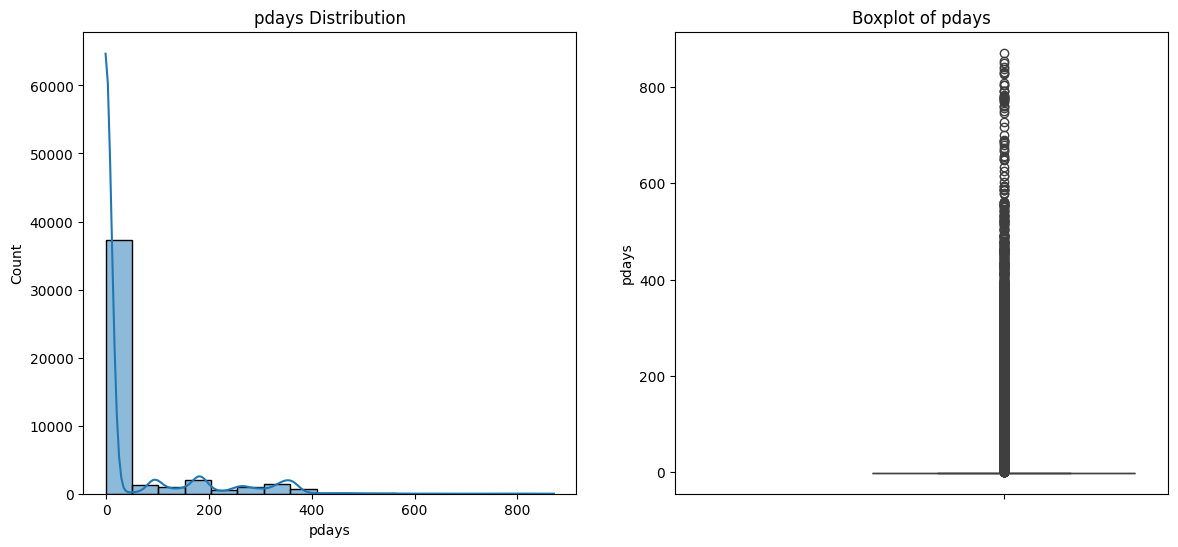


Skewness of pdays: 2.62



count       mean         std  min  25%  50%  75%    max
pdays  45211.0  40.197828  100.128746 -1.0 -1.0 -1.0 -1.0  871.0

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Get the minimum value of pdays
min_pdays = df['pdays'].min()
print(f"Minimum value of pdays: {min_pdays}")

# Histogram
sns.histplot(df['pdays'], kde=True, ax=axes[0])
axes[0].set_title('pdays Distribution')

# Boxplot
sns.boxplot(df['pdays'], ax=axes[1])
axes[1].set_title('Boxplot of pdays')
axes[1].set_xlim(min_pdays, None)  # Set the y-axis to start from the minimum value of pdays

plt.show()

# Skewmess
skewness = df['pdays'].skew()
print(f"\nSkewness of pdays: {skewness:.2f}\n")

# Stat
pdays_stat = df['pdays'].describe().to_frame().transpose()
pdays_stat

Most customers were not contacted in a previous campaign (pdays = -1), while a smaller group of customers were contacted a relatively long time ago, creating the skew.

In [59]:
# correlation of pdays with y_int
correlation = df['pdays'].corr(df['y_int'])
print(f"Correlation between pdays and y: {correlation}")


Correlation between pdays and y: 0.10362149401628734


In [60]:
# Define bins and labels
bins = [-1, 0, 7, 30, 90, 365, float('inf')]  # Upper bounds for each bin
labels = ['No Contact', '1 week', '1 month', '1 quarter', '1 year', '+1 year']  # Labels for each bin

# Apply binning
df['pdays_group'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False, include_lowest=True)

# Preview the new pdays groups
print(df[['pdays', 'pdays_group']])

       pdays pdays_group
0         -1  No Contact
1         -1  No Contact
2         -1  No Contact
3         -1  No Contact
4         -1  No Contact
...      ...         ...
45206     -1  No Contact
45207     -1  No Contact
45208    184      1 year
45209     -1  No Contact
45210    188      1 year

[45211 rows x 2 columns]


In [61]:
# Group by 'pdays_group' and 'y' and compute subscription rate
pdays_group_counts = df.groupby(['pdays_group', 'y'],observed=False)['y'].count().unstack()
pdays_group_counts['subscription_rate'] = (pdays_group_counts['yes'] / (pdays_group_counts['yes'] + pdays_group_counts['no']) * 100).round(2)

print(pdays_group_counts)


y               no   yes  subscription_rate
pdays_group                                
No Contact   33570  3384               9.16
1 week          66    10              13.16
1 month         93    18              16.22
1 quarter      285   192              40.25
1 year        5405  1494              21.66
+1 year        503   191              27.52


**Observation**

Analyzing subscription rates based on time since last contact reveals that contacting customers within a quarter (3 months) yields the highest conversion. Interestingly, very recent contact (within a week) shows lower subscription rates than no contact or contact within a month. This suggests an optimal timeframe for re-engagement exists, and excessively frequent contact may be counterproductive. Future campaigns should prioritize customers contacted within the last quarter while carefully considering the frequency and messaging for other groups to maximize conversions.



##### 1.2.2.7 previous

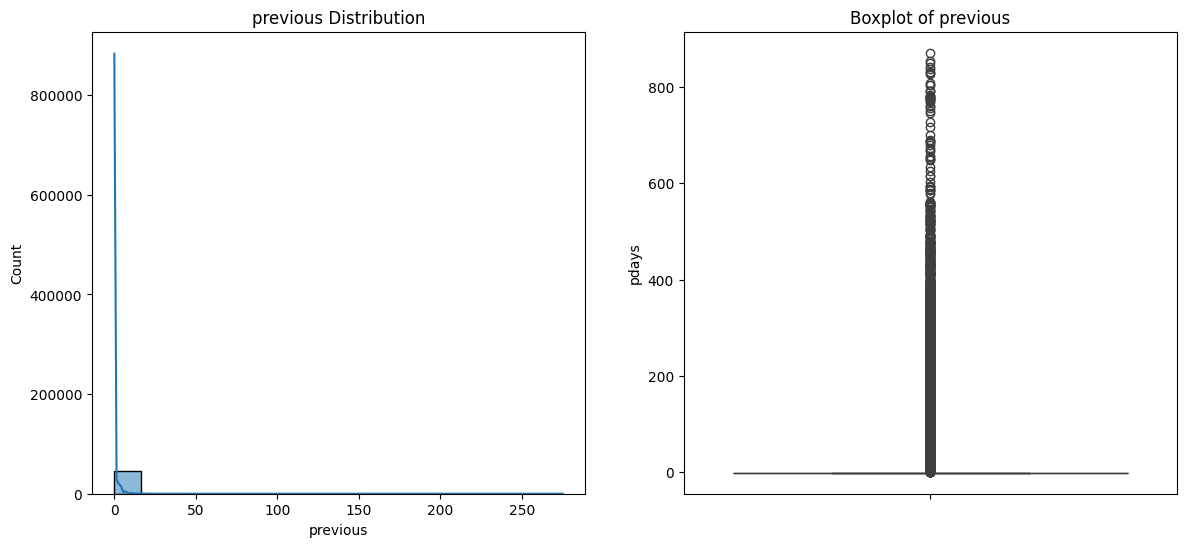


Skewness of previous: 41.85



count      mean       std  min  25%  50%  75%    max
previous  45211.0  0.580323  2.303441  0.0  0.0  0.0  0.0  275.0

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['previous'], kde=True, ax=axes[0])
axes[0].set_title('previous Distribution')

# Boxplot
sns.boxplot(df['pdays'], ax=axes[1])
axes[1].set_title('Boxplot of previous')

plt.show()

# Skewmess
skewness = df['previous'].skew()
print(f"\nSkewness of previous: {skewness:.2f}\n")

# Stat
previous_stat = df['previous'].describe().to_frame().transpose()
previous_stat

The high skewness (41.85) indicates a very strong right skew, meaning the data is heavily concentrated towards lower values with some extreme outliers.

- While most customers have not been contacted in previous campaigns (25% and 75% range = 0), a very small fraction have been contacted numerous times, creating the extreme skew.
- This extreme skewness can pose challenges for many machine learning models.


In [63]:
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
previous_outliers = df[(df['previous'] < lower_bound) | (df['previous'] > upper_bound)]
previous_outliers.head()

age         job  marital  education default  balance housing loan  \
24060   33      admin.  married   tertiary      no      882      no   no   
24062   42      admin.   single  secondary      no     -247     yes  yes   
24064   33    services  married  secondary      no     3444     yes   no   
24072   36  management  married   tertiary      no     2415     yes   no   
24077   36  management  married   tertiary      no        0     yes   no   

         contact  day  ... pdays  previous    y  y_int  age_group  \
24060  telephone   21  ...   151         3   no      0      31-40   
24062  telephone   21  ...   166         1  yes      1      41-50   
24064  telephone   21  ...    91         4  yes      1      31-40   
24072  telephone   22  ...    86         4   no      0      31-40   
24077  telephone   23  ...   143         3  yes      1      31-40   

      balance_group  duration_group_120 campaign_cat campaign_group  \
24060      501-1500               0-119            1            1-3   
24062      Negative             480-599            1            1-3   
24064     1501-5000             120-239            1            1-3   
24072     1501-5000               0-119            1            1-3   
24077      Negative             120-239            1            1-3   

      pdays_group  
24060      1 year  
24062      1 year  
24064      1 year  
24072   1 quarter  
24077      1 year  

[5 rows x 23 columns]

In [64]:
# correlation between previous and y_int
correlation = df['previous'].corr(df['y_int'])
print(f"Correlation between previous and y: {correlation:.2f}")


Correlation between previous and y: 0.09


- Group non-contact values (0).
- Group low contact counts (1-2).
- Group moderate contact counts (3-5).
- Group high contact counts (6-10).
- Group very high contact counts (11-20).
- Group extreme contact counts (21 and above).

In [65]:
# Define bins and labels
bins = [0, 1, 3, 6, 11, 21, float('inf')]  # Upper bounds for each bin
labels = ['No previous contact', '1-3 contacts', '4-6 contacts', '7-11 contacts', '12-21 contacts', '22+ contacts']  # Labels for each bin

# Apply binning with include_lowest=True                                open right close left, , include lowest mean 0  = No previous contac
df['previous_group'] = pd.cut(df['previous'], bins=bins, labels=labels, right=True, include_lowest=True)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... previous   y  y_int  age_group  balance_group  \
0  unknown    5  ...        0  no      0      51-60      1501-5000   
1  unknown    5  ...        0  no      0      41-50          0-500   
2  unknown    5  ...        0  no      0      31-40          0-500   
3  unknown    5  ...        0  no      0      41-50      1501-5000   
4  unknown    5  ...        0  no      0      31-40          0-500   

  duration_group_120  campaign_cat campaign_group pdays_group  \
0            240-359             1            1-3  No Contact   
1            120-239             1            1-3  No Contact   
2              0-119             1            1-3  No Contact   
3              0-119             1            1-3  No Contact   
4            120-239             1            1-3  No Contact   

        previous_group  
0  No previous contact  
1  No previous contact  
2  No previous contact  
3  No previous contact  
4  No previous contact  

[5 rows x 24 columns]

In [66]:
# Count y and previous_group
previous_group_counts = df.groupby(['previous_group', 'y'])['y'].count().unstack()

# Add subscription rate
previous_group_counts['subscription_rate'] = (previous_group_counts['yes'] / (previous_group_counts['yes'] + previous_group_counts['no']) * 100).round(2)
print(previous_group_counts)

y                       no   yes  subscription_rate
previous_group                                     
No previous contact  35759  3967               9.99
1-3 contacts          2498   750              23.09
4-6 contacts          1075   375              25.86
7-11 contacts          400   158              28.32
12-21 contacts         146    32              17.98
22+ contacts            44     7              13.73


<ipython-input-66-946167091b39>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  previous_group_counts = df.groupby(['previous_group', 'y'])['y'].count().unstack()


**Observation**

There's a clear "sweet spot" for previous contacts. Customers who have been contacted 7-11 times previously show the highest subscription rate (28.32%). This suggests that a degree of familiarity and nurturing is beneficial.

Diminishing Returns: The subscription rate drops off after the 7-11 contact range. Contacting customers too frequently (12-21 or 22+ times) may lead to lower conversion rates, possibly due to customer fatigue or a sense of being overwhelmed.



**Recommendations**
- Focus on building relationships and providing value in the initial interactions (1-3 contacts).
- Middle Ground: Maintain engagement and tailor communication for those in the 4-11 contact range.
- Careful Consideration: For customers with 12+ previous contacts, carefully evaluate the potential return on investment before further outreach. Consider alternative communication strategies or personalized offers.

##### Final dataset after processing

In [199]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ...   y  y_int  age_group  balance_group  duration_group_60  \
0  unknown    5  ...  no      0      51-60      1501-5000            240-299   
1  unknown    5  ...  no      0      41-50          0-500            120-179   
2  unknown    5  ...  no      0      31-40          0-500             60-119   
3  unknown    5  ...  no      0      41-50      1501-5000             60-119   
4  unknown    5  ...  no      0      31-40          0-500            180-239   

  duration_group_120  campaign_cat campaign_group pdays_group  \
0            240-359             1            1-3  No Contact   
1            120-239             1            1-3  No Contact   
2              0-119             1            1-3  No Contact   
3              0-119             1            1-3  No Contact   
4            120-239             1            1-3  No Contact   

        previous_group  
0  No previous contact  
1  No previous contact  
2  No previous contact  
3  No previous contact  
4  No previous contact  

[5 rows x 25 columns]

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 45211 non-null  int64   
 1   job                 45211 non-null  object  
 2   marital             45211 non-null  object  
 3   education           45211 non-null  object  
 4   default             45211 non-null  object  
 5   balance             45211 non-null  int64   
 6   housing             45211 non-null  object  
 7   loan                45211 non-null  object  
 8   contact             45211 non-null  object  
 9   day                 45211 non-null  int64   
 10  month               45211 non-null  object  
 11  duration            45211 non-null  int64   
 12  campaign            45211 non-null  int64   
 13  pdays               45211 non-null  int64   
 14  previous            45211 non-null  int64   
 15  y                   45211 non-null  

-------

### 1.3 EDA

Some of the EDA for the numerical columns have been done in part 1.2.2.


#### Exploratory Data Analysis Findings

- **Age Group Impact**: Subscription rates experience a significant increase, from as low as 10% to 40%, when customers reach the 61-70 age group.
   
- **Job Categories**: The majority of customers are blue-collar, management, and technical workers, accounting for 60% of the dataset. However, **blue-collar workers** exhibit the lowest subscription rate (7.27%). In contrast, **retired** and **student** groups have the highest likelihood of subscribing (over 20%), though they represent only 7% of the dataset.

- **Marital Status**: **Single customers** show a subscription rate 50% higher than **married customers** (15% vs 10%).

- **Education Level**: Customers with **tertiary education** have a subscription rate that is double that of those with **primary education**.

- **Default Status**: Customers with **no defaults** are nearly twice as likely to subscribe compared to those with defaults (11.8% vs 6.4%).

- **Balance**: While subscription rates generally increase with higher balances, there is little difference between customers with balances ranging from **1,500 to 50,000**, with subscription rates fluctuating around 15%. Customers with **negative balances** show the lowest subscription rates, which decline as the negative balance increases.

- **Loan Status**: Customers with no **personal or housing loans** are three times more likely to subscribe to term deposits compared to those with loans (18% vs 6%).

- **Contact Day/Month**: While subscription rates vary based on the last contact day or month, this is likely due to the frequency of calls. Increased calls correlate with a decrease in subscription rates, emphasizing that excessive contact can lead to disengagement.

- **Campaign Frequency**: The effectiveness of campaigns diminishes sharply as the number of contacts increases. Customers receiving between **12 and 63 contacts** show diminishing returns, indicating wasted resources. Notably, there are **33,500 customers** who have not been contacted but remain unsubscribed. Re-contacting customers after one quarter shows a high subscription rate of 40%.

- **Contact Frequency**: While regular contact is important, subscription rates drop significantly after **7-11 contacts**, suggesting that excessive outreach leads to customer disengagement.



#### 1.3.1 Age

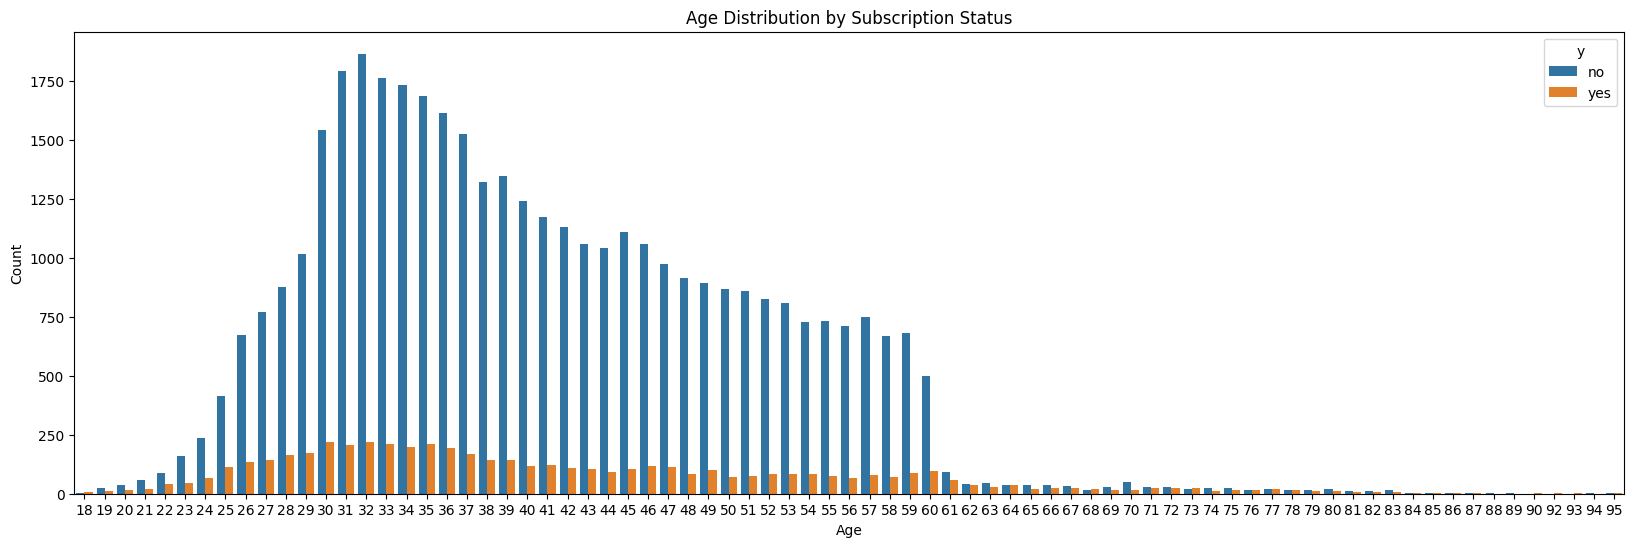

In [201]:
# Age Distribution by Subscription Status
plt.figure(figsize=(20,6))
sns.countplot(x='age', hue='y', data=df)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

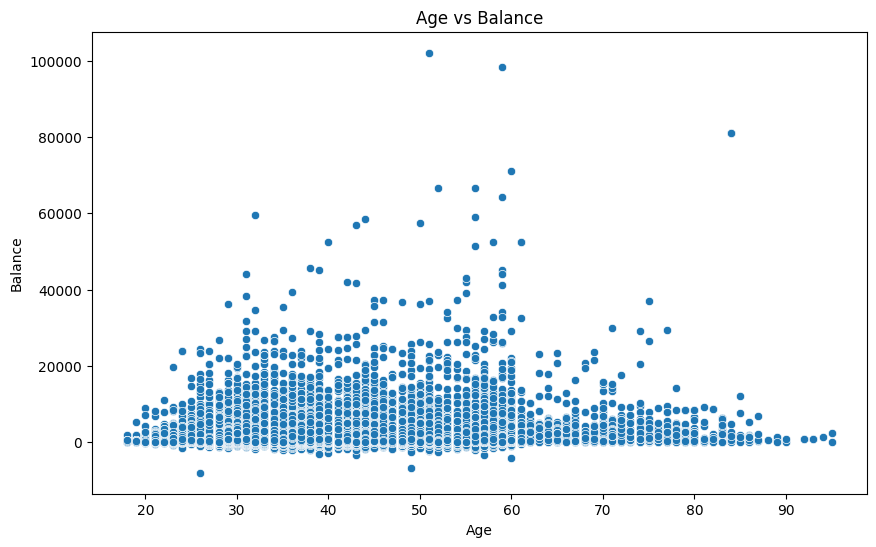

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

<ipython-input-205-7c8ec0a116bc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['age_group', 'y'])['y'].count().unstack()


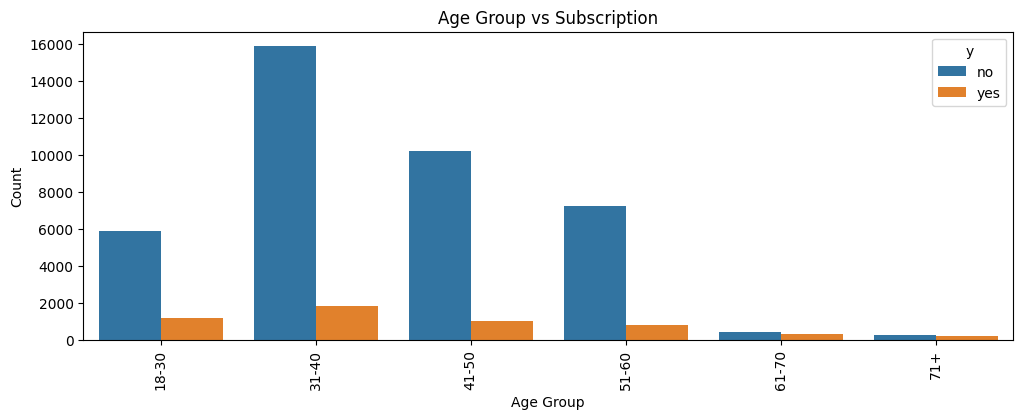

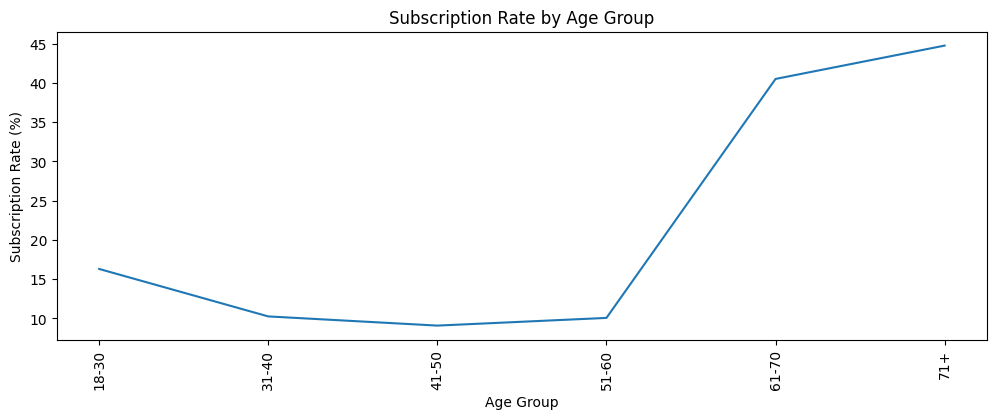


 Age group 
 y             no   yes  subscription_rate
age_group                                
18-30       5885  1145              16.29
31-40      15875  1812              10.24
41-50      10220  1019               9.07
51-60       7256   811              10.05
61-70        417   284              40.51
71+          269   218              44.76 



In [205]:
# Count y and age_group
age_group_counts = df.groupby(['age_group', 'y'])['y'].count().unstack()

# Add subscription rate
age_group_counts['subscription_rate'] = (age_group_counts['yes'] / (age_group_counts['yes'] + age_group_counts['no']) * 100).round(2)

# Visualize the relationship between age_group and y
plt.figure(figsize=(12, 4))
sns.countplot(x='age_group', hue='y', data=df)
plt.title('Age Group vs Subscription')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print("")
# Visualize the subscription rate
plt.figure(figsize=(12, 4))
sns.lineplot(x=age_group_counts.index, y='subscription_rate', data=age_group_counts)
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=90)
plt.show()

print(f"\n Age group \n {age_group_counts} \n")


 **Findings**
- Younger demographics (18-50) demonstrate subscription rates below 11%, indicating a lower propensity to subscribe to term deposits.
- However, a significant shift is observed as age increases. The 61-70 age group exhibits a subscription rate of 40.51%, while the 71+ group demonstrates the highest rate at 44.76%.



**Factors**

Older individuals demonstrate a considerably higher likelihood of subscribing to term deposits compared to their younger counterparts.

- Financial Security: Older individuals may have greater financial stability and accumulated savings, making them more inclined to invest in term deposits.
- Risk Aversion: As people approach retirement, they might prioritize lower-risk investment options like term deposits over higher-risk alternatives.
- Income Stability: Older individuals might have more predictable income streams (e.g., pensions), making them more comfortable with fixed-term investments.
- Life Stage: Financial goals and priorities shift with age. Older individuals might be focused on preserving wealth and generating passive income.


**Recommendation**: Marketing strategies should prioritize tailored messaging and offers that resonate with the financial needs and preferences of older demographics.
1.   Tailored Messaging: Highlight the benefits of stability, safety, and guaranteed returns associated with term deposits, which align with the risk-averse nature of older individuals. Emphasize how term deposits can provide a secure way to preserve their wealth while generating passive income.

2. Trust and Assurance: Use messaging that conveys trust and reliability, key concerns for older customers. Offering transparency in terms of rates, terms, and guarantees can build confidence in your product.

3. Special Promotions: Create promotions or packages specifically for older individuals, such as term deposit products with flexible durations or higher interest rates for longer commitments. These should be positioned as exclusive offers designed for those nearing or in retirement.




#### 1.3.2 Job

**Job Distribution**

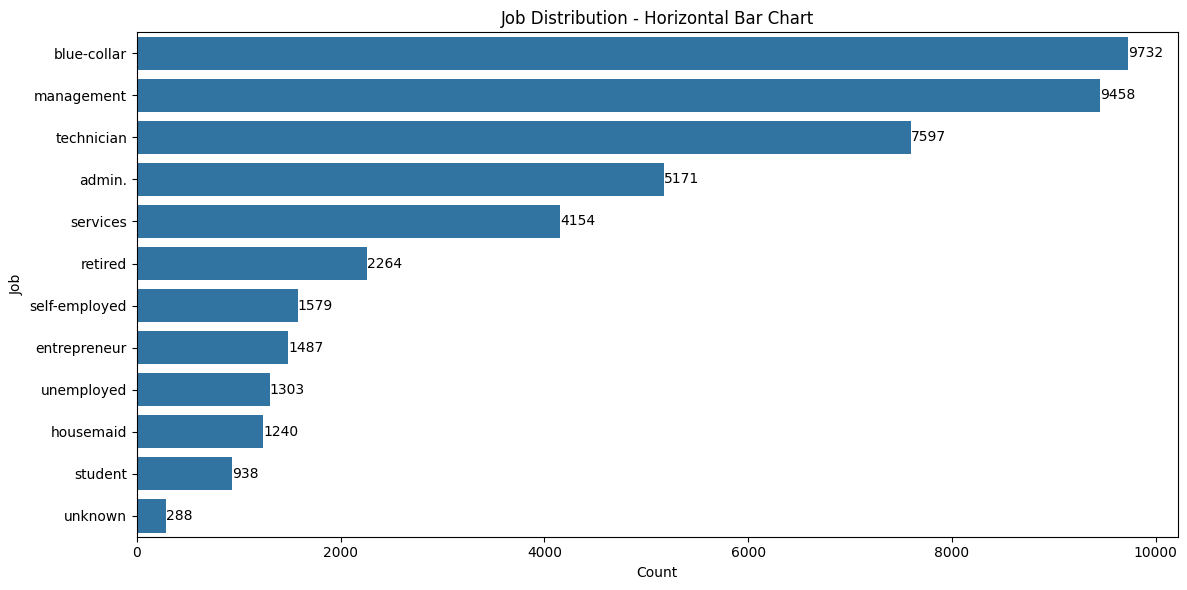

In [210]:
job_counts = df['job'].value_counts()

plt.figure(figsize=(12, 6))

# Create the horizontal bar chart
sns.barplot(y=job_counts.index, x=job_counts.values)

# Add labels on each bar
for index, value in enumerate(job_counts.values):
    plt.text(value, index, f'{value}', va='center')  # Add value labels

# Set the title and labels
plt.title('Job Distribution - Horizontal Bar Chart')
plt.xlabel('Count')
plt.ylabel('Job')

plt.tight_layout()
plt.show()


The dominant jobs are "blue-collar," "management," and "technician," suggesting a diverse customer base with a significant portion employed in these sectors.


**Job vs Education**

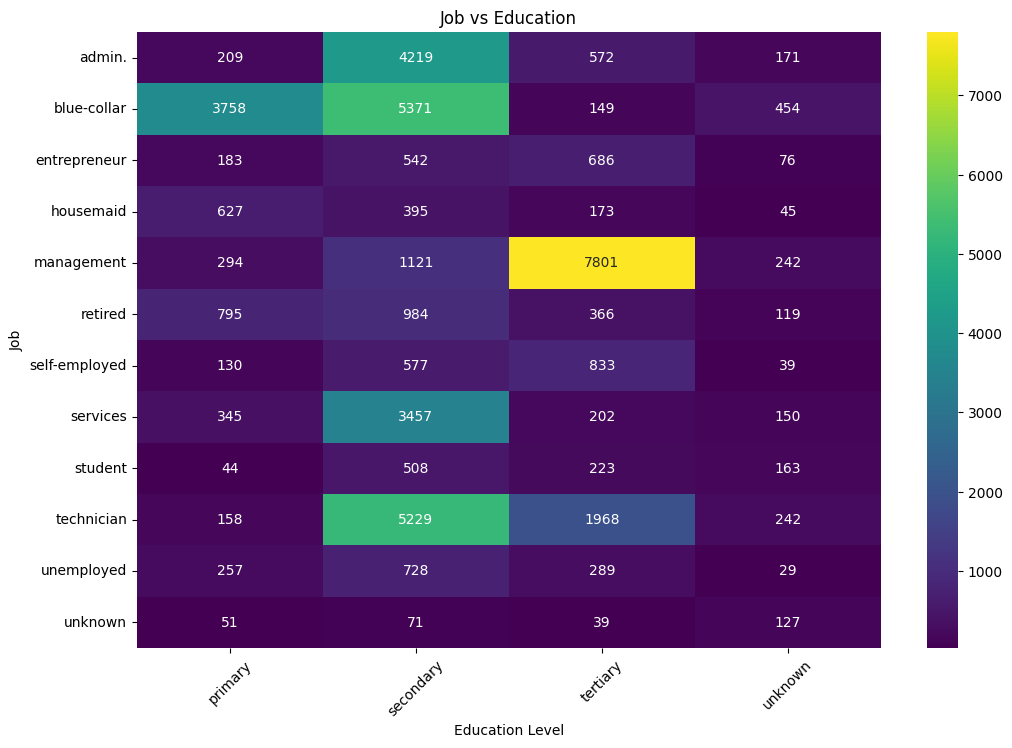

In [211]:
job_education = pd.crosstab(df['job'], df['education'])

plt.figure(figsize=(12, 8))
sns.heatmap(job_education, annot=True, cmap='viridis', fmt='d')
plt.title('Job vs Education')
plt.xlabel('Education Level')
plt.ylabel('Job')
plt.xticks(rotation=45)
plt.show()

The data shows a clear pattern of education levels across different jobs.

- Secondary education is the most common across the majority of jobs, particularly in roles like administration, blue-collar, services, and technicians.

- Tertiary education dominates in management, entrepreneurial, and self-employed positions, reflecting higher qualifications for these jobs.

- Primary education is more common in blue-collar, housemaid, and retired roles.


Overall, the data suggests a moderate to strong correlation between job roles and education levels, with higher-tier jobs like management and self-employment showing higher tertiary education representation, while more manual jobs, such as blue-collar and housemaid, lean towards lower education levels.









**Job vs Subscription Status**

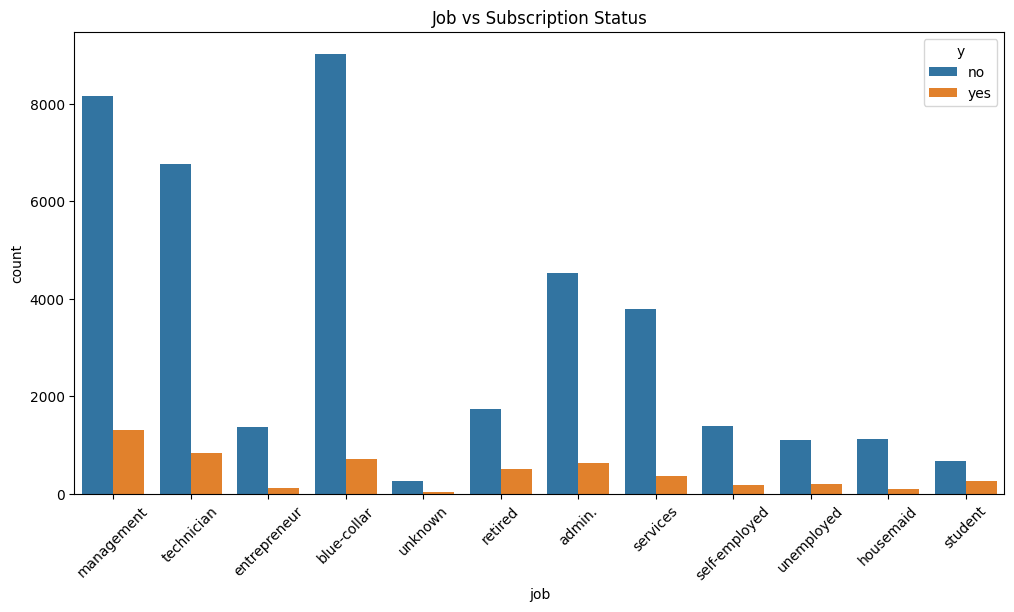

In [212]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job vs Subscription Status')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

In [213]:
# Count total occurrences and occurrences of 'yes' in y for each job
job_counts = df.groupby('job')['y'].count()
yes_counts = df[df['y'] == 'yes'].groupby('job')['y'].count()

# Calculate the proportion of 'yes' in y for each job
yes_percentage = (yes_counts / job_counts) * 100

# Format the yes_percentage as a percentage and round to 2 decimal places
yes_percentage_format = yes_percentage.round(2).astype(str) + '%'
pd.DataFrame(yes_percentage_format).transpose()


job admin. blue-collar entrepreneur housemaid management retired  \
y    12.2%       7.27%        8.27%     8.79%     13.76%  22.79%   

job self-employed services student technician unemployed unknown  
y          11.84%    8.88%  28.68%     11.06%      15.5%  11.81%

Visualise the result

<ipython-input-214-92ab8a7a010c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


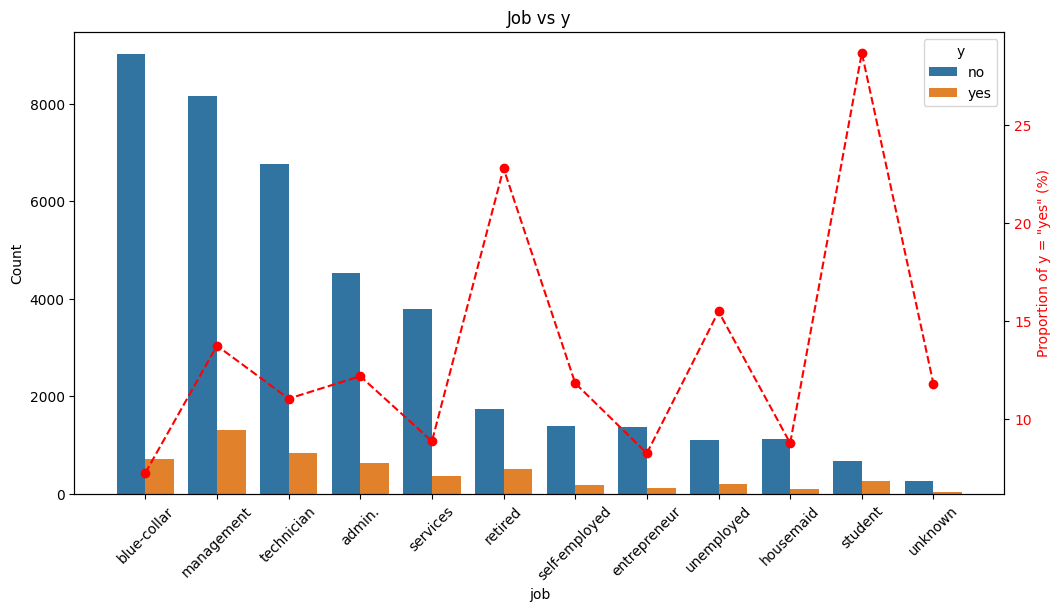

In [214]:
# Get the order of job categories from the count plot
job_order = df['job'].value_counts().index

# Reorder the yes_percentage Series to match the job order
yes_percentage = yes_percentage.reindex(job_order)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count plot with the correct job order
sns.countplot(x='job', hue='y', data=df, ax=ax1, order=job_order)
ax1.set_title('Job vs y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Count')

# Create a secondary axis
ax2 = ax1.twinx()
ax2.plot(yes_percentage.index, yes_percentage.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('Proportion of y = "yes" (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()


Job distribution among customer subscripted to term deposit

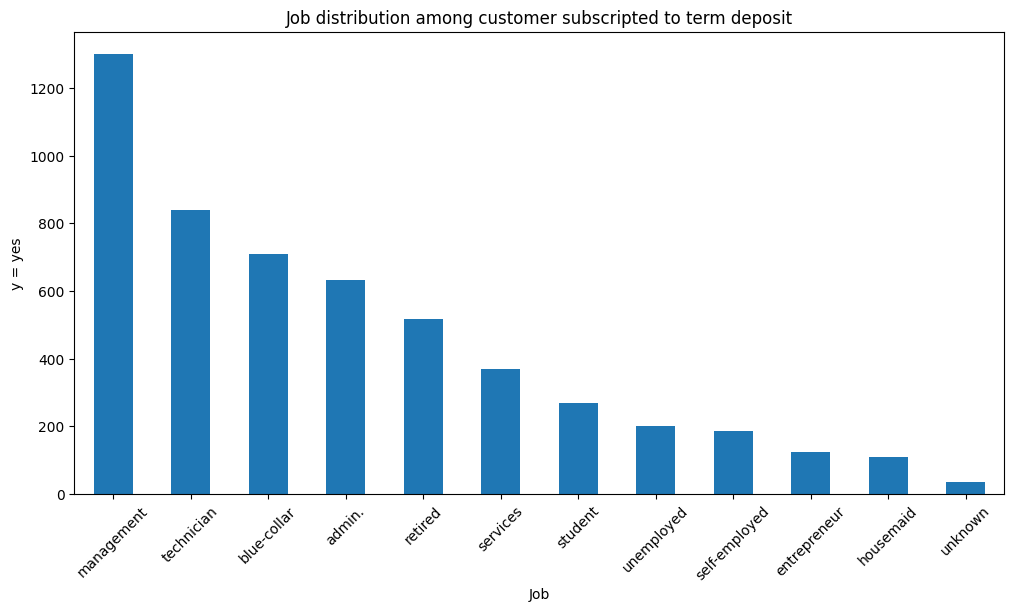

In [276]:
# Group by 'job' and 'y' and count the occurrences
job_y_counts = df.groupby(['job', 'y'])['y'].count().unstack()

# Fill NaN values with 0 (in case a job doesn't have 'yes' or 'no' values)
job_y_counts = job_y_counts.fillna(0)

# Sort the counts in descending order based on the 'yes' count
job_y_counts_sorted = job_y_counts.sort_values('yes', ascending=False)

# Plot the sorted counts as a bar chart
plt.figure(figsize=(12, 6))
job_y_counts_sorted['yes'].plot(kind='bar')
plt.title('Job distribution among customer subscripted to term deposit')
plt.xlabel('Job')
plt.ylabel('y = yes')
plt.xticks(rotation=45)
plt.show()


**Observation**

**High Conversion Rates**:
   - Students (28.68%): The highest "yes" percentage, indicating strong interest or engagement from this group, possibly due to fewer financial commitments or more openness to offers.
   - Retired (22.79%): This group also shows high engagement, which could be attributed to having more time or resources available for new commitments.

**Top 3 Jobs:**
- Blue-collar workers have the lowest subscription rate among the top three job categories, highlighting conversion challenges. In contrast, management shows strong potential with high engagement and ample representation.










#### 1.3.3 Marital

Marital Status vs Subscription Status

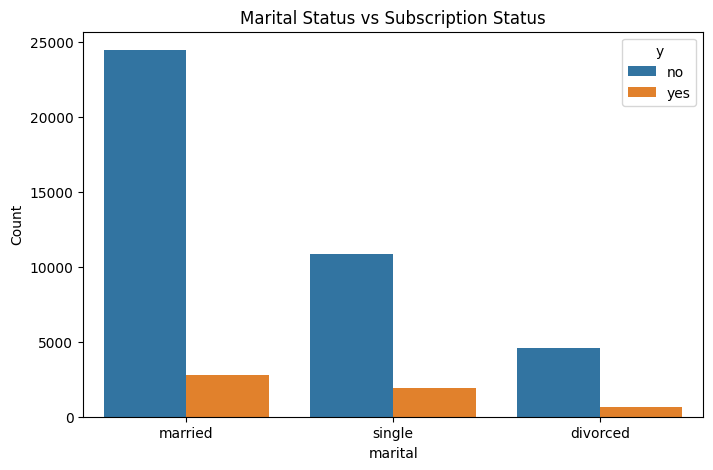

In [215]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Marital Status vs Subscription Status')
plt.ylabel('Count')
plt.show()

Marital and Subscription Rate

In [216]:
# Count total occurrences and occurrences of 'yes' in y for each marital status
marital_counts = df.groupby('marital')['y'].count()
yes_marital_counts = df[df['y'] == 'yes'].groupby('marital')['y'].count()

# Calculate the proportion of 'yes' in y for each marital status
yes_marital_percentage = (yes_marital_counts / marital_counts) * 100

# Format the yes_marital_percentage as a percentage and round to 2 decimal places
yes_marital_percentage_formatted = yes_marital_percentage.round(2).astype(str) + '%'
yes_marital_percentage_formatted


marital
divorced    11.95%
married     10.12%
single      14.95%
Name: y, dtype: object

 Single individuals might have fewer financial obligations (such as dependents or joint responsibilities) compared to married individuals, making them more open to investing in products or services that align with the campaign's goals.

**Marital and Housing Loan**

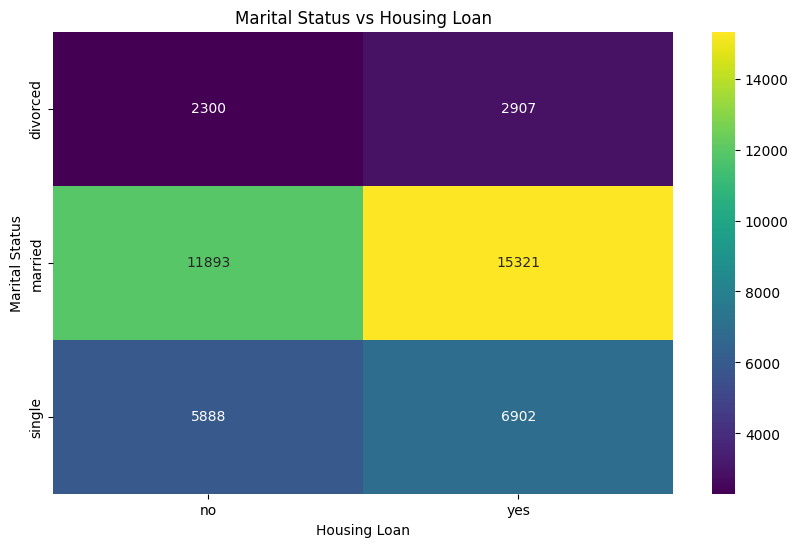

In [217]:
# Marital Status vs Housing Loan
marital_housing = pd.crosstab(df['marital'], df['housing'])

plt.figure(figsize=(10, 6))
sns.heatmap(marital_housing, annot=True, cmap='viridis', fmt='d')
plt.title('Marital Status vs Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Marital Status')
plt.show()


In [218]:
marital_housing_counts = df.groupby(['marital', 'housing'])['marital'].count().unstack()
marital_housing_counts['housing_loan_rate'] = (marital_housing_counts['yes'] / (marital_housing_counts['yes'] + marital_housing_counts['no']) * 100).round(2).astype(str) + '%'
marital_housing_counts

housing      no    yes housing_loan_rate
marital                                 
divorced   2300   2907            55.83%
married   11893  15321             56.3%
single     5888   6902            53.96%

Even though there are some slight difference, the gap is not substantial between these category.

Marital and housing loan vs subscription rate

In [ ]:
# Calculate subscription rate for marital_housing
marital_housing_counts = df.groupby(['marital', 'housing', 'y'])['y'].count().unstack()
marital_housing_counts['subscription_rate'] = (marital_housing_counts['yes'] / (marital_housing_counts['yes'] + marital_housing_counts['no']) * 100).round(2).astype(str) + '%'
marital_housing_counts


y                    no   yes subscription_rate
marital  housing                               
divorced no        1927   373            16.22%
         yes       2658   249             8.57%
married  no       10147  1746            14.68%
         yes      14312  1009             6.59%
single   no        4653  1235            20.97%
         yes       6225   677             9.81%

The subscription rate is nearly double when the customer does not have the housing loan.
- The impact of marital status on housing does not appear to be very substantial in isolation. It is the combination of housing status and marital status that significantly influences subscription rates.

- Housing status itself plays a more crucial role in determining subscription tendencies, suggesting that housing conditions might have a stronger influence on the likelihood of subscription than marital status alone.


#### 1.3.4 Education

Education and age

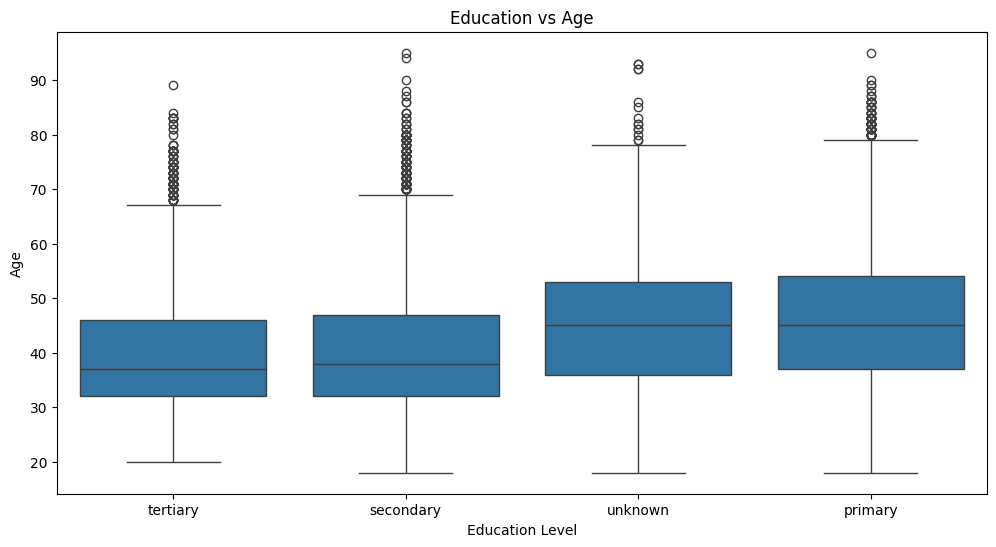

In [219]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='age', data=df)
plt.title('Education vs Age')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.show()


Education and Bank Balance

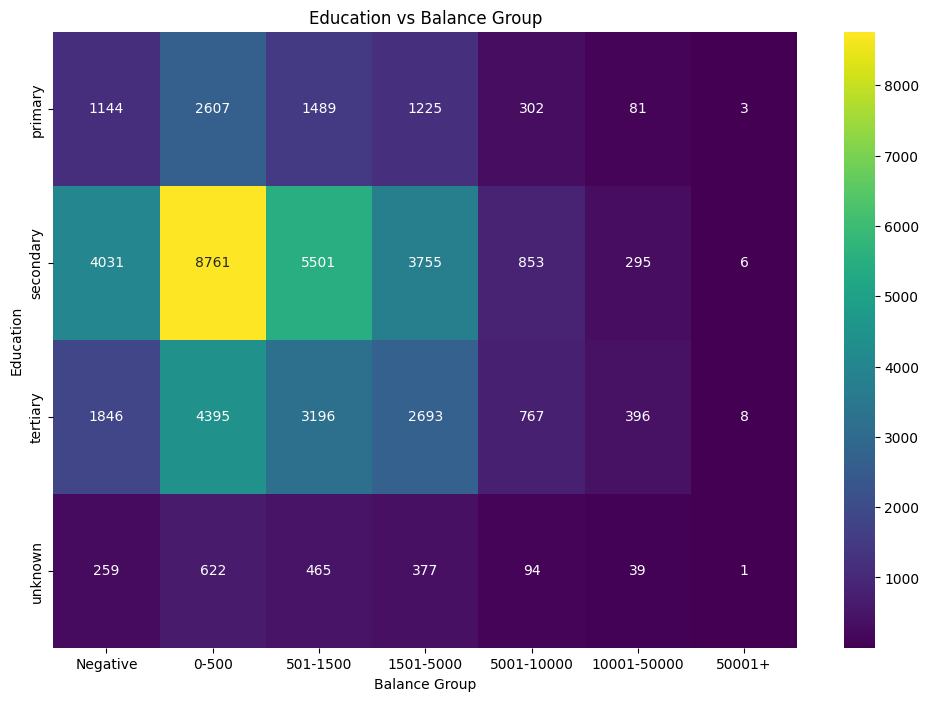

In [220]:
# Create a cross-tabulation of education and balance_group
education_balance_group_counts = pd.crosstab(df['education'], df['balance_group'])

# Create a heatmap
plt.figure(figsize=(12, 8))                             #purple,        integers format
sns.heatmap(education_balance_group_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Education vs Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Education')
plt.show()


**Findings**
1. Primary Education: Concentrated in Lower Balance Groups, where the majority of individuals with primary education fall into the "0-500" and "501-1500" balance groups. Only a very small percentage hold balances above 10,000, indicating that people with primary education tend to have lower financial reserves.

2. Secondary Education: This group has the highest number of individuals across all balance groups. The distribution is relatively even up to the "5001-10000" range, though there is a steep drop-off in higher balance groups.
  - Secondary education customers seem to be relatively stable in terms of balance, with significant representation in the "501-1500" and "1501-5000" ranges, even though majority of the group falls under "0-500" range.
3. Tertiary Education: Individuals with tertiary education show higher representation in the "5001-10000" and "10001-50000" balance groups, indicating they likely have greater financial security.
  - Even Distribution Across Lower and Upper Ranges: This group is present across all balance groups, but there is a noticeable presence in higher brackets compared to those with primary or secondary education.
4. Unknown Education: This group follows a similar distribution to those with primary education, with most balances falling below 1500. Very few individuals with unknown education levels hold balances over 10,000.









Education and Subscription Status

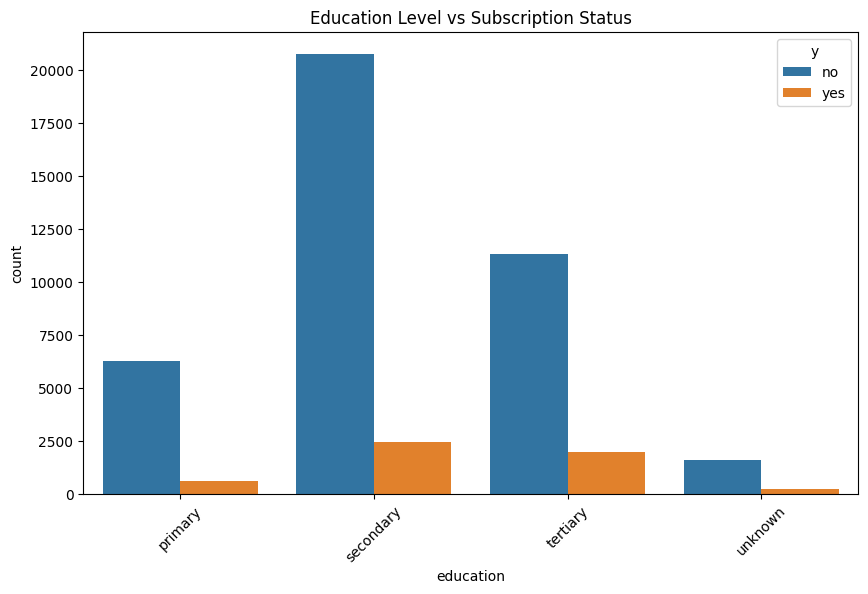


Education Level Impact on Susbscription Rate

 education
primary       8.63%
secondary    10.56%
tertiary     15.01%
unknown      13.57%
Name: y, dtype: object


In [221]:
# Count total occurrences and occurrences of 'yes' in y for each education level
education_counts = df.groupby('education')['y'].count()
yes_education_counts = df[df['y'] == 'yes'].groupby('education')['y'].count()

# Calculate the proportion of 'yes' in y for each education level
yes_education_percentage = (yes_education_counts / education_counts) * 100

# Graph
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df, order=['primary', 'secondary', 'tertiary', 'unknown'])
plt.title('Education Level vs Subscription Status')
plt.xticks(rotation=45)
plt.show()

# Format the yes_education_percentage as a percentage and round to 2 decimal places
yes_education_percentage_formatted = yes_education_percentage.round(2).astype(str) + '%'
print("\nEducation Level Impact on Susbscription Rate\n\n", yes_education_percentage_formatted)

Possible Explanations
- Financial Literacy: Higher education levels might be associated with greater financial literacy and understanding of investment products like term deposits.
- Income Potential: Individuals with higher education levels often have higher earning potential, leading to greater financial capacity for investments.
- Risk Appetite: Higher education might be linked to a greater willingness to consider and engage with financial products.
- Exposure to Information: Individuals with higher education might have more exposure to financial information and marketing materials.

Suggestions
- Targeting: Marketing efforts could be tailored to target individuals with higher education levels, emphasizing the benefits and features of term deposits.
- Messaging: Communication strategies could focus on the financial advantages and security offered by term deposits, appealing to the educated customer base.

#### 1.3.5 Default

In [ ]:
df_default = df.groupby(['default', 'y'])['y'].count().reset_index(name='count')

# Calculate the total count for each default category.
total_count = df_default.groupby('default')['count'].transform('sum')

# Create the 'percentage' column by dividing the count of each row by the total count of its default category.
df_default['percentage (by default)'] = (df_default['count'] / total_count * 100).round(2)
df_default

default    y  count  percentage (by default)
0      no   no  39159                    88.20
1      no  yes   5237                    11.80
2     yes   no    763                    93.62
3     yes  yes     52                     6.38

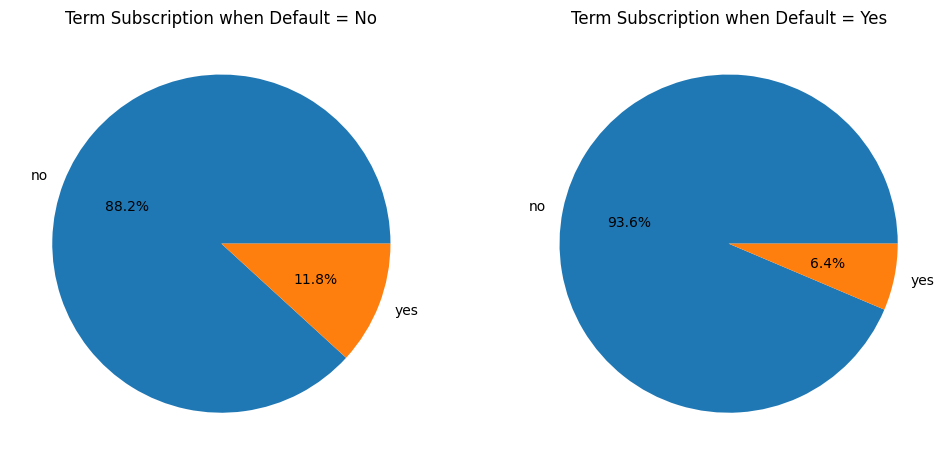


  default    y  count  percentage (by default)
0      no   no  39159                    88.20
1      no  yes   5237                    11.80
2     yes   no    763                    93.62
3     yes  yes     52                     6.38


In [ ]:
# Count the occurrences of 'yes' and 'no' in 'y' for each 'default' value
default_counts = df.groupby(['default', 'y'])['y'].count().unstack()

# Create pie charts for 'default = no' and 'default = yes'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
                        #1 row, 2 columns

# Pie chart for 'default = no'
axes[0].pie(default_counts.loc['no'], labels=default_counts.columns, autopct='%1.1f%%')
axes[0].set_title('Term Subscription when Default = No')

# Pie chart for 'default = yes'
axes[1].pie(default_counts.loc['yes'], labels=default_counts.columns, autopct='%1.1f%%')
axes[1].set_title('Term Subscription when Default = Yes')

plt.show()

print(f"\n{df_default}")

**Observation**
- Majority without Default: The vast majority of customers (39159) have no default and did not subscribe.

- Impact of Default: Customers with no credit default have a significantly higher subscription rate (11.80%) compared to those with a default (6.38%).

- Predictive Potential: Credit default status appears to be a strong predictor of subscription behavior.

**Explanations**
- Financial Constraints: Customers with defaults might have limited financial resources, making them less inclined to invest.


#### 1.3.6 Balance

Already done EDA on y, age, job and education

Balance group and Subscription status

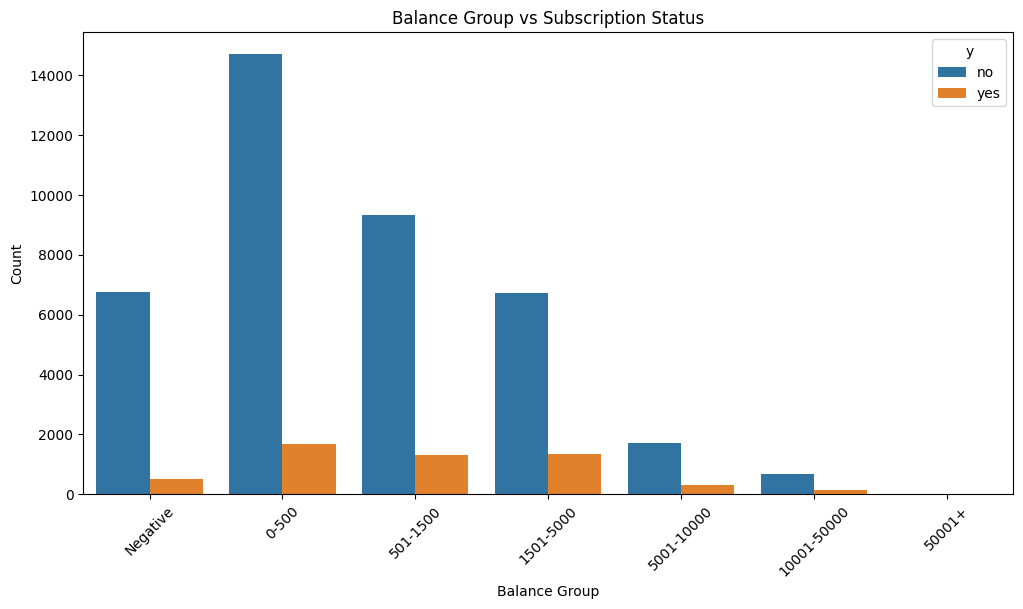

In [223]:
plt.figure(figsize=(12, 6))
sns.countplot(x='balance_group', hue='y', data=df)
plt.title('Balance Group vs Subscription Status')
plt.xlabel('Balance Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Balance group and age**

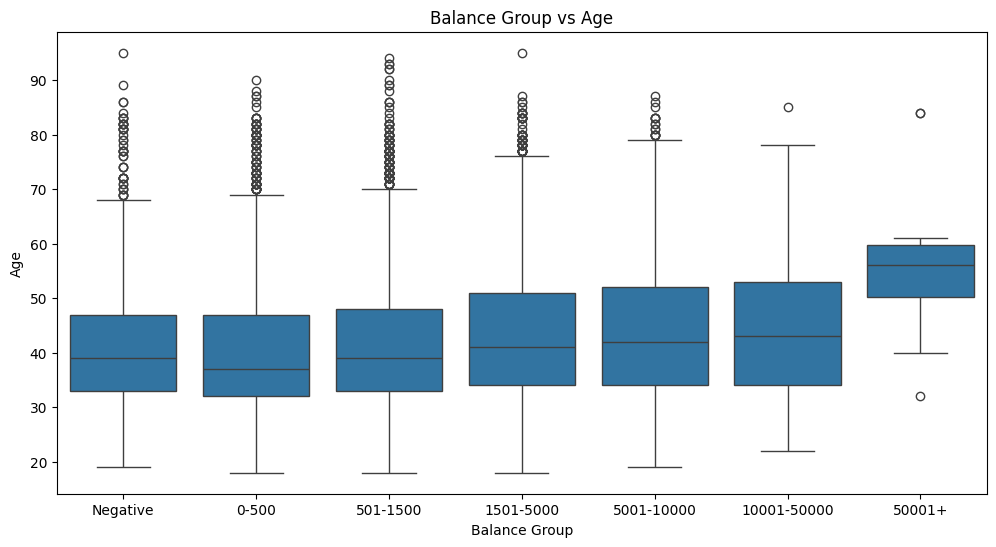

In [224]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='balance_group', y='age', data=df)
plt.title('Balance Group vs Age')
plt.xlabel('Balance Group')
plt.ylabel('Age')
plt.show()

There is a positive correlation between age and balance, indicating that as individuals age, their account balances are likely to increase. This trend reflects the natural progression of wealth accumulation and financial stability over time.

#### 1.3.7 Housing Loan (housing)


Housing Loan vs Subscription Status

In [225]:
# Count the occurrences of 'yes' and 'no' in 'y' for each 'housing' value
housing_counts = df.groupby(['housing', 'y'])['y'].count().unstack()
housing_counts

y           no   yes
housing             
no       16727  3354
yes      23195  1935

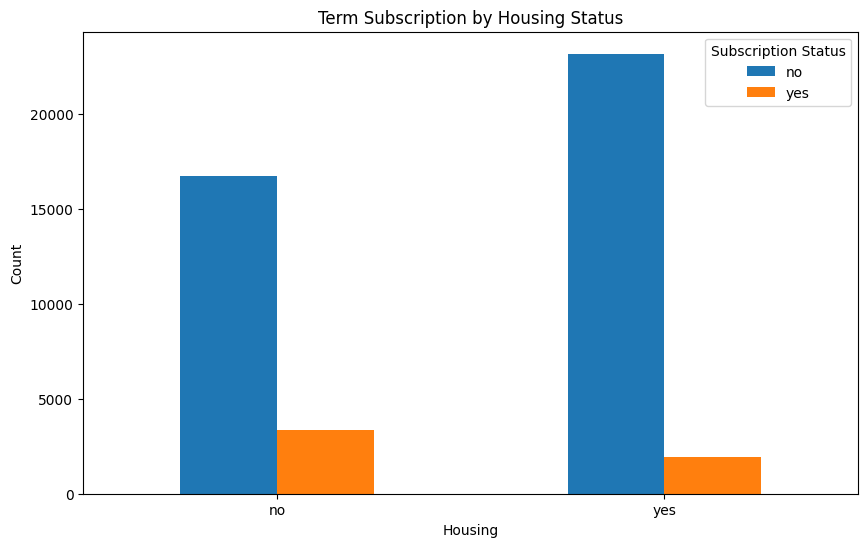

In [226]:
housing_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Term Subscription by Housing Status')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=0) # rotate the housing label or x axis to horizontal
plt.legend(title='Subscription Status')
plt.show()

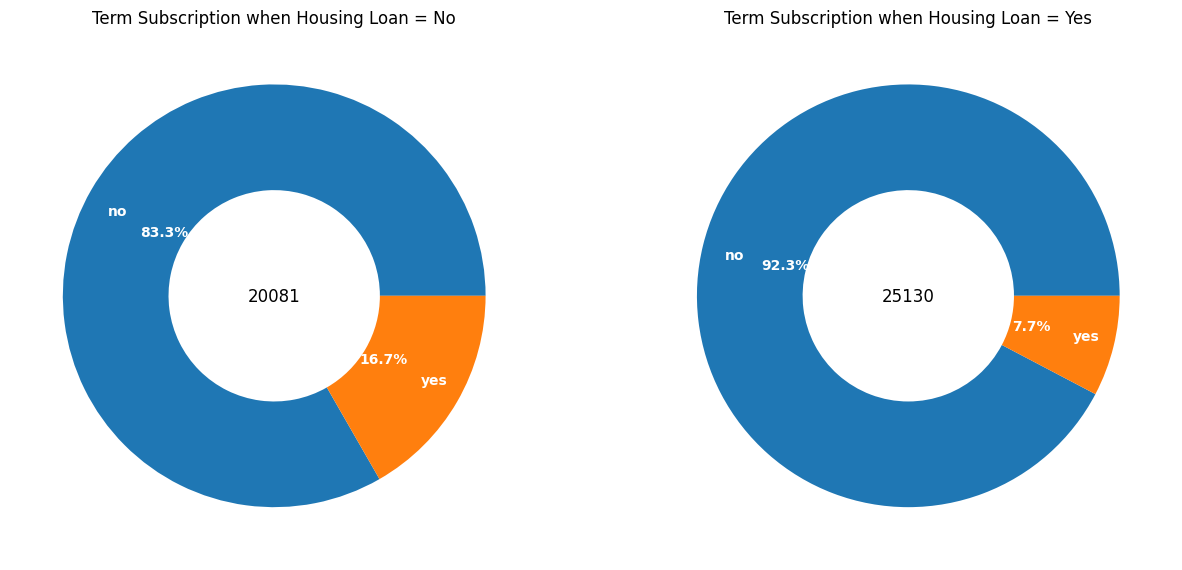

In [227]:
# Create plot area(row, columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

# Donut chart for 'housing = no'
axes[0].pie(housing_counts.loc['no'], labels=housing_counts.columns, autopct='%1.1f%%', wedgeprops=dict(width=0.5),textprops={'color': 'white', 'fontsize': 10,'fontweight': 'bold'}, labeldistance=0.8)
axes[0].set_title('Term Subscription when Housing Loan = No')
axes[0].text(0, 0, housing_counts.loc['no'].sum(), ha='center', va='center', fontsize=12)

# Donut chart for 'housing = yes'
axes[1].pie(housing_counts.loc['yes'], labels=housing_counts.columns, autopct='%1.1f%%', wedgeprops=dict(width=0.5),textprops={'color': 'white', 'fontsize': 10,'fontweight': 'bold'}, labeldistance=0.8)
          #(locate row housing = yes, with labels of pie = columns, show label with 1 dp,wedge  = 50% width of pie, text prop, the distance of label from middle)
axes[1].set_title('Term Subscription when Housing Loan = Yes')
axes[1].text(0, 0, housing_counts.loc['yes'].sum(), ha='center', va='center', fontsize=12)

plt.show()


**Observations**

Individuals without a housing loan have a higher subscription rate to term deposits (16.65%) compared to those with a housing loan (7.7%).
- Financial Constraints: Individuals with housing loans face higher financial obligations, limiting their ability to invest in additional financial products. Their focus is often on repaying debt rather than locking funds in term deposits.

- Disposable Income: Without the burden of housing loan payments, individuals have more financial flexibility and disposable income, making them more likely to invest in term deposits. They are often better positioned to save for future goals and see term deposits as a safe, attractive option.

**Suggesions**
- Financial institutions can focus campaigns on individuals without housing loans, who are more likely to invest in term deposits. Highlighting guaranteed returns and growth potential will resonate with this segment.



**Housing vs job**

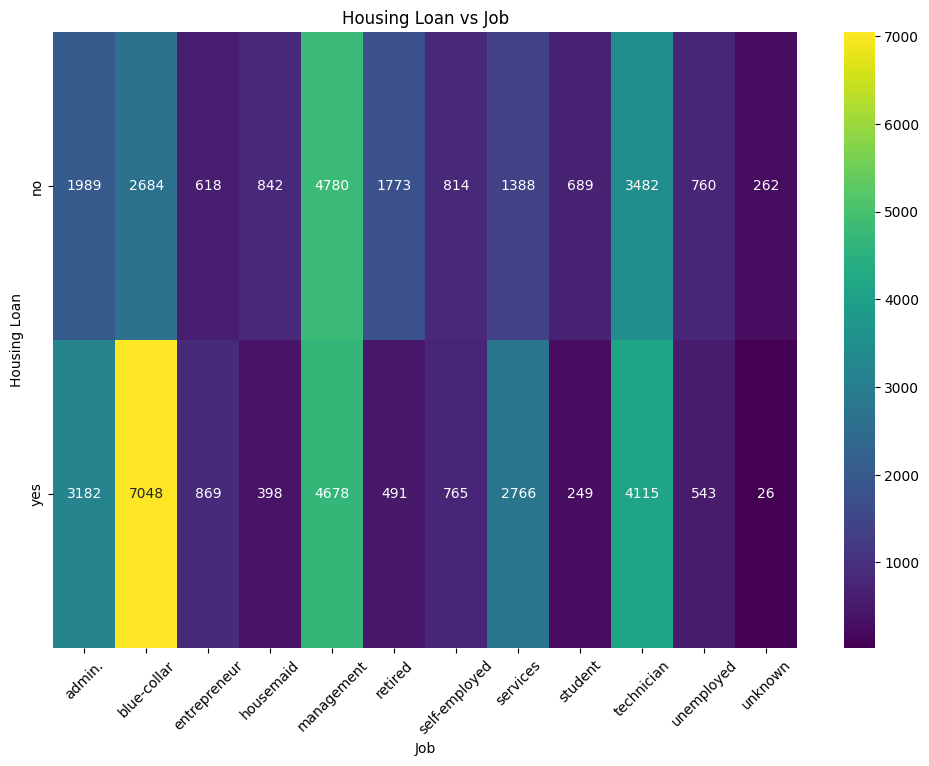

In [229]:
# Housing Loan vs Job
housing_job = pd.crosstab(df['housing'], df['job'])

plt.figure(figsize=(12, 8))
sns.heatmap(housing_job, annot=True, cmap='viridis', fmt='d')
plt.title('Housing Loan vs Job')
plt.xlabel('Job')
plt.ylabel('Housing Loan')
plt.xticks(rotation=45)
plt.show()


In [230]:
housing_job = housing_job.unstack().unstack()

# house_loan%
housing_job['house_loan%'] = ((housing_job['yes'] / (housing_job['yes'] + housing_job['no'])) * 100).round(2).astype(str) + '%'
print(housing_job)


housing          no   yes house_loan%
job                                  
admin.         1989  3182      61.54%
blue-collar    2684  7048      72.42%
entrepreneur    618   869      58.44%
housemaid       842   398       32.1%
management     4780  4678      49.46%
retired        1773   491      21.69%
self-employed   814   765      48.45%
services       1388  2766      66.59%
student         689   249      26.55%
technician     3482  4115      54.17%
unemployed      760   543      41.67%
unknown         262    26       9.03%


**Findings and recommendations**

Blue-collar workers have the highest percentage of housing loans at 72.42%, indicating a strong reliance on housing loans, likely due to their stable long-term employment. Similarly, services (66.59%) and admin (61.54%) workers show significant usage of housing loans.Management (49.46%) and self-employed (48.45%) individuals exhibit moderate housing loan percentages, suggesting more financial flexibility but still a considerable reliance on loans.

On the other hand, retired (21.69%) and students (26.55%) groups have lower housing loan percentages, likely due to income limitations.

**Unemployed**

The 41.67% housing loan rate among unemployed individuals is surprisingly high, which could indicate that many of them had stable incomes before losing their jobs and are still paying off existing loans. This group may include those who recently became unemployed but had secured loans during previous employment, or they could be relying on savings or financial support to meet their loan obligations. The data suggests that financial institutions might consider offering tailored refinancing options or support programs to help unemployed individuals manage their housing loans more effectively.








#### 1.3.8 Personal Loan (loan)

Loan and y

In [231]:
# Count the occurrences of 'yes' and 'no' in 'y' for each 'loan' value
loan_counts = df.groupby(['loan', 'y'])['y'].count().unstack()
loan_counts['subscription_rate'] = (loan_counts['yes'] / (loan_counts['yes'] + loan_counts['no']) * 100).round(2).astype(str) + '%'
print(loan_counts)

y        no   yes subscription_rate
loan                               
no    33162  4805            12.66%
yes    6760   484             6.68%


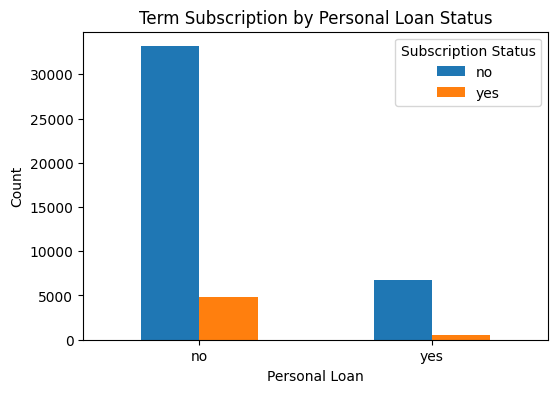

In [232]:
# Plot
loan_counts.plot(kind='bar', figsize=(6, 4))

plt.title('Term Subscription by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscription Status')
plt.show()

This personal loan have similar characteristic with housing loan. Personal loan status significantly affects subscription rates, with those without a loan showing a considerably higher likelihood of subscribing to term deposits. This understanding can guide marketing strategies and product offerings to better target and engage different customer segments.









Personal loan and housing loan (and y)

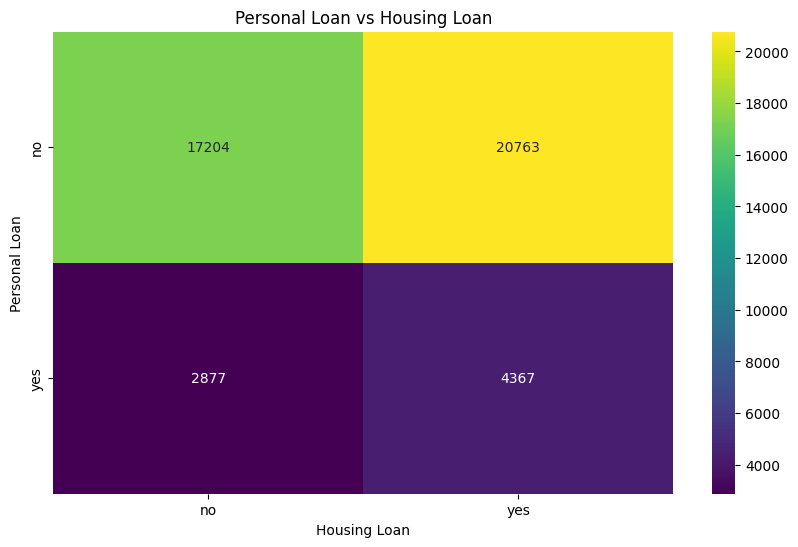

y                no   yes subscription_rate
loan housing                               
no   no       14069  3135            18.22%
     yes      19093  1670             8.04%
yes  no        2658   219             7.61%
     yes       4102   265             6.07%


In [234]:
# Create a cross-tabulation of 'loan' and 'housing'
loan_housing = pd.crosstab(df['loan'], df['housing'])

# Display the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loan_housing, annot=True, cmap='viridis', fmt='d')
plt.title('Personal Loan vs Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Personal Loan')
plt.show()

# Calculate the subscription rate for each combination of 'loan' and 'housing'
loan_housing_counts = df.groupby(['loan', 'housing', 'y'])['y'].count().unstack()
loan_housing_counts['subscription_rate'] = (loan_housing_counts['yes'] / (loan_housing_counts['yes'] + loan_housing_counts['no']) * 100).round(2).astype(str) + '%'
print(loan_housing_counts)

**Findings**

The data shows that individuals without both housing and personal loans have the highest subscription rate for term deposits at 18.22%, indicating greater financial flexibility. In contrast, those without housing loans but with personal loans have a much lower subscription rate of 8.04%, likely due to financial obligations tied to personal loans. For individuals with housing loans, the subscription rate drops further, with 7.61% for those without personal loans and 6.07% for those with both housing and personal loans.

This suggests that having a personal loan, in addition to a housing loan, creates financial strain, reducing the likelihood of investing in term deposits. Financial institutions may find it beneficial to target individuals without personal or housing loans for term deposit promotions, as they show a higher propensity to subscribe.









#### 1.3.9 Contact method (contact)

In [235]:
# Calculate the proportion of 'yes' in y for each contact method
contact_counts = df.groupby('contact')['y'].count()
yes_contact_counts = df[df['y'] == 'yes'].groupby('contact')['y'].count()
yes_contact_percentage = (yes_contact_counts / contact_counts) * 100

# Format the yes_contact_percentage as a percentage and round to 2 decimal places
yes_contact_percentage_formatted = yes_contact_percentage.round(2).astype(str) + '%'

contact_merge = pd.concat([contact_counts, yes_contact_counts, yes_contact_percentage_formatted], axis=1)
contact_merge.columns = ['total_count', 'yes_count', 'yes_percentage']
contact_merge

total_count  yes_count yes_percentage
contact                                         
cellular         29285       4369         14.92%
telephone         2906        390         13.42%
unknown          13020        530          4.07%

Cellular contact is the most effective and most popular for driving subscriptions, followed by telephone contact. The unknown contact type is the least effective.

**Recommendations**: Focus on increasing cellular contact efforts and exploring ways to improve the effectiveness of telephone contact. Address the issue of unknown contact methods to improve overall subscription rates.


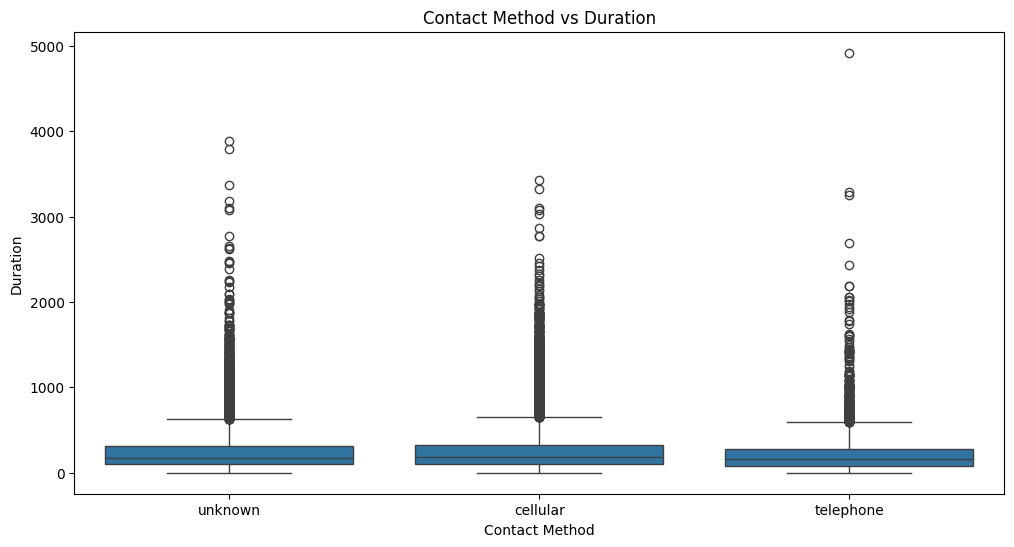


Average duration in second by contact method
contact
cellular     263.0
telephone    235.0
unknown      252.0
Name: duration, dtype: float64


In [236]:
# Contact method and duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='contact', y='duration', data=df)
plt.title('Contact Method vs Duration')
plt.xlabel('Contact Method')
plt.ylabel('Duration')
plt.show()

# Calculate the average duration for each contact method
average_duration_by_contact = df.groupby('contact')['duration'].mean().round()
print("\nAverage duration in second by contact method")
print(average_duration_by_contact)


#### 1.3.10 Last Contact Day of Month (day)

Last Contact Day of the Month vs Subscription Status

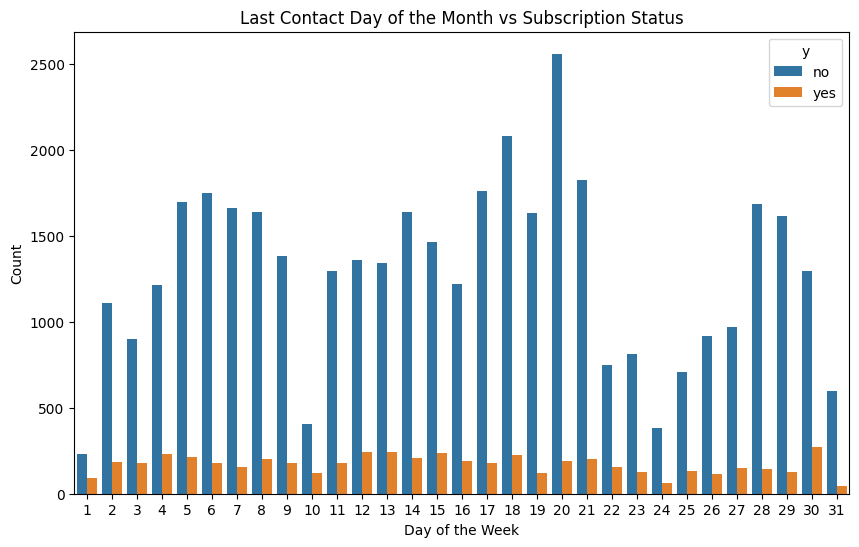

In [238]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='y', data=df)
plt.title('Last Contact Day of the Month vs Subscription Status')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


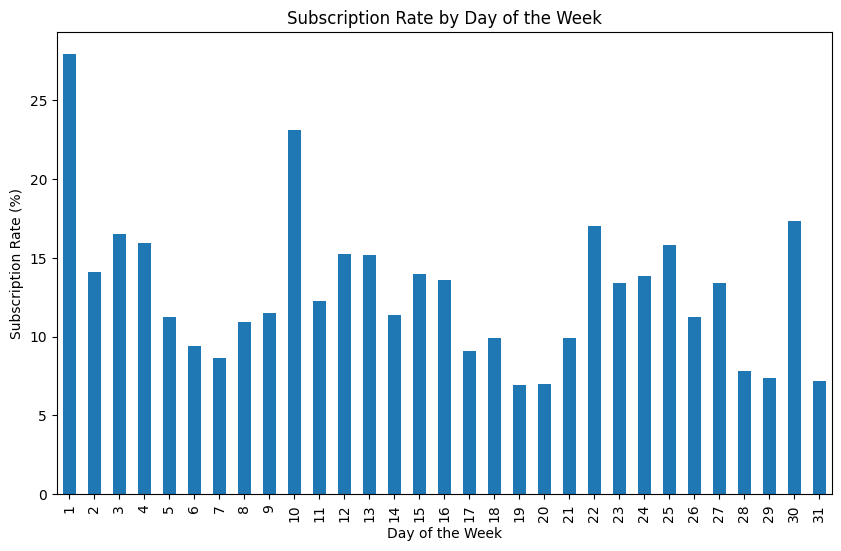

y      no  yes  subscription_rate
day                              
1     232   90              27.95
2    1111  182              14.08
3     901  178              16.50
4    1215  230              15.92
5    1695  215              11.26
6    1751  181               9.37
7    1660  157               8.64
8    1641  201              10.91
9    1382  179              11.47
10    403  121              23.09
11   1298  181              12.24
12   1359  244              15.22
13   1344  241              15.21
14   1638  210              11.36
15   1465  238              13.98
16   1223  192              13.57
17   1763  176               9.08
18   2080  228               9.88
19   1635  122               6.94
20   2560  192               6.98
21   1825  201               9.92
22    751  154              17.02
23    813  126              13.42
24    385   62              13.87
25    707  133              15.83
26    919  116              11.21
27    971  150              13.38
28   1687  143

In [239]:
# Group by 'y' and 'day' and count the occurrences -> find subscription rate
y_day_counts = df.groupby(['y', 'day'])['y'].count().unstack().unstack().unstack()
y_day_counts['subscription_rate'] = ((y_day_counts['yes'] / (y_day_counts['yes'] + y_day_counts['no'])) * 100).round(2)

y_day_counts['subscription_rate'].plot(kind='bar', figsize=(10, 6))
plt.title('Subscription Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Subscription Rate (%)')
plt.show()

print(y_day_counts)

The data reveals notable variations in subscription rates for term deposits across different days.
- Day 1 has the highest subscription rate at 27.95%, indicating exceptional effectiveness of the campaign or offer on that day.
- Conversely, Day 19 and Day 20 have the lowest subscription rates at 6.94% and 6.98%, respectively, which may reflect less effective campaigns or lower customer engagement on those days.










A potential factor influencing these lower rates could be the high volume of calls made on these days, which might contribute to employee fatigue.
- For example, Day 20 had the highest number of total calls, which could have led to decreased enthusiasm and effectiveness among employees, thereby impacting their performance and reducing subscription rates.
- Conversely, days with fewer calls and lower total call volume, such as Day 1, saw higher engagement, suggesting that managing call volumes and ensuring employees remain motivated could improve subscription outcomes.

**These insights highlight the importance of balancing the volume of calls with the quality and timing of marketing efforts to optimize subscription rates.**

day and duration

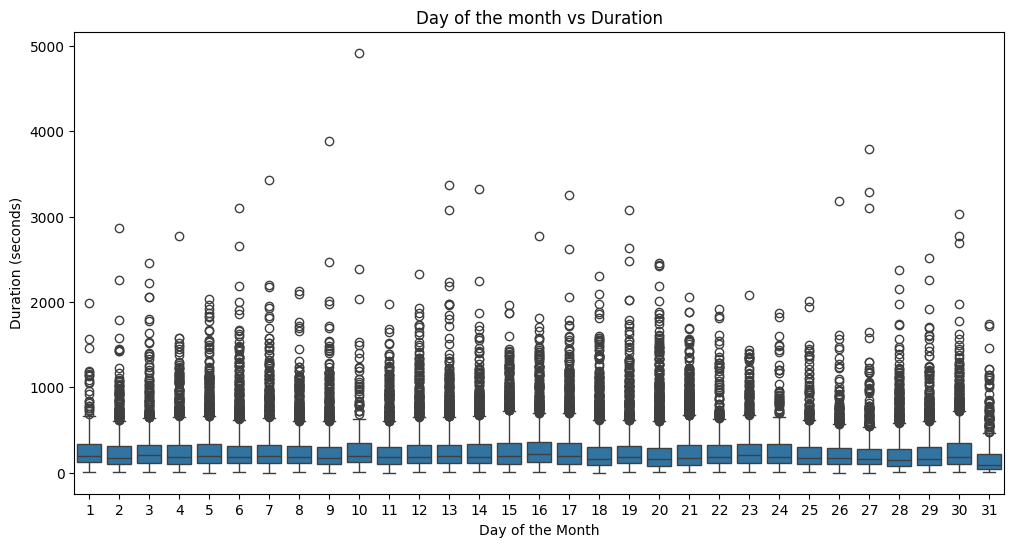

In [240]:
# Day of the week vs Duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='duration', data=df)
plt.title('Day of the month vs Duration')
plt.xlabel('Day of the Month')
plt.ylabel('Duration (seconds)')
plt.show()


In [248]:
# Calculate the average duration for each day of the week
average_duration_by_day = df.groupby('day')['duration'].mean().round()
print("\nAverage duration in second by day of the week")
# print(average_duration_by_day)

# Join average_duration_by_day and y_day_counts on 'day'
merged_df = pd.merge(average_duration_by_day, y_day_counts, on='day')

# Display all columns -< do reset_option('display.max_columns') to reset
pd.set_option('display.max_columns',None)

# Drop 'no' and 'yes' columns
merged_df = merged_df.drop(['no', 'yes'], axis=1, errors='ignore')
merged_df.transpose()



Average duration in second by day of the week


day                    1       2      3       4       5       6       7   \
duration           281.00  249.00  274.0  261.00  270.00  261.00  270.00   
subscription_rate   27.95   14.08   16.5   15.92   11.26    9.37    8.64   

day                    8       9       10      11      12      13      14  \
duration           254.00  249.00  286.00  256.00  268.00  275.00  266.00   
subscription_rate   10.91   11.47   23.09   12.24   15.22   15.21   11.36   

day                    15      16      17      18      19      20      21  \
duration           274.00  296.00  276.00  243.00  263.00  234.00  261.00   
subscription_rate   13.98   13.57    9.08    9.88    6.94    6.98    9.92   

day                    22      23      24      25      26      27      28  \
duration           265.00  273.00  281.00  251.00  237.00  227.00  226.00   
subscription_rate   17.02   13.42   13.87   15.83   11.21   13.38    7.81   

day                    29      30      31  
duration           242.00  277.00  181.00  
subscription_rate    7.39   17.31    7.15

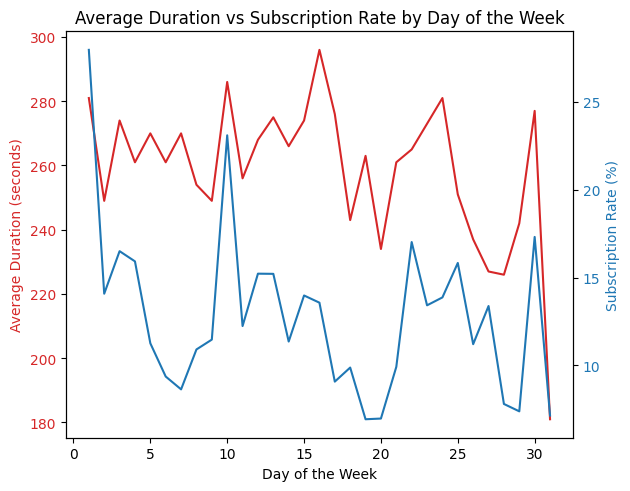

In [ ]:
fig, ax1 = plt.subplots()

# Plot the average duration on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Duration (seconds)', color=color)
ax1.plot(merged_df.index, merged_df['duration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for subscription rate
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Subscription Rate (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_df.index, merged_df['subscription_rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Duration vs Subscription Rate by Day of the Week')
plt.show()



While there appears to be a correlation between longer call durations and higher subscription rates, there are certain days where this pattern does not hold consistently. For example, on Day 16, the average call duration is relatively high at 296 seconds, yet the subscription rate is lower at 13.57%. Similarly, on Day 24, despite a longer call duration of 281 seconds, the subscription rate is only 13.87%.

These instances suggest that while call duration can influence subscription rates, other factors such as the content of the call, customer readiness, or external conditions may also play a significant role in determining the outcome, and longer calls do not always guarantee higher subscription rates.



#### 1.3.11 Last contact month of year

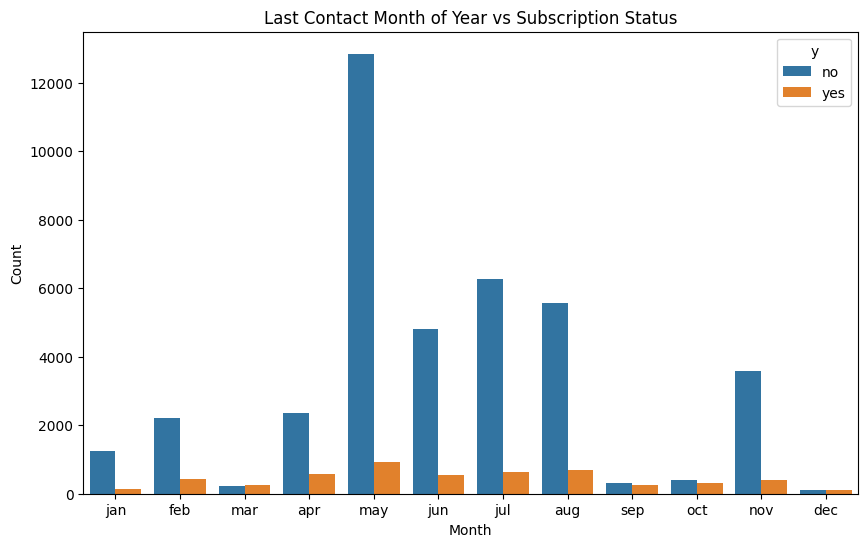

In [252]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Last Contact Month of Year vs Subscription Status')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


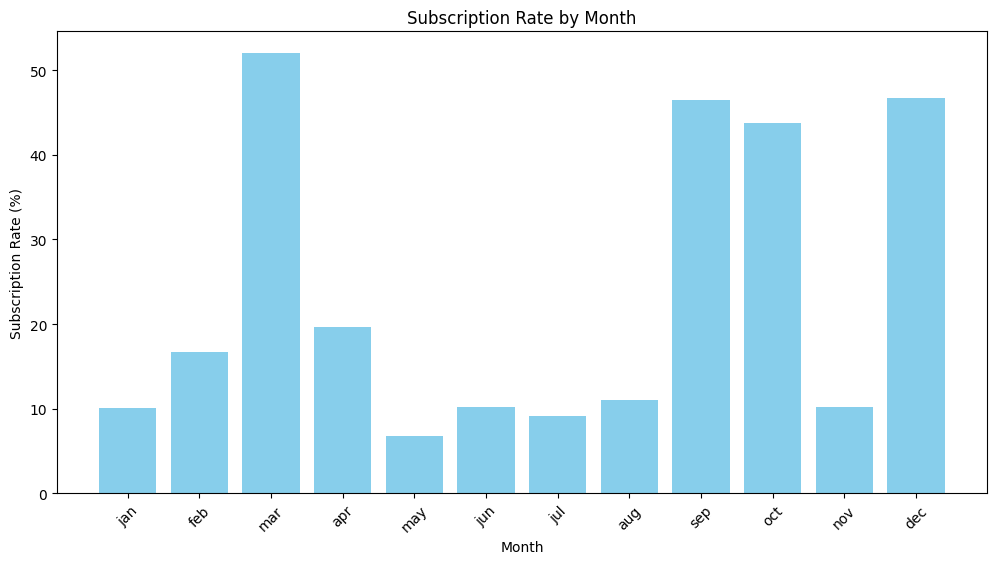

y         no  yes  subscription_rate
month                               
jan     1261  142              10.12
feb     2208  441              16.65
mar      229  248              51.99
apr     2355  577              19.68
may    12841  925               6.72
jun     4795  546              10.22
jul     6268  627               9.09
aug     5559  688              11.01
sep      310  269              46.46
oct      415  323              43.77
nov     3567  403              10.15
dec      114  100              46.73


In [257]:
# Group by 'month' and 'y' and count the occurrences
month_y_counts = df.groupby(['month', 'y'])['y'].count().unstack()

# Define the order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Reorder the DataFrame based on the specified month order
month_y_counts = month_y_counts.reindex(month_order)

# Calculate the subscription rate for each month
month_y_counts['subscription_rate'] = (month_y_counts['yes'] / (month_y_counts['yes'] + month_y_counts['no']) * 100).round(2)

# Create the bar plot with the specified order
plt.figure(figsize=(12, 6))
plt.bar(month_y_counts.index, month_y_counts['subscription_rate'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Month')
plt.xticks(rotation=45)
plt.show()

print(month_y_counts)

March (51.99%) and December (46.73%) exhibit the highest subscription rates, which is notable as these months also have lower call volumes, suggesting that the quantity strategy might not be very effective. In contrast, May (6.72%) and July (9.09%), with the lowest subscription rates, have higher call volumes.


#### 1.3.12  Last contact duration (duration)

The EDA have been performed before binning in section 1.2.2.4

#### 1.3.13 Campaign

Campaign Group vs Subscription Status

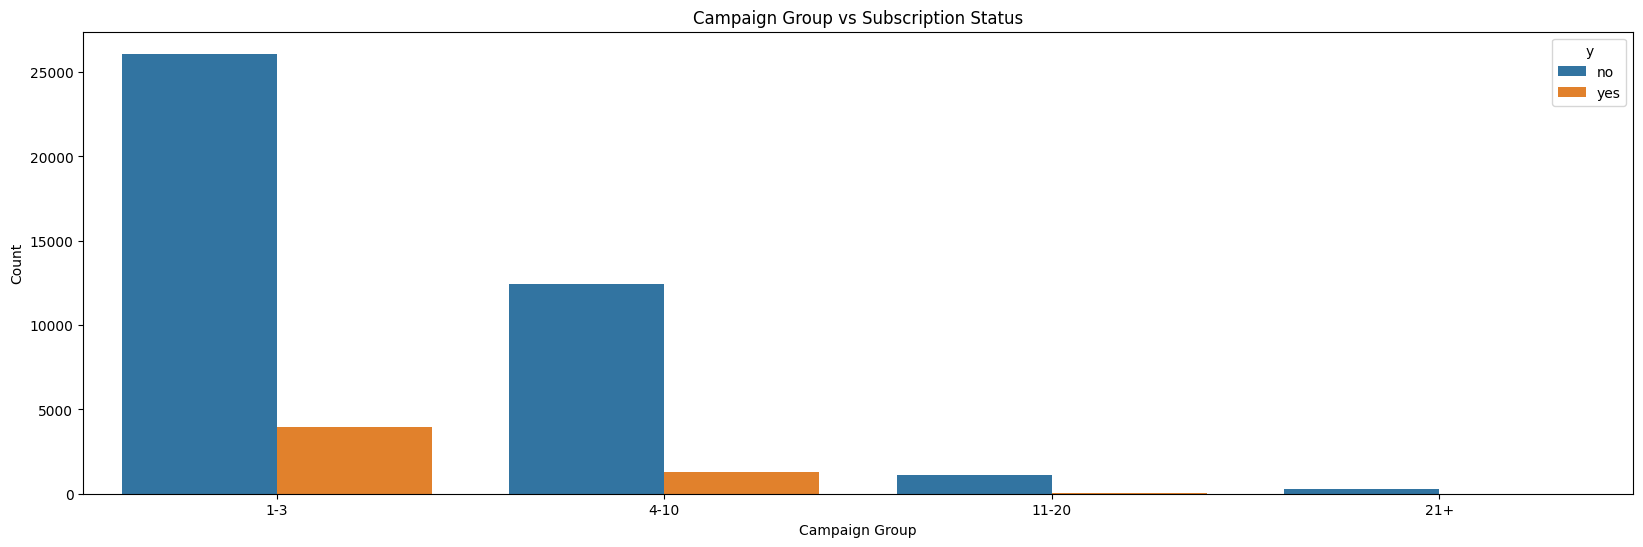

In [264]:
# Campaign_group vs y
plt.figure(figsize=(20, 6))
sns.countplot(x='campaign_group', hue='y', data=df)
plt.title('Campaign Group vs Subscription Status')
plt.xlabel('Campaign Group')
plt.ylabel('Count')
plt.show()

Campaign vs Subscription Status

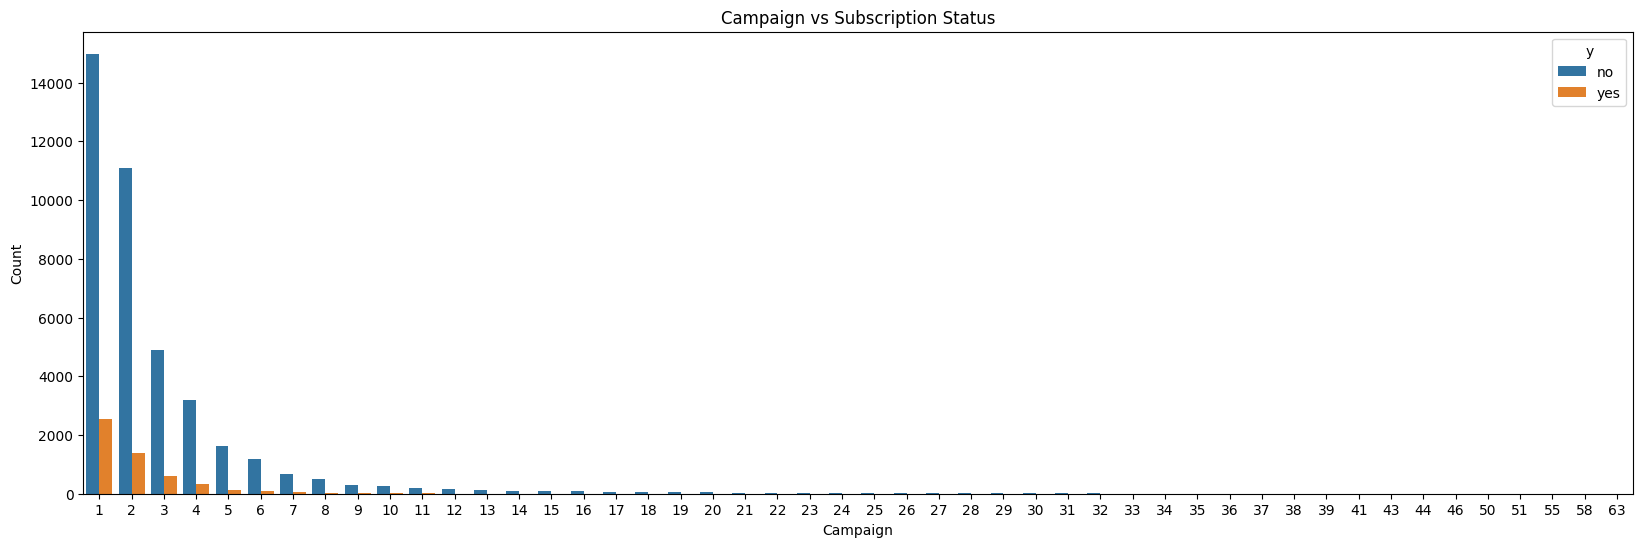

In [265]:
plt.figure(figsize=(20, 6))
sns.countplot(x='campaign', hue='y', data=df)
plt.title('Campaign vs Subscription Status')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()


In [266]:
campaign_counts = df.groupby(['campaign', 'y'], observed=False)['y'].count().unstack().fillna(0)
campaign_counts['total'] = campaign_counts.sum(axis=1)
campaign_counts['Susbscription Rate'] = (campaign_counts['yes'] / campaign_counts['total'] * 100).round(2)
campaign_counts


y              no     yes    total  Susbscription Rate
campaign                                              
1         14983.0  2561.0  17544.0               14.60
2         11104.0  1401.0  12505.0               11.20
3          4903.0   618.0   5521.0               11.19
4          3205.0   317.0   3522.0                9.00
5          1625.0   139.0   1764.0                7.88
6          1199.0    92.0   1291.0                7.13
7           688.0    47.0    735.0                6.39
8           508.0    32.0    540.0                5.93
9           306.0    21.0    327.0                6.42
10          252.0    14.0    266.0                5.26
11          185.0    16.0    201.0                7.96
12          151.0     4.0    155.0                2.58
13          127.0     6.0    133.0                4.51
14           89.0     4.0     93.0                4.30
15           80.0     4.0     84.0                4.76
16           77.0     2.0     79.0                2.53
17           63.0     6.0     69.0                8.70
18           51.0     0.0     51.0                0.00
19           44.0     0.0     44.0                0.00
20           42.0     1.0     43.0                2.33
21           34.0     1.0     35.0                2.86
22           23.0     0.0     23.0                0.00
23           22.0     0.0     22.0                0.00
24           19.0     1.0     20.0                5.00
25           22.0     0.0     22.0                0.00
26           13.0     0.0     13.0                0.00
27           10.0     0.0     10.0                0.00
28           16.0     0.0     16.0                0.00
29           15.0     1.0     16.0                6.25
30            8.0     0.0      8.0                0.00
31           12.0     0.0     12.0                0.00
32            8.0     1.0      9.0               11.11
33            6.0     0.0      6.0                0.00
34            5.0     0.0      5.0                0.00
35            4.0     0.0      4.0                0.00
36            4.0     0.0      4.0                0.00
37            2.0     0.0      2.0                0.00
38            3.0     0.0      3.0                0.00
39            1.0     0.0      1.0                0.00
41            2.0     0.0      2.0                0.00
43            3.0     0.0      3.0                0.00
44            1.0     0.0      1.0                0.00
46            1.0     0.0      1.0                0.00
50            2.0     0.0      2.0                0.00
51            1.0     0.0      1.0                0.00
55            1.0     0.0      1.0                0.00
58            1.0     0.0      1.0                0.00
63            1.0     0.0      1.0                0.00

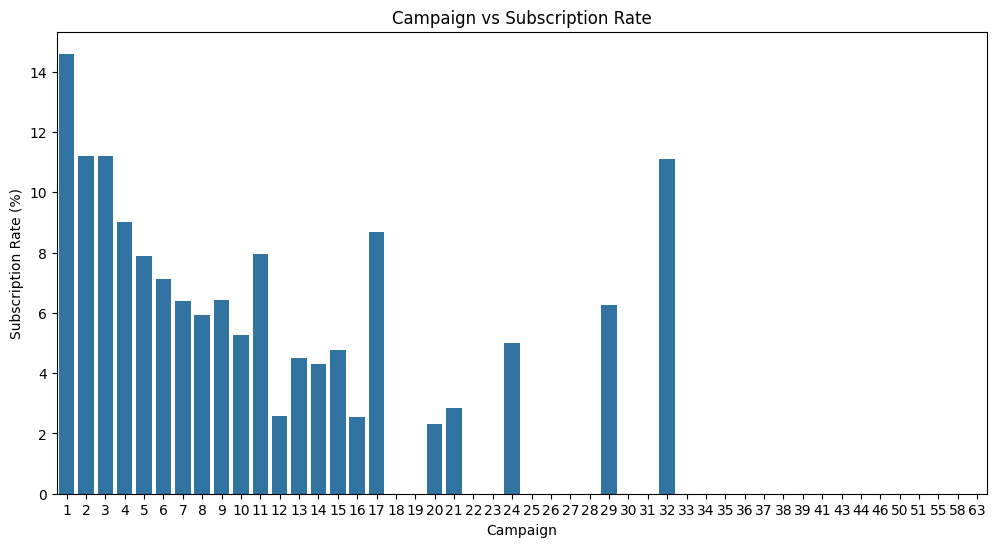

In [267]:
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_counts.index, y='Susbscription Rate', data=campaign_counts)
plt.title('Campaign vs Subscription Rate')
plt.xlabel('Campaign')
plt.ylabel('Subscription Rate (%)')
plt.show()


**Observations**
- Effectiveness Decreases with Campaign Number: Subscription rates generally decrease as the campaign number increases, indicating that later campaigns may have been less effective or targeted different audiences.
This analysis highlights the importance of optimizing campaign targeting and strategy to maintain or improve subscription rates over time, avoid wasting resources.

#### 1.3.14 Pdays

number of days that passed by after the client was last contacted from a previous campaign

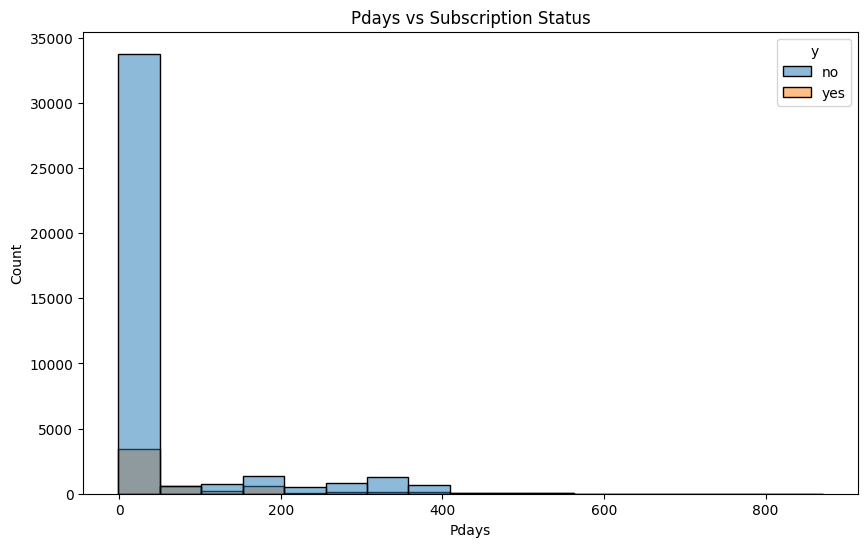

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pdays', hue='y')
plt.title('Pdays vs Subscription Status')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.show()

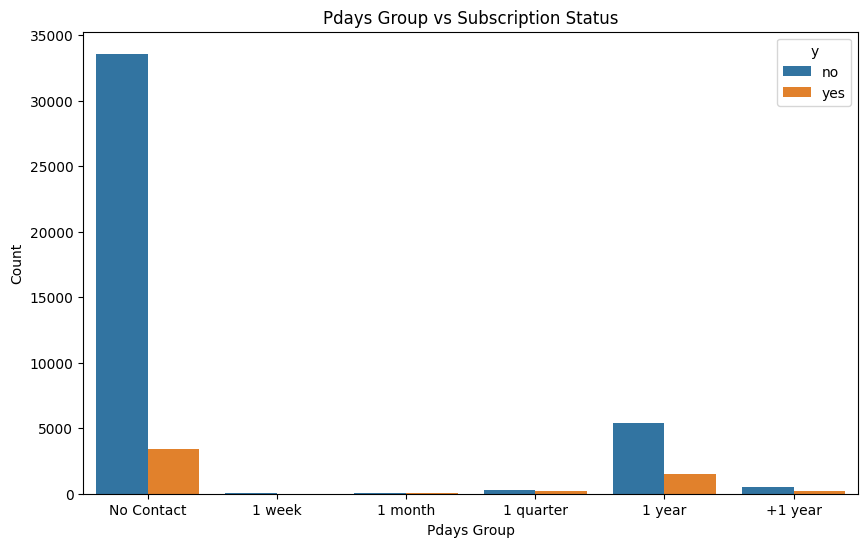

In [ ]:
# 'pdays_group' and 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='pdays_group', hue='y', data=df)
plt.title('Pdays Group vs Subscription Status')
plt.xlabel('Pdays Group')
plt.ylabel('Count')
plt.show()


In [ ]:
pdays_group_counts

y               no   yes  subscription_rate
pdays_group                                
No Contact   33570  3384               9.16
1 week          66    10              13.16
1 month         93    18              16.22
1 quarter      285   192              40.25
1 year        5405  1494              21.66
+1 year        503   191              27.52

- 1 Quarter: This group shows the highest subscription rate of 40.25%. This suggests that prospects who were contacted within the last quarter are significantly more likely to subscribe . It highlights the importance of timely follow-up. Regardless, the amount of contact is not really high (approximately 400).
- 1 Week and 1 Month: These groups have lower subscription rates and counts compared to the quarter or year-long contact groups (13.16% and 16.22%, respectively). This suggests that very recent contacts might not be as effective in driving subscriptions, potentially due to the timing or nature of the follow-up.

- 1 Year and +1 Year: These groups have moderate subscription rates (21.66% and 27.52%, respectively). Although these rates are lower than those for more recent contacts, they are still relatively high compared to some other groups. It indicates that even with a longer interval, there is still potential for subscription, especially if the follow-up is well-targeted.

- No Contact: This group has the lowest subscription rate at 9.16%. This is expected, as no contact means no opportunity for engagement.


Focus efforts on prospects contacted within the last quarter, as they show a high likelihood of subscription. Continue to monitor the effectiveness of the time variable on subscription rate.


#### 1.3.15 previous

number of contacts performed before this campaign and for this client

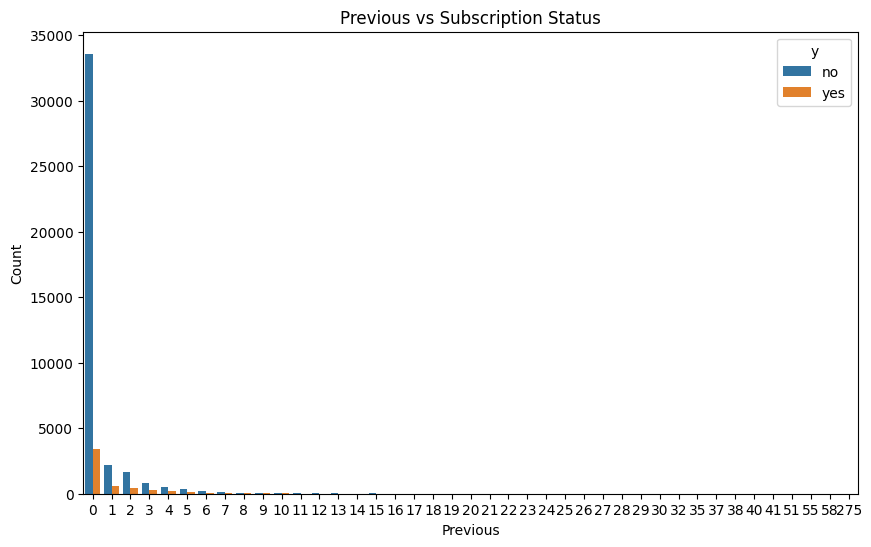

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='previous', hue='y', data=df)
plt.title('Previous vs Subscription Status')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.show()


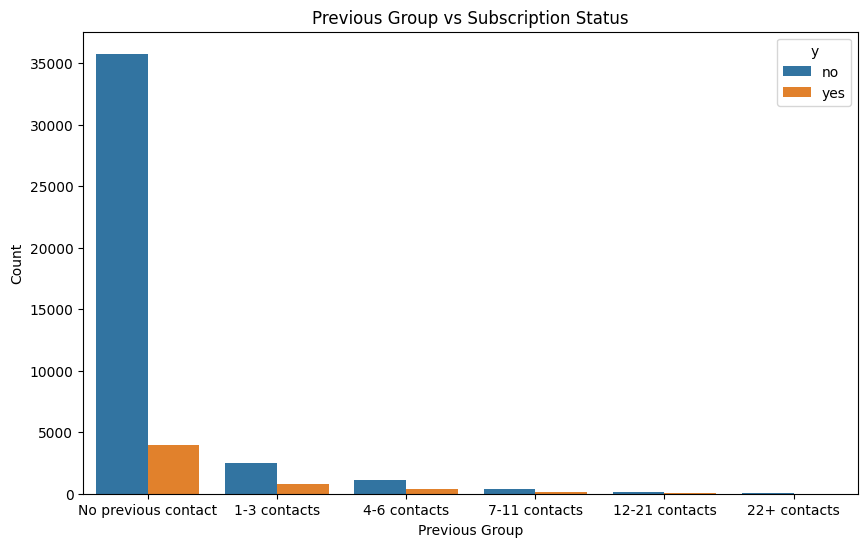

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_group', hue='y', data=df)
plt.title('Previous Group vs Subscription Status')
plt.xlabel('Previous Group')
plt.ylabel('Count')
plt.show()


In [ ]:
# Defined in 1.2.2.7
previous_group_counts

y                       no   yes  subscription_rate
previous_group                                     
No previous contact  35759  3967               9.99
1-3 contacts          2498   750              23.09
4-6 contacts          1075   375              25.86
7-11 contacts          400   158              28.32
12-21 contacts         146    32              17.98
22+ contacts            44     7              13.73

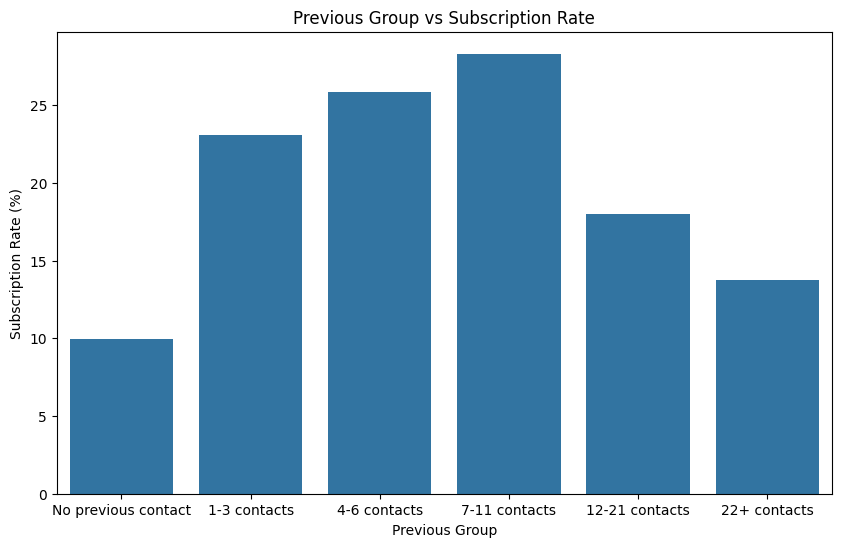

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='previous_group', y='subscription_rate', data=previous_group_counts)
plt.title('Previous Group vs Subscription Rate')
plt.xlabel('Previous Group')
plt.ylabel('Subscription Rate (%)')
plt.show()

- Optimal Range: Customers who have been contacted 1 to 11 times have the highest subscription rates (23.09% to 28.32%), suggesting that a moderate level of engagement is ideal. This wide range suggest previous contacts does not have great impact on the target variable.
- Diminishing Returns: While previous contact is generally positive, contacting customers more than 11 times leads to lower subscription rates, possibly due to customer fatigue.

**Recommendations**
- Focus on Engaged Customers: Prioritize customers who have been contacted a few times already, as they are more likely to convert.
- Develop different strategies for customers based on their previous contact history.
  - For example, customers with no prior contact might need more introductory information, while those contacted multiple times might benefit from targeted offers or incentives.
- Avoid Over-Contact: Be mindful of the frequency of contact to avoid overwhelming customers and causing disengagement. Consider alternative communication channels or personalized messages to maintain interest.


#### 1.3.16 poutcome (column removed)

--------------------------------------------------------

### 1.4 Label Encoder and Correlation Matrix

In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... pdays  previous   y  y_int  age_group balance_group  \
0  unknown    5  ...    -1         0  no      0      51-60     1501-5000   
1  unknown    5  ...    -1         0  no      0      41-50         0-500   
2  unknown    5  ...    -1         0  no      0      31-40         0-500   
3  unknown    5  ...    -1         0  no      0      41-50     1501-5000   
4  unknown    5  ...    -1         0  no      0      31-40         0-500   

   duration_group_120 campaign_group pdays_group       previous_group  
0             240-359            1-3  No Contact  No previous contact  
1             120-239            1-3  No Contact  No previous contact  
2               0-119            1-3  No Contact  No previous contact  
3               0-119            1-3  No Contact  No previous contact  
4             120-239            1-3  No Contact  No previous contact  

[5 rows x 23 columns]

Drop numerical column to train model

In [94]:
df_to_encode = df.drop(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous','y_int'], axis=1)
df_to_encode.head()

job  marital  education default housing loan  contact  day month  \
0    management  married   tertiary      no     yes   no  unknown    5   may   
1    technician   single  secondary      no     yes   no  unknown    5   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown    5   may   
3   blue-collar  married    unknown      no     yes   no  unknown    5   may   
4       unknown   single    unknown      no      no   no  unknown    5   may   

    y age_group balance_group duration_group_120 campaign_group pdays_group  \
0  no     51-60     1501-5000            240-359            1-3  No Contact   
1  no     41-50         0-500            120-239            1-3  No Contact   
2  no     31-40         0-500              0-119            1-3  No Contact   
3  no     41-50     1501-5000              0-119            1-3  No Contact   
4  no     31-40         0-500            120-239            1-3  No Contact   

        previous_group  
0  No previous contact  
1  No previous contact  
2  No previous contact  
3  No previous contact  
4  No previous contact

Utilise lableEncoder to convert categorical variables into numeric values, making them compatible with machine learning algorithms. This technique assigns a unique integer to each category in a column.

In [95]:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
le = LabelEncoder()

##### Convert object to category

Benefits of Converting to category Before Encoding
- Memory Efficiency: Converting object columns to category can significantly reduce memory usage, especially if the column has many repeated values. This is because category uses integer codes internally, rather than storing strings.

- Performance Improvement: Operations and transformations on category columns are generally faster than on object columns due to the integer representation. This can speed up encoding and other preprocessing steps.

- Improved Encoding: Some encoding techniques, such as one-hot encoding, work more efficiently when the data is in category format. The category codes are used as the basis for creating the new encoded columns.



In [96]:
le_features = df_to_encode.select_dtypes(include=['object']).columns.values
le_features

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'y'], dtype=object)

In [97]:
# List of columns to convert
columns_to_convert = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Convert specified columns to 'category'
for column in columns_to_convert:
    df_to_encode[column] = df_to_encode[column].astype('category')

In [98]:
le_features = df_to_encode.select_dtypes(include=['category']).columns.values
print(le_features)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'age_group' 'balance_group' 'duration_group_120' 'campaign_group'
 'pdays_group' 'previous_group']


In [99]:
df_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job                 45211 non-null  category
 1   marital             45211 non-null  category
 2   education           45211 non-null  category
 3   default             45211 non-null  category
 4   housing             45211 non-null  category
 5   loan                45211 non-null  category
 6   contact             45211 non-null  category
 7   day                 45211 non-null  int64   
 8   month               45211 non-null  category
 9   y                   45211 non-null  object  
 10  age_group           45211 non-null  category
 11  balance_group       45211 non-null  category
 12  duration_group_120  45211 non-null  category
 13  campaign_group      45211 non-null  category
 14  pdays_group         45211 non-null  category
 15  previous_group      45211 non-null  

#### 1.4.1 One hot encode and label encoder

In [100]:
# Apply one-hot encoding to categorical columns, except mont and y
df_encoded = pd.get_dummies(df_to_encode, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'age_group', 'balance_group', 'duration_group_120', 'campaign_group','pdays_group',
                                         'previous_group'])

# Fit and transform the 'y' column to numerical values
df_encoded['y'] = le.fit_transform(df_encoded['y'])

# same for month
df_encoded['month'] = le.fit_transform(df_encoded['month'])


In [101]:
# set to see all columns
pd.set_option('display.max_columns', None)

In [102]:
df_encoded.head()

day  month  y  job_admin.  job_blue-collar  job_entrepreneur  \
0    5      8  0       False            False             False   
1    5      8  0       False            False             False   
2    5      8  0       False            False              True   
3    5      8  0       False             True             False   
4    5      8  0       False            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False            True        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False            True           False        False   
2         False        False           False           False        False   
3         False        False           False           False        False   
4         False        False           False           False         True   

   marital_divorced  marital_married  marital_single  education_primary  \
0             False             True           False              False   
1             False            False            True              False   
2             False             True           False              False   
3             False             True           False              False   
4             False            False            True              False   

   education_secondary  education_tertiary  education_unknown  default_no  \
0                False                True              False        True   
1                 True               False              False        True   
2                 True               False              False        True   
3                False               False               True        True   
4                False               False               True        True   

   default_yes  housing_no  housing_yes  loan_no  loan_yes  contact_cellular  \
0        False       False         True     True     False             False   
1        False       False         True     True     False             False   
2        False       False         True    False      True             False   
3        False       False         True     True     False             False   
4        False        True        False     True     False             False   

   contact_telephone  contact_unknown  age_group_18-30  age_group_31-40  \
0              False             True            False            False   
1              False             True            False            False   
2              False             True            False             True   
3              False             True            False            False   
4              False             True            False             True   

   age_group_41-50  age_group_51-60  age_group_61-70  age_group_71+  \
0            False             True            False          False   
1             True            False            False          False   
2            False            False            False          False   
3             True            False            False          False   
4            False            False            False          False   

   balance_group_Negative  balance_group_0-500  balance_group_501-1500  \
0                   False                False                   False   
1                   False                 True                   False   
2                   False                 True                   False   
3                   False                False                   False   
4                   False                 True                   False   

   balance

In [103]:
df_encoded.shape

(45211, 76)

In [104]:
# Calculate the correlation matrix
correlation_matrix_le = df_encoded.corr()

# Extract the correlation of the 'y' column with other columns
# Remove the correlation of 'y' with itself
y_correlation = correlation_matrix_le['y'].drop('y').sort_values(ascending=False)

# Display the correlation values
print(y_correlation)

duration_group_120_840-959            0.144926
duration_group_120_600-719            0.142661
housing_no                            0.139173
contact_cellular                      0.135873
duration_group_120_960-1079           0.132635
                                        ...   
housing_yes                          -0.139173
previous_group_No previous contact   -0.143400
contact_unknown                      -0.150935
pdays_group_No Contact               -0.167263
duration_group_120_0-119             -0.212197
Name: y, Length: 75, dtype: float64


<ipython-input-105-2179f5e9948a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_correlation.values, y=y_correlation.index, palette='coolwarm', orient='h')


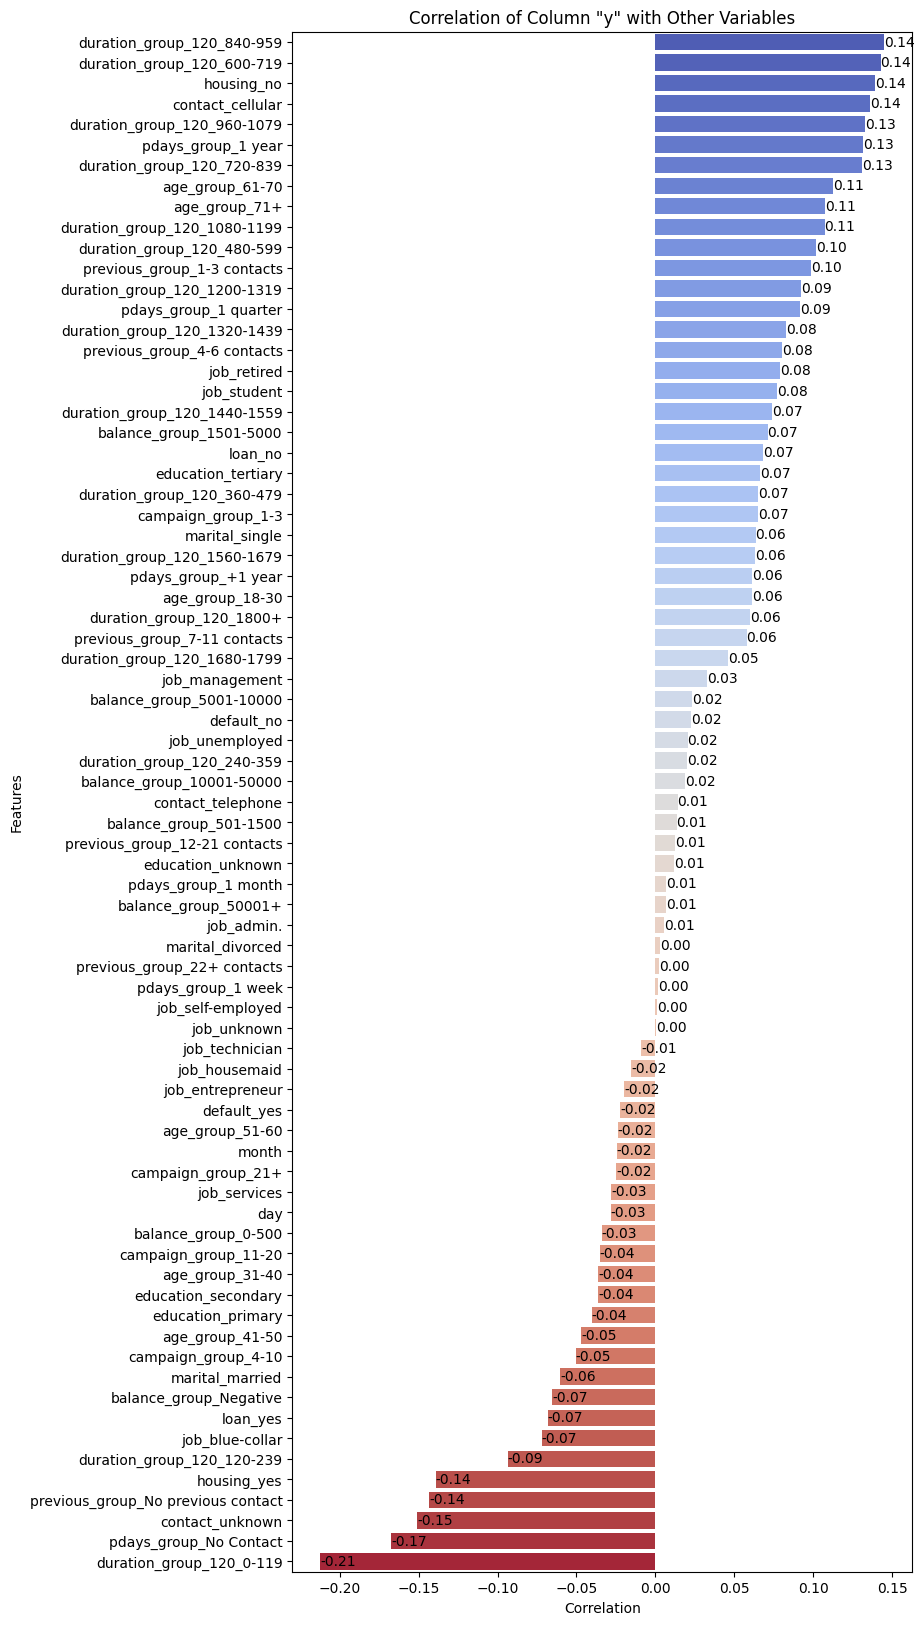

In [105]:
# Plot the correlation of 'y' with other columns (vertically) with labels
plt.figure(figsize=(8, 20))
ax = sns.barplot(x=y_correlation.values, y=y_correlation.index, palette='coolwarm', orient='h')

# Add labels to each bar
for index, value in enumerate(y_correlation.values):
    ax.text(value, index, f'{value:.2f}', va='center')

plt.title('Correlation of Column "y" with Other Variables')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()


#### 1.4.2 Drop unknown column
- If the job_unknown columns is true, we don't know the job. And if it is false, the other job column will be true. Hence, this column is useless and we should drop this. Same applied for education_unkown and contact_unknown

In [106]:
df_encoded.drop(columns = ['job_unknown', 'contact_unknown', 'education_unknown'], inplace = True)

In [107]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 73 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   day                                 45211 non-null  int64
 1   month                               45211 non-null  int64
 2   y                                   45211 non-null  int64
 3   job_admin.                          45211 non-null  bool 
 4   job_blue-collar                     45211 non-null  bool 
 5   job_entrepreneur                    45211 non-null  bool 
 6   job_housemaid                       45211 non-null  bool 
 7   job_management                      45211 non-null  bool 
 8   job_retired                         45211 non-null  bool 
 9   job_self-employed                   45211 non-null  bool 
 10  job_services                        45211 non-null  bool 
 11  job_student                         45211 non-null  bool 
 12  job_

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 2: Training, testing and validating data
There are several reasons for seperating the data:
- Avoid Overfitting: By keeping the validation and testing sets separate from the training data, the model does not simply memorize the training data but learns to generalize.
- Hyperparameter Tuning: Validation sets allow the model to optimize parameters without risking overfitting to the training data.
- Real-World Performance: Testing sets give a final measure of the model’s performance on unseen data, which is crucial for understanding how it will perform in practical applications.


In [108]:
# Import train_test_split from sklearn.model.selection
from sklearn.model_selection import train_test_split

# Define the input features X as all columns except 'y' column and target variable"y" column
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Using train_test_split function to split the dataset into the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
# Calculate the number of samples that correspond to 10% of the dataset
n_samples = len(X)
n_future_samples = int(0.1 * n_samples)

# Get the last 10% samples from the test dataset to be the future data samples
futureSample_X = X_test[-n_future_samples:]
futureSample_y = y_test[-n_future_samples:]

# Remove the last 10% samples from the test dataset
X_test = X_test[:-n_future_samples]
y_test = y_test[:-n_future_samples]

In [110]:
print(f"X_train: {X_train.shape[0]}, y_train: {y_train.shape[0]}, X_test: {X_test.shape[0]}, y_test: {y_test.shape[0]}, futureSample_X: {futureSample_X.shape[0]}, futureSample_y: {futureSample_y.shape[0]}")


X_train: 31647, y_train: 31647, X_test: 9043, y_test: 9043, futureSample_X: 4521, futureSample_y: 4521


In [111]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (df_encoded['y'] == 1).sum()
no_count = (df_encoded['y'] == 0).sum()

print("Subscription Status Distribution before Resampling")
print(f"Count of 'yes': {yes_count}")
print(f"Count of 'no': {no_count}")
print(f"Total data: {len(df_encoded)}")

Subscription Status Distribution before Resampling
Count of 'yes': 5289
Count of 'no': 39922
Total data: 45211


In [112]:
def print_distribution(y, name):
    yes_count = (y == 1).sum()
    no_count = (y == 0).sum()
    total_count = len(y)

    yes_percentage = (yes_count / total_count) * 100
    no_percentage = (no_count / total_count) * 100

    print(f"Subscription Status Distribution for {name}")
    print(f"Count of 'yes': {yes_count} ({yes_percentage:.2f}%)")
    print(f"Count of 'no': {no_count} ({no_percentage:.2f}%)")
    print(f"Total data: {total_count}")
    print()

# Print distribution for y_train, y_test, and futureSample_y
print_distribution(y_train, 'y_train')
print_distribution(y_test, 'y_test')
print_distribution(futureSample_y, 'futureSample_y')


Subscription Status Distribution for y_train
Count of 'yes': 3741 (11.82%)
Count of 'no': 27906 (88.18%)
Total data: 31647

Subscription Status Distribution for y_test
Count of 'yes': 1019 (11.27%)
Count of 'no': 8024 (88.73%)
Total data: 9043

Subscription Status Distribution for futureSample_y
Count of 'yes': 529 (11.70%)
Count of 'no': 3992 (88.30%)
Total data: 4521



The distribution of the 'yes' and 'no' classes remains consistent across the training, testing, and future sample dataset.

### Resampling data for unbalance dataset

- SMOTE is an oversampling technique that aims to balance class distributions by generating synthetic examples for the minority class. Unlike simple oversampling methods that duplicate existing minority class instances, SMOTE creates new, synthetic instances by interpolating between existing minority class samples.


- Without this step, the ability to catch (recall rate) and predict (precision) of the minority class (1) will be very low.

In [113]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [114]:
yes_resampled_count = (y_train_resampled == 1).sum()
no_resampled_count = (y_train_resampled == 0).sum()

print(f"Count of 'yes' after SMOTE: {yes_resampled_count}")
print(f"Count of 'no' after SMOTE: {no_resampled_count}")
print(f"Total data after SMOTE: {len(y_train_resampled)}")

Count of 'yes' after SMOTE: 27906
Count of 'no' after SMOTE: 27906
Total data after SMOTE: 55812


---------------------------------------------------------------------------------

## Session 3: Training and Evaluating Model
- Develop a classifier by training a machine learning model using the training dataset and evaluate based on the testing dataset.

### 3.1 Random Forest

In [ ]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=3, max_depth=3, max_features=4, random_state=12)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels of samples in the test dataset after resampled
y_pred = rf_model.predict(X_test)

Evaluate the model

Accuracy: 73.55%
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      8017
           1       0.25      0.64      0.35      1026

    accuracy                           0.74      9043
   macro avg       0.59      0.69      0.59      9043
weighted avg       0.86      0.74      0.78      9043



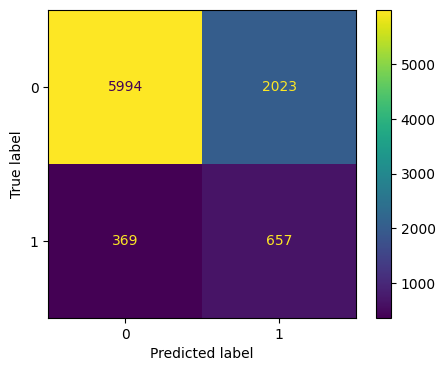

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are "0" and "1"
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_test = accuracy_score(y_test, y_pred)

# Provide classification_report
report_rf = metrics.classification_report(y_test, y_pred)
print(f"Accuracy: {(accuracy_test*100):.2f}%")
print(report_rf)

 An accuracy of 78% seem very good generally, but for imbalanced data, accuracy can be misleading. In this case, a high number of negative class samples (0's) dominate, so the model may perform well overall but not as well on the minority class (1's).
- Good performance on class 0: The model performs well on the majority class with high precision, recall, and F1-score.
- Low precision and recall for class 1 indicate the model is not effective at  predicting and distinguishing minority class samples.

### 3.2 Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 89.40%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8017
           1       0.55      0.35      0.43      1026

    accuracy                           0.89      9043
   macro avg       0.74      0.66      0.68      9043
weighted avg       0.88      0.89      0.88      9043



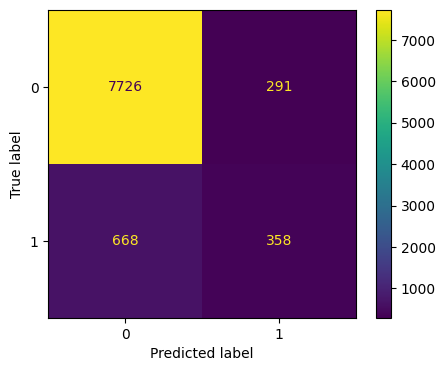

In [ ]:
# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=12)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_lr = lr_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_lr)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr*100:.2f}%")

# Provide classification report
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)


### 3.3 AdaBoost

AdaBoost Accuracy: 88.31%
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8017
           1       0.49      0.50      0.49      1026

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



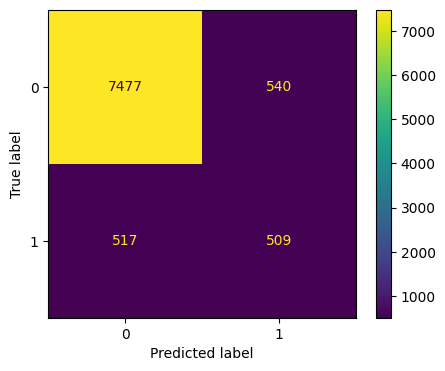

In [ ]:
# Train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=12)
ada_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_ada = ada_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_ada)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada*100:.2f}%")

# Provide classification report
report_ada = classification_report(y_test, y_pred_ada)
print(report_ada)


### 3.4 Gradient Boosting

Gradient Boosting Accuracy: 87.85%
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8017
           1       0.47      0.60      0.53      1026

    accuracy                           0.88      9043
   macro avg       0.71      0.76      0.73      9043
weighted avg       0.89      0.88      0.88      9043



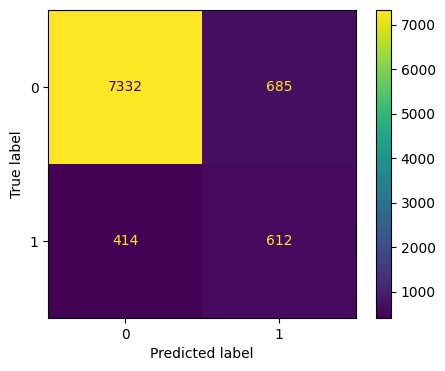

In [ ]:
# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=12)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_gb = gb_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_gb)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb*100:.2f}%")

# Provide classification report
report_gb = classification_report(y_test, y_pred_gb)
print(report_gb)


### 3.5 K-Nearest Neighbors (KNN)

KNN Accuracy: 77.60%
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      8017
           1       0.29      0.66      0.40      1026

    accuracy                           0.78      9043
   macro avg       0.62      0.72      0.63      9043
weighted avg       0.87      0.78      0.81      9043



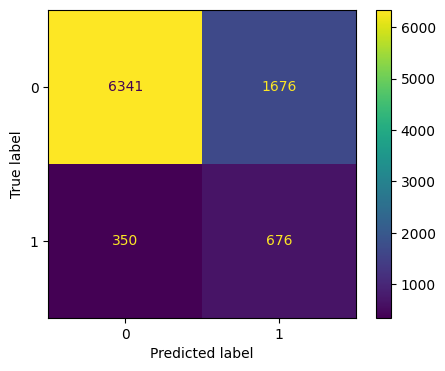

In [ ]:
# Train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_knn = knn_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_knn)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn*100:.2f}%")

# Provide classification report
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)


### 3.6 XGBoost

XGBoost Accuracy: 89.49%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8017
           1       0.55      0.42      0.48      1026

    accuracy                           0.89      9043
   macro avg       0.74      0.69      0.71      9043
weighted avg       0.88      0.89      0.89      9043



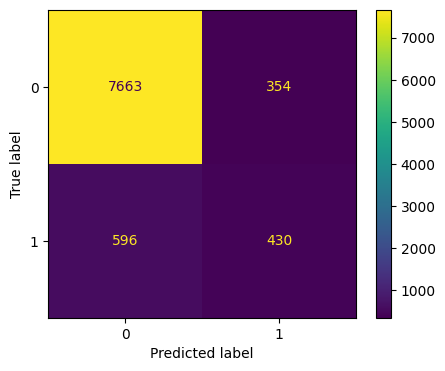

In [ ]:
# Train the XGBoost model
xgb_model = XGBClassifier(random_state=12)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_xgb = xgb_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_xgb)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb*100:.2f}%")

# Provide classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print(report_xgb)


### 3.7 Naive Bayes


Naive Bayes Accuracy: 68.89%
              precision    recall  f1-score   support

           0       0.95      0.68      0.80      8017
           1       0.23      0.74      0.35      1026

    accuracy                           0.69      9043
   macro avg       0.59      0.71      0.57      9043
weighted avg       0.87      0.69      0.74      9043



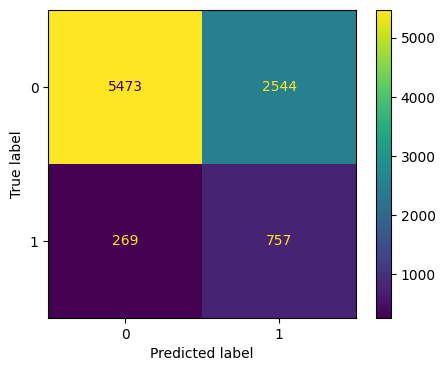

In [ ]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_nb = nb_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_nb)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb*100:.2f}%")

# Provide classification report
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)


### 3.8 Linear Discriminant Analysis

LDA Accuracy: 89.28%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8017
           1       0.57      0.23      0.33      1026

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



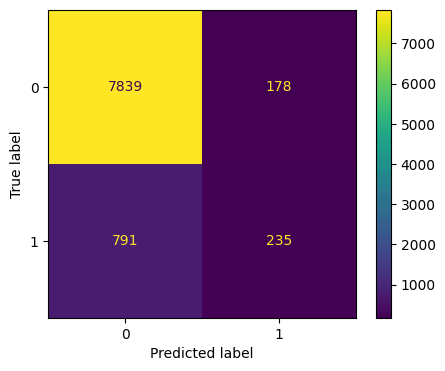

In [ ]:
# Train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test dataset
y_pred_lda = lda_model.predict(X_test)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred_lda)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot(ax=ax)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda*100:.2f}%")

# Provide classification report
report_lda = classification_report(y_test, y_pred_lda)
print(report_lda)


### Model Performance Evaluation

In [ ]:
# put all the report together from 3.1 - 3/8 (report_ada, report_lda,...
print("Random Forest Report:\n", report_rf)
print("Logistic Regression Report:\n", report_lr)
print("AdaBoost Report:\n", report_ada)
print("Gradient Boosting Report:\n", report_gb)
print("KNN Report:\n", report_knn)
print("XGBoost Report:\n", report_xgb)
print("Naive Bayes Report:\n", report_nb)
print("LDA Report:\n", report_lda)



Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83      8017
           1       0.25      0.64      0.35      1026

    accuracy                           0.74      9043
   macro avg       0.59      0.69      0.59      9043
weighted avg       0.86      0.74      0.78      9043

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8017
           1       0.55      0.35      0.43      1026

    accuracy                           0.89      9043
   macro avg       0.74      0.66      0.68      9043
weighted avg       0.88      0.89      0.88      9043

AdaBoost Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8017
           1       0.49      0.50      0.49      1026

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weig

#### 3* Evaluation Metrics Guild
In machine learning, evaluating model performance is crucial for understanding how well it predicts outcomes. Common evaluation metrics include:

- **Accuracy:** The ratio of correctly predicted instances to the total instances. However, it can be misleading for imbalanced datasets.
- **Precision:** The proportion of true positives among the predicted positives, important when minimizing false positives is critical.
- **Recall (Sensitivity):** The proportion of true positives among all actual positives, crucial when identifying all relevant instances (e.g., class 1) is a priority.
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure when both metrics are important.

**These metrics will be further explained for non-technical stakehoders at the end of session 4.2.1.**

#### Model Performance Summary

- **Best for Class 1 Recall:** Naive Bayes and Random Forest perform best in detecting class 1 (subscribed).
- **Best for Class 1 Precision:** XGBoost stands out with the highest precision for class 1, minimizing false positives.
- **Best for Class 0 Performance:** XGBoost, Gradient Boosting, Logistic Regression, and AdaBoost all show strong recall and precision for class 0 (not subscribed).

**Final Decision**

Given XGBoost's balanced performance across both classes, we will focus on further improving XGBoost, as it provides a strong trade-off between precision and recall for both class 0 and class 1.


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 4: Improve best model (XGBoost)


### 4.1 XGBoost overview

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting algorithms, building an ensemble of decision trees, where each tree corrects the errors of its predecessor. The model combines predictions from multiple trees to make a final prediction.

The processing involved:
- Start with an initial prediction, often the mean or median of the target variable.
- Tree Construction: Build a series of decision trees. Each tree attempts to correct the errors made by the previous trees.
0Gradient Descent: Use gradient descent to minimize the loss function. The gradients (errors) of the predictions are computed, and the model adjusts the weights to minimize these errors.
- Apply regularization techniques to avoid overfitting and improve generalization.



#### Tunning process
- Grid Search / Random Search: Use techniques like Grid Search or Random Search to find the optimal values for hyperparameters.
- Cross-Validation: Implement cross-validation to evaluate the performance of different parameter combinations and avoid overfitting.
- Feature Importance: Analyze feature importance scores to understand which features contribute the most to the predictions and refine feature selection accordingly.

### 4.2 Apply Stacking model on XGBoost

Stacked generalization is an advanced ensemble learning technique that combines multiple machine learning models to improve predictive performance. Stacking leverages a diverse set of models to harness their collective strengths.

**The Process**
1. Base Models: The first step in stacking is to train several different base models (also known as level-0 models) on the same dataset. These base models can be a mix of different algorithms (SVM, NN,...) . Each model may capture different aspects of the data due to its unique algorithmic characteristics.
2. Meta-Model: After training the base models, their predictions are used as input features for a second-level model, known as the meta-model (or level-1 model). The meta-model learns how to combine the base model predictions to make the final prediction. It effectively learns the best way to aggregate the outputs of the base models to improve overall performance.

Logistic Regression will be used as the meta model because:
- Simplicity and Efficiency: Logistic Regression is computationally efficient and easy to implement, making it a practical choice for combining predictions.
- Probabilistic Output: It provides probabilities, allowing the meta-model to effectively weigh base model predictions.
- Flexible Combination: Logistic Regression learns how to best combine base model predictions into a final decision.
- Overfitting Control: Regularization options in Logistic Regression help prevent overfitting by controlling model complexity.

#### 4.2.1 XGB (base) and Logistic Regression (meta)

In [ ]:
# Define base models
base_models = [
    ('xgb', XGBClassifier(n_estimators=100, eval_metric='logloss')),
    ('lr', LogisticRegression(max_iter=1000))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking model, which combine the based model as the input features into the meta model to leverage the strengths of them.
xgb_lg_stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Split data (using resampled data)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=12)

# Train the stacking model
xgb_lg_stacking_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_stack = xgb_lg_stacking_model.predict(X_test_resampled)
print("Stacking Model Report:\n", classification_report(y_test_resampled, y_pred_stack))


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2005
           1       0.95      0.92      0.93      2022

    accuracy                           0.93      4027
   macro avg       0.93      0.93      0.93      4027
weighted avg       0.93      0.93      0.93      4027



- The model perform very well on in-balance data

This image below shows the process of combining model to train data.

In [ ]:
# Ensure that the stacking model is fitted on the resampled training data
xgb_lg_stacking_model.fit(X_train_resampled, y_train_resampled)

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000))

Evaluate the model using the test set (no resampled data)

Stacking Model Test Set Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      8027
           1       0.53      0.44      0.48      1016

    accuracy                           0.89      9043
   macro avg       0.73      0.69      0.71      9043
weighted avg       0.89      0.89      0.89      9043



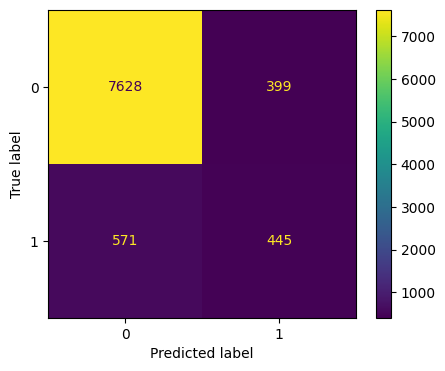

In [ ]:
# Make predictions on the test set
y_pred_test = xgb_lg_stacking_model.predict(X_test)

# Evaluate the model using the classification report
print("Stacking Model Test Set Report:\n", classification_report(y_test, y_pred_test))

# Display the confusion matrix using futureSample_y and y_pred_validate
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred_test)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

The stacking model, which combines XGBoost and Logistic Regression as base models with Logistic Regression as the meta-model, performed exceptionally well on the resampled test dataset, indicating that the model effectively captured patterns in the balanced data. However, when tested on the original, imbalanced test set, the model's performance declined, suggesting a challenge in generalizing to the non-resampled data. Particularly:

- **Class 0 (Not Subscribed):**
  - The model performs well for class 0, with a **precision of 0.93** and a **recall of 0.95**, resulting in a strong **F1-score of 0.94**. This indicates that the model is highly accurate in predicting customers who did not subscribe to the term deposit, with very few false positives and most true negatives correctly identified.

- **Class 1 (Subscribed):**
  - For class 1, the model's performance is weaker, with a **precision of 0.53** and a **recall of 0.44**, leading to an **F1-score of 0.48**. While it can identify some customers who subscribed, it struggles to catch all of them (lower recall), and many of the predicted subscriptions are incorrect (lower precision).


**Precision (0.53) for Class 1**
Precision refers to how many of the predicted "yes" (subscribed) customers were actually correct. A precision of 0.53 means that 53% of the customers predicted by the model to have subscribed actually did subscribe, while the remaining 47% were incorrectly classified (false positives).

  - **Implication**: The model is not highly reliable when it predicts that a customer will subscribe. Nearly half of these predictions are wrong, indicating that while it catches some true positives, a significant portion of its positive predictions are incorrect. For business decisions like targeting potential customers, this could mean wasted resources on individuals unlikely to subscribe.

- **Recall** (0.44) for Class 1:
Recall refers to how many of the actual "yes" (subscribed) customers were correctly identified by the model. A recall of 0.44 means that the model is correctly identifying only 44% of all customers who actually subscribed, missing 56% of them (false negatives).

  - **Implication**: The model is failing to capture over half of the customers who did subscribe. This is critical in a direct marketing scenario, where the goal is to identify as many potential subscribers as possible. The low recall suggests that many customers who would have subscribed are not being targeted correctly.

**In practical terms, if the bank relied on this model, it would miss a large number of potential subscribers (low recall), and some resources would be spent on false positives, customers predicted to subscribe but who don’t (moderate precision).**

  









#### 4.2.2 XGB and Naive Bayes (base)

In [ ]:
# Define base models
base_models = [
    ('xgb', XGBClassifier(n_estimators=100, eval_metric='logloss')),
    ('nb', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking model, which combine the based model as the input features into the meta model to leverage the strengths of them.
xgb_nb_lr_stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Split data (using resampled data)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=12)

# Train the stacking model
xgb_nb_lr_stacking_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_stack = xgb_nb_lr_stacking_model.predict(X_test_resampled)
print("Stacking Model Report:\n", classification_report(y_test_resampled, y_pred_stack))

Stacking Model Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4182
           1       0.95      0.94      0.94      4036

    accuracy                           0.94      8218
   macro avg       0.94      0.94      0.94      8218
weighted avg       0.94      0.94      0.94      8218



Stacking Model Test Set Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      8027
           1       0.51      0.46      0.48      1016

    accuracy                           0.89      9043
   macro avg       0.72      0.70      0.71      9043
weighted avg       0.89      0.89      0.89      9043



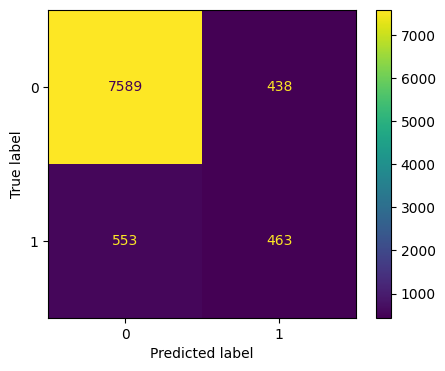

In [ ]:
# Make predictions on the test set
y_pred_test = xgb_nb_lr_stacking_model.predict(X_test)

# Evaluate the model using the classification report
print("Stacking Model Test Set Report:\n", classification_report(y_test, y_pred_test))

# Display the confusion matrix using futureSample_y and y_pred_validate
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred_test)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

Same result for this model: Perform well on balanced test set but not imbalanced.

### 4* Decision to Focus on Hyperparameter Tuning for XGBoost (recall for class 1)

After evaluating the predictions from the two stacking models in sections 4.2.1 and 4.2.2, I have decided to prioritize hyperparameter tuning for XGBoost first. The main objective is to achieve a balance between precision and recall for both classes. However, the ultimate aim remains to maximize the capture of **true positives**—identifying as many customers as possible who actually subscribe to the term deposit.

This focus on capturing true positives is especially important in the context of a direct marketing campaign. In particular, the aftermath of the 2008 Global Financial Crisis (GFC) left banks in a vulnerable position, where customer trust and liquidity were critical issues. In such a scenario, missing out on potential subscribers (false negatives) carries a higher cost than following up with non-subscribers (false positives).

Given that the cost of reaching out to customers (phone) is relatively low compared to the potential revenue generated by securing new term deposits, it is more beneficial to prioritize recall for class 1 (subscribed). By capturing as many potential subscribers as possible, the bank can mitigate the risk of losing valuable customers. While maintaining precision is still important, the priority in this case is to avoid missing customers who would have subscribed, even at the expense of a few false positive predictions.

Thus, the next step is to fine-tune the XGBoost model, focusing on optimizing its parameters to balance precision and recall, while leaning towards higher recall for class 1 to maximize the identification of true subscribers.


### 4.3 Hyperparameter Tuning (XGBoost)

Key Parameters to Optimize
- n_estimators: Number of boosting rounds or trees to build. Increasing this can improve performance but also increases the risk of overfitting.

- learning_rate (or eta): Step size shrinking to prevent overfitting. A lower learning rate usually requires more boosting rounds but can lead to better performance.

- max_depth: Maximum depth of each tree. Controls the complexity of the model. Larger values make the model more complex and prone to overfitting.

- min_child_weight: Minimum sum of instance weight (hessian) needed in a child. It helps control overfitting by specifying the minimum number of samples required to form a leaf node.

- subsample: Fraction of samples used to build each tree. A value less than 1.0 can prevent overfitting by introducing randomness.

- colsample_bytree: Fraction of features used to build each tree. Controls overfitting by sampling a subset of features.

- gamma: Minimum loss reduction required to make a further partition on a leaf node. It controls whether a given node will split.

- scale_pos_weight: Controls the balance of positive and negative weights. Useful for handling imbalanced classes.

- lambda (L2 regularization term): Regularization term on weights to avoid overfitting.

- alpha (L1 regularization term): Regularization term on weights for sparsity.

Grid Search was employed to optimize the performance of machine learning models. Grid Search systematically tests various combinations of hyperparameters, evaluating each set to find the optimal configuration. For each model, we defined a parameter grid, including values for hyperparameters such as learning rate, tree depth, and regularization terms. The models were then trained and validated on different subsets of the data, and their performance was assessed using metrics like precision, recall, and F1-score.

This iterative tuning process ensured that the models were fine-tuned to achieve the best balance between prediction accuracy and generalization.



To enhance recall for the minority class (Class 1) in the XGBoost model, we will focus on tuning parameters that increase the model's sensitivity to the minority class.

- scale_pos_weight: Increase this parameter to give more importance to Class 1, enhancing recall by focusing more on identifying Class 1 instances.

- max_depth and min_child_weight: Increase to allow deeper trees, capturing more details of Class 1.

- min_child_weight: Decrease to create more splits and capture more Class 1 instances.

Futhermore, we will also tune these parameters:
- gamma: Decrease the gamma value to allow the model to create more splits and capture additional Class 1 instances.

- alpha (L1 regularization) and lambda (L2 regularization): Use smaller values to reduce regularization, which can help the model learn more about Class 1 without excessive overfitting.


#### 4.3.1 Tune for recall

##### Recall Tune - model 1
Hyperparameter Tunning Process: 2 minutes

In [ ]:
# Define the simplified parameter grid, search through and find the optimal parameters for the target which is scoring='recall'.
param_grid = {
    'scale_pos_weight': [1, 10, 20, 50],  # Essential for class imbalance handling
    'max_depth': [3, 9],
    'min_child_weight': [1, 5, 10],
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(#use_label_encoder=False,
                            eval_metric='logloss')

# Initialize GridSearchCV with the simplified grid
grid_search_1 = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='recall',  # Optimize for recall to capture more Class 1
                           cv=2,              # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)         # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search_1.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best recall score
print("Best Parameters:", grid_search_1.best_params_)
print("Best Recall Score:", grid_search_1.best_score_)

# Get the best model from GridSearchCV
xgb_recall_model1 = grid_search_1.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_recall_model1.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:18:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 3, 'min_child_weight': 10, 'scale_pos_weight': 20}
Best Recall Score: 0.9462511614609392
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      7950
           1       0.24      0.98      0.39      1093

    accuracy                           0.63      9043
   macro avg       0.62      0.78      0.56      9043
weighted avg       0.90      0.63      0.69      9043



##### Recall Tune - model 2

Hyperparameter Tunning Process: 3 minutes
- Tune for class 1




In [118]:
# Define a custom scorer for recall score of class 1
recall_class1_scorer = make_scorer(recall_score, pos_label=1)

# Define the updated parameter grid for tuning
param_grid = {
    'scale_pos_weight': [40, 60],  # Adjust to balance recall and precision
    'max_depth': [3, 9],            # Try wider range of depths
    'min_child_weight': [1, 10],    # Range of child weights
    # Optionally: Add regularization parameters (if needed)
    'gamma': [0, 0.5],            # Add regularization to control complexity
    'lambda': [1, 5],                  # L2 regularization to control overfitting
    'alpha': [0, 0.5]                  # L1 regularization for feature selection
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search_2 = GridSearchCV(estimator=xgb_clf,
                             param_grid=param_grid,
                             scoring=recall_class1_scorer,  # Optimize recall score for class 1
                             cv=3,                     # Number of cross-validation folds
                             verbose=1,
                             n_jobs=-1)                # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best F1 score for class 1
print("Best Parameters:", grid_search_2.best_params_)
print("Best Recall Score for Class 1:", grid_search_2.best_score_)

# Get the best model from GridSearchCV
xgb_recall_model2 = grid_search_2.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_recall_model2.predict(X_test)

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:06:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'alpha': 0.5, 'gamma': 0.5, 'lambda': 5, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 60}
Best Recall Score for Class 1: 0.9651687809073318
              precision    recall  f1-score   support

           0       0.99      0.56      0.72      8024
           1       0.22      0.97      0.36      1019

    accuracy                           0.61      9043
   macro avg       0.61      0.77      0.54      9043
weighted avg       0.91      0.61      0.68      9043



#### 4.3.2 Tune for precision

##### Precision Tune - model 3
Hyperparameter Tunning Process: 2 minutes


In [ ]:
# Define the parameter grid, search through and find the optimal parameters for the target which is scoring='precision'.
param_grid = {
    'scale_pos_weight': [1, 10, 20],  # Increase to give more emphasis to Class 1
    #'gamma': [0, 0.2, 0.5],        # Lower values to make the model more flexible
    #'alpha': [0, 0.5, 1],          # Smaller values to reduce regularization
    #'lambda': [0, 0.5, 1],         # Smaller values to reduce regularization
    'max_depth': [3, 9, 12],          # Increase to allow deeper trees
    'min_child_weight': [1, 5, 10],  # Decrease to create more splits
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search3 = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='precision',  # Optimize for precision
                           cv=3,                 # Number of cross-validation folds; adjust as needed
                           verbose=1,
                           n_jobs=-1)            # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search3.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best precision score
print("Best Parameters:", grid_search3.best_params_)
print("Best Precision Score:", grid_search3.best_score_)

# Get the best model from GridSearchCV
xgb_precision_model3 = grid_search3.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_precision_model3.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 9, 'min_child_weight': 1, 'scale_pos_weight': 1}
Best Precision Score: 0.9486899532249455
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7940
           1       0.56      0.44      0.49      1103

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.88      0.89      0.88      9043



##### Precision Tune - model 4

- Hyperparameter Tunning Process: 2 minutes
- Define a custom scoring function that focuses solely on the precision of class 1.


In [ ]:
# Define a custom scorer for precision of class 1
precision_class1_scorer = make_scorer(precision_score, pos_label=1)

# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [1, 10, 20],  # Increase to give more emphasis to Class 1
    # 'gamma': [0, 0.2, 0.5],        # Lower values to make the model more flexible
    # 'alpha': [0, 0.5, 1],          # Smaller values to reduce regularization
    # 'lambda': [0, 0.5, 1],         # Smaller values to reduce regularization
    'max_depth': [3, 9, 12],          # Increase to allow deeper trees
    'min_child_weight': [1, 5, 10],  # Decrease to create more splits
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search3 = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring=precision_class1_scorer,  # Optimize precision for class 1
                           cv=4,                             # Number of cross-validation folds; adjust as needed
                           verbose=1,
                           n_jobs=-1)                        # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search3.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best precision score for class 1
print("Best Parameters:", grid_search3.best_params_)
print("Best Precision for Class 1:", grid_search3.best_score_)

# Get the best model from GridSearchCV
xgb_precision_model4 = grid_search3.best_estimator_

# Optionally, evaluate the best model on the test set
y_pred = xgb_precision_model4.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 4 folds for each of 27 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:03:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 9, 'min_child_weight': 1, 'scale_pos_weight': 1}
Best Precision for Class 1: 0.9508923611317247
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7940
           1       0.56      0.44      0.49      1103

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.88      0.89      0.88      9043



#### 4.3.3 Tune for F1

##### F1 Tune - model 5
Hyperparameter Tunning Process: 2 minutes

In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [20, 50],  # Essential for class imbalance handling
    'max_depth': [3, 9],
    'min_child_weight': [1, 5, 10],
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Initialize GridSearchCV with the simplified grid
grid_search_5 = GridSearchCV(estimator=xgb_clf,
                             param_grid=param_grid,
                             scoring=f1_scorer,  # Optimize for F1 score
                             cv=2,              # Number of cross-validation folds
                             verbose=1,
                             n_jobs=-1)         # Use all available CPU cores

# Fit GridSearchCV to the resampled training data
grid_search_5.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search_5.best_params_)
print("Best F1 Score:", grid_search_5.best_score_)

# Get the best model from GridSearchCV
xgb_f1_model5 = grid_search_5.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_f1_model5.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:04:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 9, 'min_child_weight': 1, 'scale_pos_weight': 20}
Best F1 Score: 0.9327465474027168
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7940
           1       0.49      0.66      0.56      1103

    accuracy                           0.87      9043
   macro avg       0.72      0.78      0.74      9043
weighted avg       0.89      0.87      0.88      9043



##### F1 Tune 6 - model 6
Hyperparameter Tunning Process: 2 minutes


In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [10, 20, 50],  # Essential for class imbalance handling
    'max_depth': [3, 9],
    'min_child_weight': [1, 5, 10],
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(eval_metric='logloss')

# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Initialize GridSearchCV with the simplified grid
grid_search_6 = GridSearchCV(estimator=xgb_clf,
                              param_grid=param_grid,
                              scoring=f1_scorer,  # Optimize for F1 score
                              cv=3,               # Number of cross-validation folds
                              verbose=1,
                              n_jobs=-1)          # Use all available CPU cores

# Fit GridSearchCV to the resampled training data
grid_search_6.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search_6.best_params_)
print("Best F1 Score:", grid_search_6.best_score_)

# Get the best model from GridSearchCV
xgb_f1_model6 = grid_search_6.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_f1_model6.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 9, 'min_child_weight': 1, 'scale_pos_weight': 20}
Best F1 Score: 0.9331041223690436
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7940
           1       0.49      0.66      0.56      1103

    accuracy                           0.87      9043
   macro avg       0.72      0.78      0.74      9043
weighted avg       0.89      0.87      0.88      9043



### 4.4 Feature Importance and Engineering (for xgb_f1_model6)

#### 4.4.1 Identify and filter less important feature (<1%)

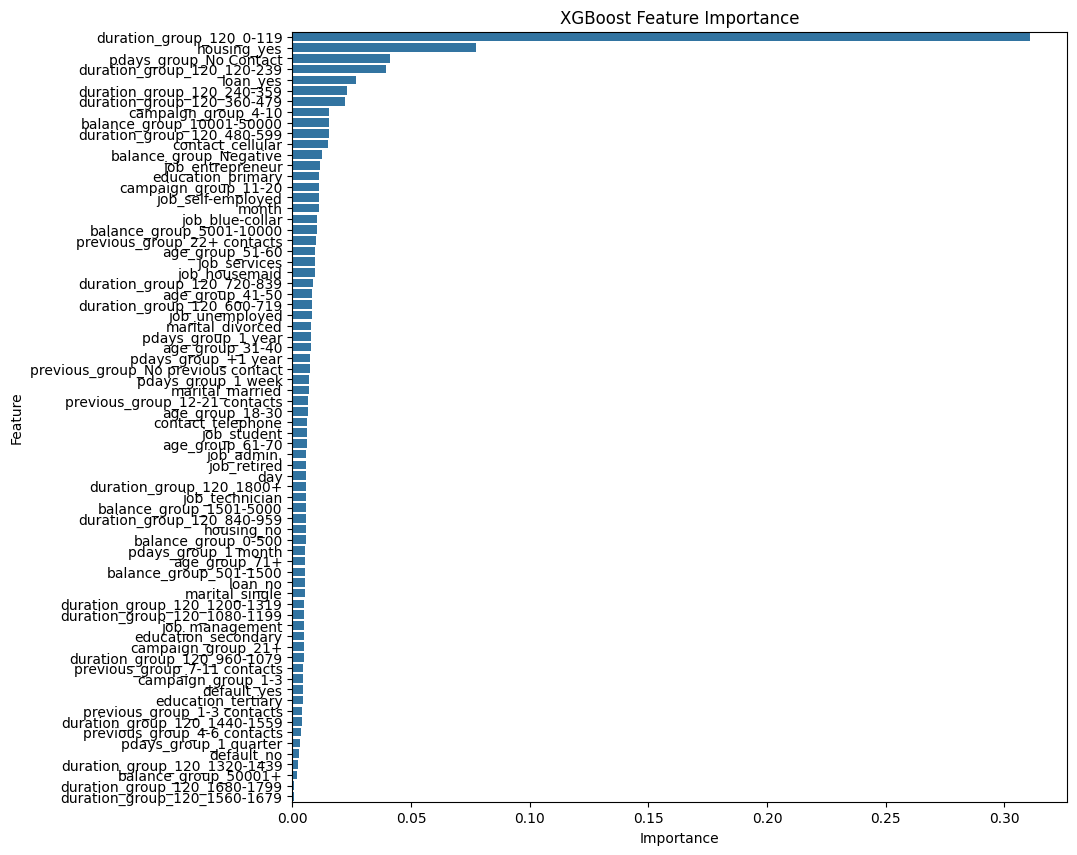

In [ ]:
# Get feature importances
importances = xgb_f1_model6.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()


Set a Threshold Determine a threshold for feature importance. Features with importance below this threshold will be excluded.


In [ ]:
# Define the importance threshold
importance_threshold = 0.01

# Filter features based on importance
important_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature']
print("Selected Features:")
print(important_features)

Selected Features:
40      duration_group_120_0-119
22                   housing_yes
60        pdays_group_No Contact
41    duration_group_120_120-239
24                      loan_yes
42    duration_group_120_240-359
43    duration_group_120_360-479
57           campaign_group_4-10
38     balance_group_10001-50000
44    duration_group_120_480-599
25              contact_cellular
33        balance_group_Negative
4               job_entrepreneur
16             education_primary
58          campaign_group_11-20
8              job_self-employed
1                          month
3                job_blue-collar
37      balance_group_5001-10000
Name: Feature, dtype: object


#### 4.4.2 Model 7- Train the model with the important_features (Default parameter)

In [ ]:
# Update the dataset with the selected features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the model with the reduced feature set
xgb_reduced_model7 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_reduced_model7.fit(X_train_reduced, y_train)

# Evaluate the model
y_pred_reduced = xgb_reduced_model7.predict(X_test_reduced)
print(classification_report(y_test, y_pred_reduced))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report with Reduced Features:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7940
           1       0.60      0.38      0.47      1103

    accuracy                           0.89      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.89      0.88      9043



Moderate precision but low recall.

#### 4.4.3 Model 8 - Apply best parameter on f1 on the new model
Hyperparameter Tunning Process: 2 minutes

In [ ]:
# Update the dataset with the selected features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the model with the reduced feature set
xgb_reduced_model8 = xgb.XGBClassifier(max_depth = 9, min_child_weight = 1, scale_pos_weight = 20, eval_metric='logloss')
xgb_reduced_model8.fit(X_train_reduced, y_train)

# Evaluate the model
y_pred_reduced = xgb_reduced_model8.predict(X_test_reduced)
print(classification_report(y_test, y_pred_reduced))

Classification Report with Reduced Features:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7940
           1       0.32      0.83      0.46      1103

    accuracy                           0.77      9043
   macro avg       0.65      0.79      0.66      9043
weighted avg       0.89      0.77      0.80      9043



The report show high recall but low precision on class 1. Hyperparameter Tunning will be performed again.

#### 4.4.4 Hyperparameter tune on the reduced feature dataset


##### Tune 1 - model 9
Hyperparameter Tunning Process: 2 minutes


In [ ]:
# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [10, 20, 30],    # Tune emphasis on Class 1
    'max_depth': [3, 9, 15],              # Control tree depth
    'min_child_weight': [1],      # Control minimum number of samples per leaf
    'gamma': [0, 0.5],                # Penalize complexity, 0.5 for more conservative splits
    'alpha': [0, 0.5],                # L1 regularization
    'reg_lambda': [0, 0.5]            # L2 regularization (use reg_lambda instead of lambda)
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search9 = GridSearchCV(estimator=xgb_clf,
                            param_grid=param_grid,
                            scoring=f1_scorer,   # Optimize for F1 score
                            cv=3,                # 3-fold cross-validation
                            verbose=1,
                            n_jobs=-1)           # Use all available CPU cores

# Fit GridSearchCV to the reduced training data
grid_search9.fit(X_train_reduced, y_train)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search9.best_params_)
print("Best F1 Score:", grid_search9.best_score_)

# Get the best model from GridSearchCV
xgb_f1_model9 = grid_search9.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_f1_model9.predict(X_test_reduced)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:15:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'alpha': 0.5, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'reg_lambda': 0, 'scale_pos_weight': 10}
Best F1 Score: 0.5069972932823245
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7940
           1       0.39      0.87      0.54      1103

    accuracy                           0.82      9043
   macro avg       0.69      0.84      0.72      9043
weighted avg       0.91      0.82      0.85      9043



The precision for class 1 is low (0.39), but it has a high recall (0.87) for class 1. This suggests the model is better at identifying potential subscribers but struggles with accuracy.



##### Tune 2 - model 10
Hyperparameter Tunning Process: 2 minutes


In [ ]:
# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [3, 5, 10],    # Tune emphasis on Class 1
    'max_depth': [3, 9, 15],              # Control tree depth
    'min_child_weight': [1],      # Control minimum number of samples per leaf
    'gamma': [0.5, 1],                # Penalize complexity, 0.5 for more conservative splits
    'alpha': [0.5, 1],                # L1 regularization
    'reg_lambda': [0]            # L2 regularization (use reg_lambda instead of lambda)
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search10 = GridSearchCV(estimator=xgb_clf,
                            param_grid=param_grid,
                            scoring=f1_scorer,   # Optimize for F1 score
                            cv=3,                # 3-fold cross-validation
                            verbose=1,
                            n_jobs=-1)           # Use all available CPU cores

# Fit GridSearchCV to the reduced training data
grid_search10.fit(X_train_reduced, y_train)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search10.best_params_)
print("Best F1 Score:", grid_search10.best_score_)

# Get the best model from GridSearchCV
xgb_f1_model10 = grid_search10.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_f1_model10.predict(X_test_reduced)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:21:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'alpha': 0.5, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'reg_lambda': 0, 'scale_pos_weight': 3}
Best F1 Score: 0.5667324872726579
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7940
           1       0.51      0.73      0.60      1103

    accuracy                           0.88      9043
   macro avg       0.74      0.82      0.77      9043
weighted avg       0.91      0.88      0.89      9043



The tuning has significantly improved the performance for class 0, but it has resulted in a trade-off for class 1. While there's a noticeable increase in precision for class 1, it comes at the cost of a small decrease in recall.

##### Tune 3 - model 11
Hyperparameter Tunning Process: 2 minutes

In [ ]:
# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Define the parameter grid for tuning
param_grid = {
    'scale_pos_weight': [1, 3],    # Tune emphasis on Class 1
    'max_depth': [2, 3],              # Control tree depth
    'min_child_weight': [1],      # Control minimum number of samples per leaf
    'gamma': [0.5],                # Penalize complexity, 0.5 for more conservative splits
    'alpha': [0.5],                # L1 regularization
    'reg_lambda': [0]            # L2 regularization (use reg_lambda instead of lambda)
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with XGBClassifier and parameter grid
grid_search11 = GridSearchCV(estimator=xgb_clf,
                            param_grid=param_grid,
                            scoring=f1_scorer,   # Optimize for F1 score
                            cv=5,                # 5-fold cross-validation
                            verbose=1,
                            n_jobs=-1)           # Use all available CPU cores

# Fit GridSearchCV to the reduced training data
grid_search11.fit(X_train_reduced, y_train)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search11.best_params_)
print("Best F1 Score:", grid_search11.best_score_)

# Get the best model from GridSearchCV
xgb_f1_model11 = grid_search11.best_estimator_

# Evaluate the best model on the test set
y_pred = xgb_f1_model11.predict(X_test_reduced)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'alpha': 0.5, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'reg_lambda': 0, 'scale_pos_weight': 3}
Best F1 Score: 0.5670418623029382
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7940
           1       0.51      0.73      0.60      1103

    accuracy                           0.88      9043
   macro avg       0.74      0.82      0.77      9043
weighted avg       0.91      0.88      0.89      9043



These parameters probaly represent the optimal point for this model, as the performance on class 1 does not improve but class 0's performance decrease.

##### Apply xgb_clf_model9 on unseen dataset

Accuracy: 0.88

Best XGBoost Model Validating Dataset Report

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3989
           1       0.48      0.70      0.57       532

    accuracy                           0.88      4521
   macro avg       0.72      0.80      0.75      4521
weighted avg       0.90      0.88      0.89      4521



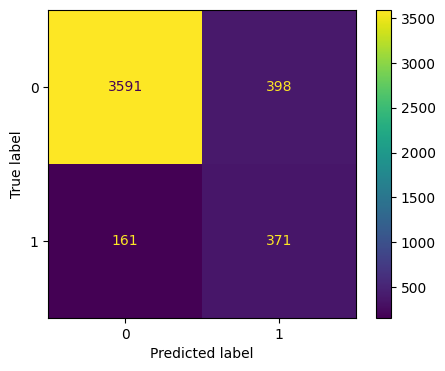

In [ ]:
# Apply xgb_clf_model9 on unseen dataset
# Predict the class labels for the futureSample dataset
y_pred_validate = xgb_f1_model11.predict(futureSample_X[important_features])

# Display the confusion matrix using futureSample_y and y_pred_validate
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(futureSample_y, y_pred_validate)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

# Evaluate the classifier's performance
valid_accuracy = accuracy_score(futureSample_y, y_pred_validate)
print(f"Accuracy: {valid_accuracy:.2f}\n")

valid_report = metrics.classification_report(futureSample_y, y_pred_validate)
print(valid_report)

The XGBoost model demonstrates consistent performance across both the test and validation datasets, achieving an accuracy of 0.88. This suggests the model generalizes well and is not overfitting to the training data. However, the performance for class 1 remains a point for potential improvement, as indicated by the lower precision on both datasets.

### 4.5 Train on imbalance dataset

To address potential limitations from consistently tuning hyperparameters on balanced, resampled datasets, I have decided to conduct an experiment with the original, imbalanced dataset.

- While our previous approach, using SMOTE to resample and balance the dataset, was effective in improving the model's performance during development and testing, it may have inadvertently biased the model towards synthetically generated samples. This could potentially hinder its performance on real-world, imbalanced data.
- It's important to note that although the balanced test set performed very well, this scenario is not reflective of real-life data distributions, where imbalances between classes are common. In practice, we may not always have the ability to perform resampling techniques like SMOTE on live datasets.
- This section explores the outcomes of training different models on the raw, imbalanced dataset to evaluate their generalization abilities. By doing so, we aim to identify whether training on imbalanced data improves real-world performance and explore if the model still requires additional strategies like SMOTE to handle class imbalances effectively.

#### 4.5.1 Tranining and Evaluating Model (Imbalance dataset)

In [ ]:
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=12),
    'Logistic Regression': LogisticRegression(random_state=12, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=12),
    'Gradient Boosting': GradientBoostingClassifier(random_state=12),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=12),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Dictionary to store classification reports for each model
classification_reports = {}

# Loop over each model, train, predict, and store results
for model_name, model in models.items():
    print(f"{model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict the class labels for the test dataset
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

    # Get classification report and store it
    report = classification_report(y_test, y_pred)
    classification_reports[model_name] = report
    print(f"Classification Report for {model_name}:\n", report)



Random Forest...
Random Forest Accuracy: 88.99%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      8005
           1       0.53      0.31      0.39      1038

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043

Logistic Regression...
Logistic Regression Accuracy: 89.36%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8005
           1       0.58      0.28      0.37      1038

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.88      9043

AdaBoost...
AdaBoost Accuracy: 89.35%
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0      

**Performance Summary**

**Best Performing Model**
XGBoost achieved the highest overall accuracy (90.08%) and provided the best balance between precision (0.59) and recall (0.44) for class 1 (subscribed).
Its F1-score of 0.50 for class 1 is the highest among all models, making it the most effective model for identifying customers likely to subscribe.
XGBoost is effective in capturing true positives (subscribers) while maintaining decent precision, reducing false positives.
- Naive Bayes has a better recall (0.55) for class 1, but its precision (0.43) and overall accuracy (86.32%) are lower, leading to a high number of false positives.

**Strong Class 0 Performance**
Almost all models perform well for class 0 (not subscribed), with precision and recall consistently above 0.90.
Models such as Random Forest, Gradient Boosting, and XGBoost show excellent performance in predicting class 0.

In contrast, KNN, Gradient Boosting, and Naive Bayes underperform in identifying subscribers, making them less effective for this specific task.





#### 4.5.2 XGBoost and Naive Bayes

**Next step**

We will implement a stacking model that combines XGBoost and Naive Bayes to take advantage of the complementary strengths of both algorithms. XGBoost excels at precision and recall for class 0, while Naive Bayes demonstrates better recall for class 1. By combining these models, we aim to enhance the overall performance by improving the detection of true positives (subscribers) without sacrificing precision. This approach is designed to strike a more effective balance between minimizing false positives and maximizing the capture of potential subscribers, ensuring that the model is both accurate and efficient in targeting the right customers.

In [ ]:
# Define base models
base_models = [
    ('xgb', XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=3)),  # Adjust as needed
    ('nb', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Create the stacking model and train the model on imbalance dataset
xgb_nb_lr_stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
xgb_nb_lr_stacking_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_stack = xgb_nb_lr_stacking_model.predict(X_test)
print("Stacking Model Report:\n", classification_report(y_test, y_pred_stack))


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      8005
           1       0.45      0.82      0.59      1038

    accuracy                           0.87      9043
   macro avg       0.71      0.85      0.75      9043
weighted avg       0.91      0.87      0.88      9043



The stacking model combining XGBoost, Naive Bayes, and Logistic Regression shows a promising balance between precision and recall,
particularly for the minority class (class 1 - subscribers), when trained on the imbalanced dataset.

**Class 0 (Not Subscribed):**
- The model achieves an impressive precision of **0.97** and a recall of **0.87**, meaning it is highly accurate at predicting customers
  who will not subscribe. However, it sacrifices some recall for this class, missing 13% of potential "no" predictions.

**Class 1 (Subscribed):**
- The model's performance for class 1 is particularly noteworthy, achieving a recall of **0.82**, meaning it captures a significant
  portion of customers who actually subscribed. This recall is higher compared to previous models, indicating better detection of true positives.
- However, precision for class 1 is lower at **0.45**, meaning 55% of customers predicted to subscribe did not actually subscribe (false positives).
  This is a common trade-off in imbalanced datasets, where improving recall often comes at the cost of precision.

**Overall**
- The model achieves an overall accuracy of **87%**, which is reasonable given the challenges of imbalanced data.
- The stacking model effectively leverages the strengths of both XGBoost and Naive Bayes. XGBoost ensures high precision for class 0,
  while Naive Bayes boosts recall for class 1, resulting in better identification of true positives in the minority class.

##### 4.5.2.1 Define base, meta and stacking model
These model are used tune from model 12 to model 23

In [123]:
# Define base models
base_models = [
    ('xgb', XGBClassifier(eval_metric='logloss')),  # Note: parameters will be tuned
    ('nb', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

##### F1 Tune 1 model 12

Hyperparameter Tunning Process: 9 minutes

In [ ]:
# Define the parameter grids
param_grid = {
    'xgb__n_estimators': [50, 200],
    'xgb__max_depth': [3,  7],
    'xgb__learning_rate': [0.01, 0.2],
    'final_estimator__C': [0.1, 10],  # Regularization strength for Logistic Regression
    'final_estimator__class_weight': [None, 'balanced'] # Changed 'meta_model__' to 'final_estimator__'

}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search12 = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1,n_jobs=-1)

# Train the GridSearchCV
grid_search12.fit(X_train, y_train)

# Get the best model and parameters
best_model12 = grid_search12.best_estimator_
best_params12 = grid_search12.best_params_

# Print the best parameters
print("Best Parameters:\n", best_params12)

# Evaluate the best model on the test set
y_pred_best = best_model12.predict(X_test)
print("Best Stacking Model Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters:
 {'final_estimator__C': 10, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Best Stacking Model Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8005
           1       0.48      0.77      0.60      1038

    accuracy                           0.88      9043
   macro avg       0.73      0.83      0.76      9043
weighted avg       0.91      0.88      0.89      9043



##### F1 Tune 2 - model 13

Hyperparameter Tunning Process: 9 minutes

In [ ]:
# Tuning 13
param_grid_13 = {
    'xgb__n_estimators': [100, 150, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.1, 0.2],
    'final_estimator__C': [0.05, 0.1],
    'final_estimator__class_weight': ['balanced']
}

# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_13 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_13, scoring='f1', cv=3)

# Train the GridSearchCV
grid_search_13.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 13:\n", grid_search_13.best_params_)
print("Best F1 Score for Tuning 13:\n", grid_search_13.best_score_)

# Evaluate the best model from Tuning 13 on the test set
best_model_13 = grid_search_13.best_estimator_
y_pred_best_13 = best_model_13.predict(X_test)
print("Best Stacking Model Report for Tuning 13:\n", classification_report(y_test, y_pred_best_13))


Best Parameters for Tuning 13:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}
Best F1 Score for Tuning 13:
 0.5997135034086478
Best Stacking Model Report for Tuning 13:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8027
           1       0.48      0.78      0.60      1016

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.76      9043
weighted avg       0.92      0.88      0.89      9043



##### F1 Tune 3 - model 14

Hyperparameter Tunning Process: 7 minutes

In [ ]:
# Tuning 14
param_grid_14 = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [2, 4],
    'xgb__learning_rate': [0.05, 0.1],
    'final_estimator__C': [0.1, 0.2],
    'final_estimator__class_weight': ['balanced', None]
}

# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_14 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_14, scoring='f1', cv=3)

# Train the GridSearchCV
grid_search_14.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 14:\n", grid_search_14.best_params_)
print("Best F1 Score for Tuning 14:\n", grid_search_14.best_score_)

# Evaluate the best model on the test set
best_model_14 = grid_search_14.best_estimator_
y_pred_best_14 = best_model_14.predict(X_test)
print("Best Stacking Model Report for Tuning 14:\n", classification_report(y_test, y_pred_best_14))


Best Parameters for Tuning 14:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 200}
Best F1 Score for Tuning 14:
 0.5918963311568187
Best Stacking Model Report for Tuning 14:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8027
           1       0.46      0.77      0.58      1016

    accuracy                           0.87      9043
   macro avg       0.72      0.83      0.75      9043
weighted avg       0.91      0.87      0.89      9043



##### F1 Tune 4 - model 15

Hyperparameter Tunning Process: 8 minutes

In [ ]:
# Tuning 15
param_grid_15 = {
    'xgb__n_estimators': [150, 250],
    'xgb__max_depth': [3, 6],
    'xgb__learning_rate': [0.05, 0.15],
    'final_estimator__C': [0.05, 0.1],
    'final_estimator__class_weight': ['balanced']
}

# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_15 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_15, scoring='f1', cv=3)

# Train the GridSearchCV
grid_search_15.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 15:\n", grid_search_15.best_params_)
print("Best F1 Score for Tuning 15:\n", grid_search_15.best_score_)

# Evaluate the best model on the test set
best_model_15 = grid_search_15.best_estimator_
y_pred_best_15 = best_model_15.predict(X_test)
print("Best Stacking Model Report for Tuning 15:\n", classification_report(y_test, y_pred_best_15))


Best Parameters for Tuning 15:
 {'final_estimator__C': 0.05, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.15, 'xgb__max_depth': 6, 'xgb__n_estimators': 150}
Best F1 Score for Tuning 15:
 0.6004978720184561
Best Stacking Model Report for Tuning 15:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8027
           1       0.49      0.80      0.60      1016

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.77      9043
weighted avg       0.92      0.88      0.89      9043



##### F1 Tune 5 - model 16

Hyperparameter Tunning Process: 9 minutes

In [ ]:
# Tuning 16
param_grid_16 = {
    'xgb__n_estimators': [120, 180],
    'xgb__max_depth': [3, 4],
    'xgb__learning_rate': [0.1, 0.3],
    'final_estimator__C': [0.1, 0.15],
    'final_estimator__class_weight': ['balanced']
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_16 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_16, scoring='f1', cv=3)

# Train the GridSearchCV
grid_search_16.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 16:\n", grid_search_16.best_params_)
print("Best F1 Score for Tuning 16:\n", grid_search_16.best_score_)

# Evaluate the best model on the test set
best_model_16 = grid_search_16.best_estimator_
y_pred_best_16 = best_model_16.predict(X_test)
print("Best Stacking Model Report for Tuning 16:\n", classification_report(y_test, y_pred_best_16))


Best Parameters for Tuning 16:
 {'final_estimator__C': 0.15, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__n_estimators': 120}
Best F1 Score for Tuning 16:
 0.6005399888264663
Best Stacking Model Report for Tuning 16:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8027
           1       0.48      0.79      0.60      1016

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.76      9043
weighted avg       0.92      0.88      0.89      9043



##### Recall Tune 1 - model 17
Hyperparameter Tunning Process: 9 minutes

In [ ]:
# Tuning 17
param_grid_17 = {
    'xgb__n_estimators': [120, 180],
    'xgb__max_depth': [3, 4],
    'xgb__learning_rate': [0.1, 0.3],
    'final_estimator__C': [0.1, 0.15],
    'final_estimator__class_weight': ['balanced']
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_17 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_17, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_17.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 17:\n", grid_search_17.best_params_)
print("Best Recall Score for Tuning 17:\n", grid_search_17.best_score_)

# Evaluate the best model on the test set
best_model_17 = grid_search_17.best_estimator_
y_pred_best_17 = best_model_17.predict(X_test)
print("Best Stacking Model Report for Tuning 17:\n", classification_report(y_test, y_pred_best_17))


Best Parameters for Tuning 17:
 {'final_estimator__C': 0.15, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__n_estimators': 120}
Best Recall Score for Tuning 17:
 0.776145773243346
Best Stacking Model Report for Tuning 17:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8005
           1       0.49      0.78      0.60      1038

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.76      9043
weighted avg       0.91      0.88      0.89      9043



##### Recall Tune 2 - model 18
Hyperparameter Tunning Process: 9 minutes

In [ ]:
# Tuning 18
param_grid_18 = {
    'xgb__n_estimators': [150, 200],  # Slightly increase n_estimators
    'xgb__max_depth': [3, 5],  # Test deeper trees
    'xgb__learning_rate': [0.1, 0.2],  # Focus on smaller learning rates
    'xgb__min_child_weight': [1, 3],  # Add min_child_weight to control complexity
    'final_estimator__C': [0.1, 0.2],  # Adjust regularization strength
    'final_estimator__class_weight': ['balanced']
}

# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_18 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_18, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_18.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 18:\n", grid_search_18.best_params_)
print("Best Recall Score for Tuning 18:\n", grid_search_18.best_score_)

# Evaluate the best model on the test set
best_model_18 = grid_search_18.best_estimator_
y_pred_best_18 = best_model_18.predict(X_test)
print("Best Stacking Model Report for Tuning 18:\n", classification_report(y_test, y_pred_best_18))


Best Parameters for Tuning 18:
 {'final_estimator__C': 0.2, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 200}
Best Recall Score for Tuning 18:
 0.7809693555076703
Best Stacking Model Report for Tuning 18:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8005
           1       0.48      0.79      0.60      1038

    accuracy                           0.88      9043
   macro avg       0.72      0.84      0.76      9043
weighted avg       0.91      0.88      0.89      9043



##### Recall Tune 3 - model 19
Hyperparameter Tunning Process: 30 minutes

In [ ]:
# Tuning 19
param_grid_19 = {
    'xgb__n_estimators': [150, 200],  # Keep higher n_estimators for better recall
    'xgb__max_depth': [4, 5],  # Test slightly deeper trees
    'xgb__learning_rate': [0.05, 0.1],  # Decrease learning rate to avoid overshooting
    'xgb__min_child_weight': [1, 3],  # Same as before
    'xgb__subsample': [0.8, 1.0],  # Add subsample to improve diversity
    'xgb__colsample_bytree': [0.8, 1.0],  # Try different column subsampling rates
    'final_estimator__C': [0.05, 0.1],  # Reduce regularization to increase flexibility
    'final_estimator__class_weight': ['balanced']
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_19 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_19, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_19.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 19:\n", grid_search_19.best_params_)
print("Best Recall Score for Tuning 19:\n", grid_search_19.best_score_)

# Evaluate the best model on the test set
best_model_19 = grid_search_19.best_estimator_
y_pred_best_19 = best_model_19.predict(X_test)
print("Best Stacking Model Report for Tuning 19:\n", classification_report(y_test, y_pred_best_19))


Best Parameters for Tuning 19:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
Best Recall Score for Tuning 19:
 0.7785586422228143
Best Stacking Model Report for Tuning 19:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8005
           1       0.48      0.78      0.60      1038

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.76      9043
weighted avg       0.91      0.88      0.89      9043



##### Recall Tune 4 - model 20
Hyperparameter Tunning Process: 40 minutes

In [ ]:
# Tuning 20
param_grid_20 = {
    'xgb__n_estimators': [200, 250],  # Further increase n_estimators
    'xgb__max_depth': [4, 6],  # Increase depth for more complexity
    'xgb__learning_rate': [0.05, 0.1],  # Maintain a smaller learning rate
    'xgb__min_child_weight': [1, 2],  # Tighten control to avoid overfitting
    'xgb__subsample': [0.9, 1.0],  # Slightly narrow subsample range
    'xgb__colsample_bytree': [0.9, 1.0],  # Similar subsampling strategy
    'xgb__scale_pos_weight': [3, 5],  # Fine-tune weight for class imbalance
    'final_estimator__C': [0.05, 0.1],  # Keep lower regularization for flexibility
    'final_estimator__class_weight': ['balanced']
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_20 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_20, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_20.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 20:\n", grid_search_20.best_params_)
print("Best Recall Score for Tuning 20:\n", grid_search_20.best_score_)

# Evaluate the best model on the test set
best_model_20 = grid_search_20.best_estimator_
y_pred_best_20 = best_model_20.predict(X_test)
print("Best Stacking Model Report for Tuning 20:\n", classification_report(y_test, y_pred_best_20))


Best Parameters for Tuning 20:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 6, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 250, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 0.9}
Best Recall Score for Tuning 20:
 0.8608598289758124
Best Stacking Model Report for Tuning 20:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8005
           1       0.42      0.85      0.57      1038

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043



##### Recall Tune 5 - model 21
Hyperparameter Tunning Process: 26 minutes

In [ ]:
# Tuning 21
param_grid_21 = {
    'xgb__n_estimators': [150, 180],  # Keep fewer options for n_estimators
    'xgb__max_depth': [3, 4],  # Explore smaller depth for trees
    'xgb__learning_rate': [0.05, 0.1],  # Stick with a small learning rate
    'xgb__min_child_weight': [1, 2],  # Keep minimal options to control complexity
    'xgb__scale_pos_weight': [2, 3],  # Fine-tune to handle class imbalance
    'final_estimator__C': [0.1, 0.15],  # Keep range small for Logistic Regression
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_21 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_21, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_21.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 21:\n", grid_search_21.best_params_)
print("Best Recall Score for Tuning 21:\n", grid_search_21.best_score_)

# Evaluate the best model on the test set
best_model_21 = grid_search_21.best_estimator_
y_pred_best_21 = best_model_21.predict(X_test)
print("Best Stacking Model Report for Tuning 21:\n", classification_report(y_test, y_pred_best_21))


Best Parameters for Tuning 21:
 {'final_estimator__C': 0.15, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 180, 'xgb__scale_pos_weight': 3}
Best Recall Score for Tuning 21:
 0.41648537889472953
Best Stacking Model Report for Tuning 21:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8014
           1       0.59      0.42      0.49      1029

    accuracy                           0.90      9043
   macro avg       0.76      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



##### Recall Tune 6 - model 22
Hyperparameter Tunning Process: 6 minutes

In [ ]:
# Tuning 22: Extreme Case for High Recall
param_grid_22 = {
    'xgb__n_estimators': [180, 250],  # More iterations for better learning
    'xgb__max_depth': [5, 6],  # Deeper trees for more complex interactions
    'xgb__learning_rate': [0.05],  # Lower learning rate to stabilize training
    'xgb__min_child_weight': [1],  # Lower value to capture more patterns
    'xgb__scale_pos_weight': [5, 7],  # Extreme focus on class 1 (subscribed)
    'final_estimator__C': [0.1, 0.15],  # Regularize final estimator
    'final_estimator__class_weight': ['balanced'],  # Balanced for class imbalance
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_22 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_22, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_22.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 22:\n", grid_search_22.best_params_)
print("Best Recall Score for Tuning 22:\n", grid_search_22.best_score_)

# Evaluate the best model on the test set
best_model_22 = grid_search_22.best_estimator_
y_pred_best_22 = best_model_22.predict(X_test)
print("Best Stacking Model Report for Tuning 22:\n", classification_report(y_test, y_pred_best_22))


Best Parameters for Tuning 22:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 250, 'xgb__scale_pos_weight': 7}
Best Recall Score for Tuning 22:
 0.8702724421116925
Best Stacking Model Report for Tuning 22:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8014
           1       0.41      0.89      0.56      1029

    accuracy                           0.84      9043
   macro avg       0.70      0.86      0.73      9043
weighted avg       0.92      0.84      0.86      9043



##### Recall Tune 7 - model 23
Hyperparameter Tunning Process: 20 minutes

In [ ]:
# Tuning 23: Balanced Boost for Recall and Accuracy
param_grid_23 = {
    'xgb__n_estimators': [150, 200],  # Slightly fewer iterations for faster convergence
    'xgb__max_depth': [4, 5],  # Slightly smaller trees for a balance between complexity and speed
    'xgb__learning_rate': [0.05, 0.1],  # Balanced learning rates
    'xgb__min_child_weight': [1],  # Lower value to capture more detailed patterns
    'xgb__scale_pos_weight': [3, 5],  # Balanced weighting for recall
    'xgb__colsample_bytree': [0.8, 1.0],  # Adding diversity to the trees
    'xgb__subsample': [0.8, 1.0],  # Subsampling to reduce overfitting
    'final_estimator__C': [0.1],  # Fixed regularization strength
    'final_estimator__class_weight': ['balanced'],  # Class weighting for imbalance
}
# These models are set up in sessison # 4.5.2.1
# Set up GridSearchCV with the stacking model, which combine the based models (xgb and nb) as the input features into the meta model to leverage the strengths of them.
grid_search_23 = GridSearchCV(estimator=stacking_model, param_grid=param_grid_23, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_23.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 23:\n", grid_search_23.best_params_)
print("Best Recall Score for Tuning 23:\n", grid_search_23.best_score_)

# Evaluate the best model on the test set
best_model_23 = grid_search_23.best_estimator_
y_pred_best_23 = best_model_23.predict(X_test)
print("Best Stacking Model Report for Tuning 23:\n", classification_report(y_test, y_pred_best_23))


Best Parameters for Tuning 23:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 150, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 1.0}
Best Recall Score for Tuning 23:
 0.8589219654179608
Best Stacking Model Report for Tuning 23:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8014
           1       0.42      0.88      0.57      1029

    accuracy                           0.85      9043
   macro avg       0.70      0.86      0.74      9043
weighted avg       0.92      0.85      0.87      9043



#### 4.5.3 Gradient Boosting + XGBoost

##### Tune 1 - model 24
Hyperparameter Tunning Process: 2 hours

In [ ]:
# Tuning 24: Gradient Boosting + XGBoost
param_grid_24 = {
    'xgb__n_estimators': [120, 150],  # XGBoost parameter
    'xgb__max_depth': [3, 4],  # XGBoost parameter
    'xgb__learning_rate': [0.05, 0.1],  # XGBoost parameter
    'gb__n_estimators': [100, 150],  # Gradient Boosting parameter
    'gb__max_depth': [3, 4],  # Gradient Boosting parameter
    'final_estimator__C': [0.1, 0.15],  # Logistic regression parameter
    'final_estimator__class_weight': ['balanced']
}
# Define the new stacking model, which combine the based models (xgboost and gradient boost) as the input features into the meta model (LogisticRegression) to leverage the strengths of them.
stacking_model_24 = StackingClassifier(
    estimators=[('xgb', XGBClassifier()), ('gb', GradientBoostingClassifier())],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5
)
# Set up GridSearchCV with the new stacking model, which combine the based model as the input features into the meta model to leverage the strengths of them.
grid_search_24 = GridSearchCV(estimator=stacking_model_24, param_grid=param_grid_24, scoring='recall', cv=3)

# Train the GridSearchCV
grid_search_24.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 24:\n", grid_search_24.best_params_)
print("Best Recall Score for Tuning 24:\n", grid_search_24.best_score_)

# Evaluate the best model on the test set
best_model_24 = grid_search_24.best_estimator_
y_pred_best_24 = best_model_24.predict(X_test)
print("Best Stacking Model Report for Tuning 24:\n", classification_report(y_test, y_pred_best_24))


Best Parameters for Tuning 24:
 {'final_estimator__C': 0.15, 'final_estimator__class_weight': 'balanced', 'gb__max_depth': 3, 'gb__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 120}
Best Recall Score for Tuning 24:
 0.7772982141127983
Best Stacking Model Report for Tuning 24:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      8014
           1       0.46      0.79      0.58      1029

    accuracy                           0.87      9043
   macro avg       0.72      0.84      0.75      9043
weighted avg       0.91      0.87      0.89      9043



##### Tune 2 - model 25
Hyperparameter Tunning Process: 20 minutes

In [ ]:
# Tuning 25: Gradient Boosting + XGBoost (Refined)
param_grid_25 = {
    'xgb__n_estimators': [150, 200],  # Increase for more iterations
    'xgb__max_depth': [4, 5],  # Test deeper trees for more complexity
    'xgb__learning_rate': [0.05],  # Focus on a smaller learning rate for better convergence
    'xgb__scale_pos_weight': [3, 5],  # Adjust weight for class imbalance in XGBoost
    'gb__n_estimators': [120, 180],  # Increase iterations for Gradient Boosting
    'gb__max_depth': [4],  # Test a deeper tree for Gradient Boosting
    'final_estimator__C': [0.1],  # Fix logistic regression regularization
    'final_estimator__class_weight': ['balanced']
}

# Define the new stacking model, which combine the based models (xgboost and gradient boost) as the input features into the meta model (LogisticRegression) to leverage the strengths of them.
stacking_model_25 = StackingClassifier(
    estimators=[('xgb', XGBClassifier()), ('gb', GradientBoostingClassifier())],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5
)

# Set up GridSearchCV with the new stacking model, which combine the based model as the input features into the meta model to leverage the strengths of them.
grid_search_25 = GridSearchCV(estimator=stacking_model_25, param_grid=param_grid_25, scoring='recall', cv=3)
# Train the GridSearchCV
grid_search_25.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 25:\n", grid_search_25.best_params_)
print("Best Recall Score for Tuning 25:\n", grid_search_25.best_score_)

# Evaluate the best model on the test set
best_model_25 = grid_search_25.best_estimator_
y_pred_best_25 = best_model_25.predict(X_test)
print("Best Stacking Model Report for Tuning 25:\n", classification_report(y_test, y_pred_best_25))


Best Parameters for Tuning 25:
 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'gb__max_depth': 4, 'gb__n_estimators': 120, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 5}
Best Recall Score for Tuning 25:
 0.8560363247863249
Best Stacking Model Report for Tuning 25:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8046
           1       0.41      0.86      0.55       997

    accuracy                           0.85      9043
   macro avg       0.69      0.85      0.73      9043
weighted avg       0.92      0.85      0.87      9043



#### 4.5.4 Gradient Boosting + Naive Bayes

##### Tune 1 - Model 26
Hyperparameter Tunning Process: 22 minutes

In [ ]:
# Tuning 26: Gradient Boosting + Naive Bayes
param_grid_26 = {
    'gb__n_estimators': [100, 150],  # Gradient Boosting parameter
    'gb__max_depth': [3, 4],  # Gradient Boosting parameter
    'gb__learning_rate': [0.05, 0.1],  # Gradient Boosting parameter
    'final_estimator__C': [0.1, 0.15],  # Logistic regression parameter
    'final_estimator__class_weight': ['balanced']
}

# Define the new stacking model, which combine the based models (naive bay and gradient boost) as the input features into the meta model (LogisticRegression) to leverage the strengths of them.
stacking_model_26 = StackingClassifier(
    estimators=[('gb', GradientBoostingClassifier()), ('nb', GaussianNB())],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5
)

# Set up GridSearchCV with the new stacking model, which combine the based model as the input features into the meta model to leverage the strengths of them.
grid_search_26 = GridSearchCV(estimator=stacking_model_26, param_grid=param_grid_26, scoring='recall', cv=3)
# Train the GridSearchCV
grid_search_26.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Tuning 26:\n", grid_search_26.best_params_)
print("Best Recall Score for Tuning 26:\n", grid_search_26.best_score_)

# Evaluate the best model on the test set
best_model_26 = grid_search_26.best_estimator_
y_pred_best_26 = best_model_26.predict(X_test)
print("Best Stacking Model Report for Tuning 26:\n", classification_report(y_test, y_pred_best_26))


Best Parameters for Tuning 26:
 {'final_estimator__C': 0.15, 'final_estimator__class_weight': 'balanced', 'gb__learning_rate': 0.1, 'gb__max_depth': 4, 'gb__n_estimators': 150}
Best Recall Score for Tuning 26:
 0.7486645299145298
Best Stacking Model Report for Tuning 26:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      8046
           1       0.47      0.76      0.58       997

    accuracy                           0.88      9043
   macro avg       0.72      0.83      0.76      9043
weighted avg       0.91      0.88      0.89      9043



## Session 5: Models Selections


In this direct marketing campaign, where Class 1 represents the minority class (indicating a successful subscription), it is crucial to determine whether to prioritize recall or precision for model optimization. The decision depends largely on the business objectives and the associated costs of false positives and false negatives.


Tuning Recall:
- If the primary objective is to capture as many potential subscribers as possible, recall should be prioritized. This approach aims to minimize false negatives, ensuring that actual subscribers are not missed, even at the expense of some false positives. Such a strategy is beneficial when missing a potential customer is costly, for instance, when maximizing outreach to potential subscribers is more important than the cost of contacting uninterested individuals.

Tuning Precision:
- Conversely, if the focus is on minimizing false positives—ensuring that predicted subscribers are highly likely to subscribe—precision should be prioritized. This strategy is useful when resources are limited or when it is costly to misclassify non-subscribers as subscribers. In such cases, the business can reduce unnecessary expenditure by avoiding outreach to unlikely customers, even if it means some actual subscribers are missed.

Before arriving at the conclusion, we attempted to balance recall and precision by focusing on optimizing the F1 score, which provides a harmonic mean between the two. However, due to the imbalanced nature of the test set, achieving this balance presented challenges. The model had to sacrifice one metric for the other—improving precision often resulted in lower recall, and vice versa. As a result, despite our best efforts to tune the model, enhancing both recall and precision simultaneously proved difficult without compromising one over the other.



Three different machine learning models xgb_recall_model2, best_model_25, and best_model_16 are evaluated to assess their performance in the validating dataset. Each model is designed to address a specific trade-off between precision and recall, particularly for class 1 (subscribers), with varying emphasis on minimizing false positives or maximizing recall.

- xgb_recall_model2 prioritizes maximizing recall for class 1, ensuring that most subscribers are captured, even if it means accepting a higher number of false positives.
- best_model_22, best_model_23 and best_model_25 (choose best)  aims to strike a balance between precision and recall, maintaining solid performance for both class 0 and class 1 while reducing false positives compared to xgb_recall_model2.
- best_model_16 focuses on achieving higher precision, reducing the number of false positives for class 1, though at the cost of capturing fewer subscribers. This makes it the most conservative model, where precision is prioritized over recall.


### 5.1 Model 1 and 2 on validating dataset

Best Parameters for tunning Model 1:

 {'max_depth': 3, 'min_child_weight': 10, 'scale_pos_weight': 20}


Classification Report for xgb_recall_model1 on Validating Dataset:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      3992
           1       0.33      0.95      0.48       529

    accuracy                           0.76      4521
   macro avg       0.66      0.84      0.67      4521
weighted avg       0.91      0.76      0.80      4521



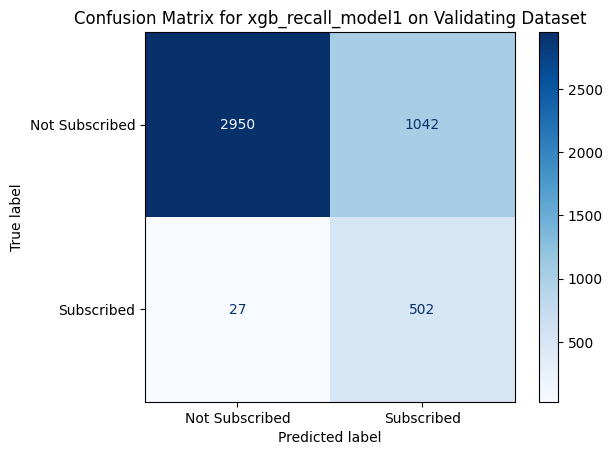

In [119]:
# Define the XGBoost model using the best parameters from tuning
xgb_recall_model1 = XGBClassifier(
    max_depth=3,
    min_child_weight=10,
    scale_pos_weight=20,

)

# Fit the model on the training data
xgb_recall_model1.fit(X_train, y_train)

# Predict on the validating dataset
y_pred_future = xgb_recall_model1.predict(futureSample_X)

# Print classification report
print("Classification Report for xgb_recall_model1 on Validating Dataset:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm = confusion_matrix(futureSample_y, y_pred_future)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for xgb_recall_model1 on Validating Dataset")
plt.show()


Best Parameters for tunning Model 2:

{'alpha': 0.5, 'gamma': 0, 'lambda': 5, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 60}


Classification Report for xgb_recall_model2 on Validating Dataset:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      3961
           1       0.25      0.98      0.39       560

    accuracy                           0.63      4521
   macro avg       0.62      0.78      0.56      4521
weighted avg       0.90      0.63      0.69      4521



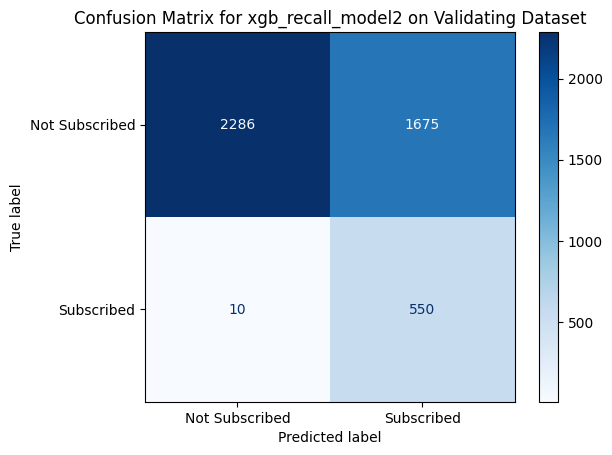

In [ ]:
# Define the XGBoost model using the best parameters from tuning
xgb_recall_model2 = XGBClassifier(
    alpha=0.5,
    gamma=0,
    reg_lambda=5,
    max_depth=3,
    min_child_weight=1,
    scale_pos_weight=60,
    random_state=42  # Add random_state for reproducibility if needed
)

# Fit the model on the training data
xgb_recall_model2.fit(X_train, y_train)

# Predict on the validating dataset
y_pred_future = xgb_recall_model2.predict(futureSample_X)

# Print classification report
print("Classification Report for xgb_recall_model2 on Validating Dataset:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm = confusion_matrix(futureSample_y, y_pred_future)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for xgb_recall_model2 on Validating Dataset")
plt.show()


- Class 1: The recall for class 1 (subscribers) is extremely high at 0.98, which means that the model successfully identifies nearly all actual subscribers. This is crucial for marketing campaigns, where the objective is to avoid missing out on potential customers. However, the precision for class 1 is very low at 0.25, meaning that while the model captures most subscribers, 75% of non-subscribers are incorrectly predicted as subscribers.

- Class 0 Performance: While the precision for class 0 is extremely high (1.00), its recall is relatively low at 0.58, indicating that 42% of non-subscribers are misclassified.


### 5.2 Model 22, 23 and 25 on validating dataset

Best Parameters for tuning Model 25:
- {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'gb__max_depth': 4, 'gb__n_estimators': 120, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 5}

Best Stacking Model Report on Future Samples:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3961
           1       0.42      0.85      0.56       560

    accuracy                           0.83      4521
   macro avg       0.70      0.84      0.73      4521
weighted avg       0.91      0.83      0.86      4521



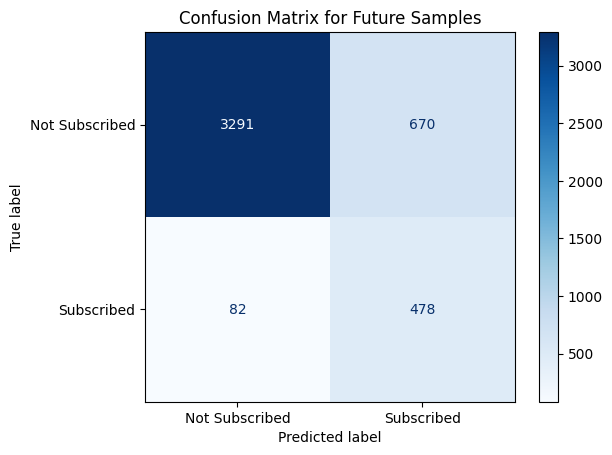

In [ ]:
# Rebuild the Stacking Model using the best parameters from Tuning 25
best_model_25 = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            learning_rate=0.05,
            max_depth=5,
            n_estimators=200,
            scale_pos_weight=5
        )),
        ('gb', GradientBoostingClassifier(
            max_depth=4,
            n_estimators=120
        ))
    ],
    final_estimator=LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000),
    cv=5
)

# Train the model using the entire original training set
best_model_25.fit(X_train, y_train)

# Predict on the unseen dataset (futureSample_X)
y_pred_future = best_model_25.predict(futureSample_X)

# Evaluate the performance on the unseen dataset (futureSample_y)
print("Best Stacking Model Report on Future Samples:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm = confusion_matrix(futureSample_y, y_pred_future)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Future Samples")
plt.show()


- Balanced Performance for Class 1: In contrast to xgb_recall_model2, this model achieves a more balanced performance between precision and recall for class 1. It has a precision of 0.42 and a recall of 0.85, resulting in an F1 score of 0.56. It captures 85% of the total subscribers in exchange of precision, with 49% of its predicted subscribers being accurate.
- Class 0 Performance: The precision and recall for class 0 are both strong at 0.98 and 0.83.

**The case is similar for model 22 and model 23, just slighly different number.**


Best Parameters for tuning Model 25:

 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 250, 'xgb__scale_pos_weight': 7}


Best Stacking Model Report on Future Samples:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3961
           1       0.41      0.87      0.56       560

    accuracy                           0.83      4521
   macro avg       0.70      0.85      0.73      4521
weighted avg       0.91      0.83      0.85      4521

Confusion Matrix:
 [[3269  692]
 [  73  487]]


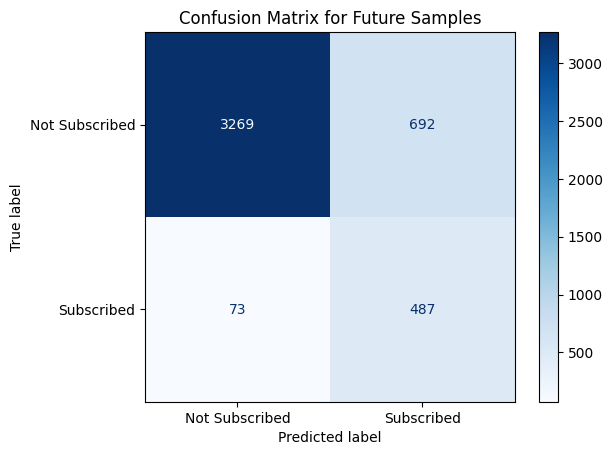

In [ ]:
# Rebuild the Stacking Model using the best parameters from Tuning 22
best_model_22 = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            learning_rate=0.05,
            max_depth=5,
            min_child_weight=1,
            n_estimators=250,
            scale_pos_weight=7
        ))
    ],
    final_estimator=LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000),
    cv=5
)

# Train the model using the entire original training set
best_model_22.fit(X_train, y_train)

# Predict on the unseen dataset (futureSample_X)
y_pred_future = best_model_22.predict(futureSample_X)

# Evaluate the performance on the unseen dataset (futureSample_y)
print("Best Stacking Model Report on Future Samples:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm = confusion_matrix(futureSample_y, y_pred_future)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Future Samples")
plt.show()


Best Parameters for tuning Model 25:

 {'final_estimator__C': 0.1, 'final_estimator__class_weight': 'balanced', 'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 150, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 1.0}

Best Stacking Model Report on Future Samples:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      3961
           1       0.43      0.86      0.57       560

    accuracy                           0.84      4521
   macro avg       0.70      0.85      0.74      4521
weighted avg       0.91      0.84      0.86      4521

Confusion Matrix:
 [[3310  651]
 [  76  484]]


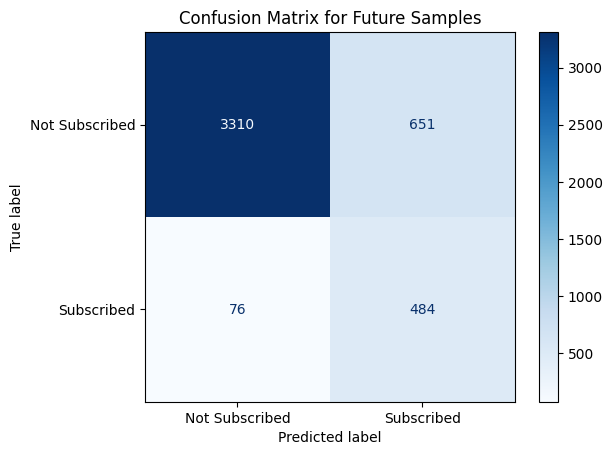

In [ ]:
# Rebuild the Stacking Model using the best parameters from Tuning 23
best_model_23 = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.1,
            max_depth=5,
            min_child_weight=1,
            n_estimators=150,
            scale_pos_weight=5,
            subsample=1.0
        ))
    ],
    final_estimator=LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000),
    cv=5
)

# Train the model using the entire original training set
best_model_23.fit(X_train, y_train)

# Predict on the unseen dataset (futureSample_X)
y_pred_future = best_model_23.predict(futureSample_X)

# Evaluate the performance on the unseen dataset (futureSample_y)
print("Best Stacking Model Report on Future Samples:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm = confusion_matrix(futureSample_y, y_pred_future)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Future Samples")
plt.show()


### 5.3 Model 16 on validating dataset

Best Parameters for tunning Model 16:

 {'final_estimator__C': 0.15, 'final_estimator__class_weight': 'balanced', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__n_estimators': 120}


Classification Report for best_model_16 on Future Samples:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      3961
           1       0.52      0.78      0.63       560

    accuracy                           0.88      4521
   macro avg       0.74      0.84      0.78      4521
weighted avg       0.91      0.88      0.89      4521



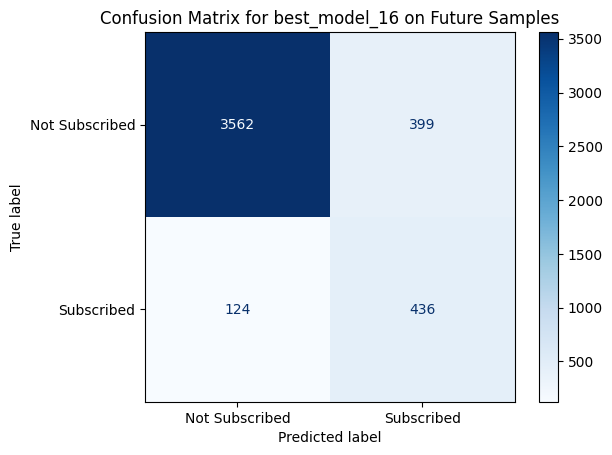

In [ ]:
# Rebuild the Stacking Model using the best parameters from Tuning 16
best_model_16 = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            learning_rate=0.3,
            max_depth=4,
            n_estimators=120
        ))
    ],
    final_estimator=LogisticRegression(C=0.15, class_weight='balanced', max_iter=1000),
    cv=5
)

# Train the model on the training dataset
best_model_16.fit(X_train, y_train)

# Predict on the unseen dataset (futureSample_X)
y_pred_future = best_model_16.predict(futureSample_X)

# Print classification report
print("Classification Report for best_model_16 on Future Samples:\n", classification_report(futureSample_y, y_pred_future))

# Confusion Matrix
cm_16 = confusion_matrix(futureSample_y, y_pred_future)

# Display Confusion Matrix
disp_16 = ConfusionMatrixDisplay(confusion_matrix=cm_16, display_labels=["Not Subscribed", "Subscribed"])
disp_16.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for best_model_16 on Future Samples")
plt.show()


- best_model_16 further enhances precision for subscribers compared to best_model_25 (precision of 0.52 vs 0.42) but sacrifices some recall (0.78 compared to 0.85 in best_model_25). This means that best_model_16 correctly identifies 52% of the predicted subscribers as actual subscribers, but it misses 22% of the total subscribers in the dataset

- Class 0 Performance: The precision and recall for class 0 (non-subscribers) are strong are also improved.



### Conclusion

All three models are included in this analysis to highlight their distinct strengths, trade-offs, and accuracy.

- xgb_recall_model1: This model focuses primarily on maximizing recall for class 1 (subscribers), ensuring that as many actual subscribers as possible are identified, even at the cost of precision. With a recall of 0.74 for class 1, xgb_recall_model2 captures the majority of actual subscribers, but its precision drops to 0.33, leading to a high number of false positives. This trade-off results in a less balanced performance across both classes, as it sacrifices precision and recall for class 0 (with a recall of 0.74) to maximize recall for class 1.
  - The overall accuracy of this model is 0.76, making it suitable for scenarios where **missing potential customers is far more costly than incorrectly identifying non-subscribers**.

- best_model_23: This model strikes a balance between precision and recall for class 1. It achieves a recall of 0.86 with an improved precision of 0.43, resulting in fewer false positives while still capturing a high proportion of subscribers. best_model_23 offers a more balanced performance for both class 0 and class 1, maintaining strong precision (0.98) and recall (0.84) for class 0.
  - The overall accuracy is 0.84, making it a versatile option for scenarios where **minimizing false positives or capturing subscribers are equally important**. It outperforms xgb_recall_model2 in overall balance between class 0 and class 1.

- best_model_16: This model emphasizes precision for class 1, achieving a precision of 0.52, the highest among the three models, but at the cost of recall, which drops to 0.78. While best_model_16 captures fewer subscribers than the other two models, it significantly reduces the number of false positives, making it suitable for cases where avoiding incorrect classifications of subscribers is critical.
  - best_model_16 excels in class 0 performance, with a high precision of 0.97 and recall of 0.90, resulting in the highest overall accuracy of 0.88. If the priority is to **achieve a higher precision for class 1 while maintaining strong performance for class 0**, best_model_16 is the best option.

This session presents xgb_recall_model first (highest recall, lowest precision), followed by best_model_23 (middle ground), and finally best_model_16 (highest precision, lowest recall), offering a clear comparison of their respective strengths, trade-offs, and accuracy.